# Telecom Churn Case Study
- Akshatha Shetty

### Defining The Problem Statement: 

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to
another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate.
Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has 
now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers
at high risk of churn and identify the main indicators of churn.

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

## Read And Understand the data

In [2]:
# Reading the data
data = pd.read_csv('telecom_churn_data.csv')
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
data.shape

(99999, 226)

In [4]:
print(data.info())
def metadata_matrix(data) :
    return pd.DataFrame({
        'Datatype' : data.dtypes.astype(str),
        'Non_Null_Count': data.count(axis = 0).astype(int),
        'Null_Count': data.isnull().sum().astype(int),
        'Null_Percentage': round(data.isnull().sum()/len(data) * 100, 2),
        'Unique_Values_Count': data.nunique().astype(int)
         }).sort_values(by='Null_Percentage', ascending=False)

metadata_matrix(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None


,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_3g_6,float64,25153,74846,74.85,7418
night_pck_user_6,float64,25153,74846,74.85,2
total_rech_data_6,float64,25153,74846,74.85,37
arpu_2g_6,float64,25153,74846,74.85,6990
max_rech_data_6,float64,25153,74846,74.85,48
fb_user_6,float64,25153,74846,74.85,2
av_rech_amt_data_6,float64,25153,74846,74.85,887
date_of_last_rech_data_6,object,25153,74846,74.85,30
count_rech_2g_6,float64,25153,74846,74.85,31
count_rech_3g_6,float64,25153,74846,74.85,25


# Data Cleaning: 

In [5]:
# Checking for duplicate records:
data['mobile_number'].value_counts().sum()

99999

As the data shape and count is same, there are no duplicate values

In [6]:
# Setting mobile number as index as it is unique
data = data.set_index('mobile_number')

In [7]:
# Lets Rename the columns:
data = data.rename({'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8', 'sep_vbc_3g' : 'vbc_3g_9'}, axis=1)

In [8]:
data.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0

In [9]:
# Converting Columns into suitable data types:

columns=data.columns
change_to_cat=[]
single_value_col=[]
for column in columns:
    unique_value_count=data[column].nunique()
    if unique_value_count==1:
        single_value_col.append(column)
    if unique_value_count<=29 and unique_value_count!=0 and data[column].dtype in ['int','float']:
        change_to_cat.append(column)
print( ' Columns to change to categorical data type : \n' ,pd.DataFrame(change_to_cat), '\n')

 Columns to change to categorical data type : 
                    0
0     loc_og_t2o_mou
1     std_og_t2o_mou
2     loc_ic_t2o_mou
3   std_og_t2c_mou_6
4   std_og_t2c_mou_7
5   std_og_t2c_mou_8
6   std_og_t2c_mou_9
7   std_ic_t2o_mou_6
8   std_ic_t2o_mou_7
9   std_ic_t2o_mou_8
10  std_ic_t2o_mou_9
11   count_rech_3g_6
12   count_rech_3g_7
13   count_rech_3g_8
14   count_rech_3g_9
15  night_pck_user_6
16  night_pck_user_7
17  night_pck_user_8
18  night_pck_user_9
19         fb_user_6
20         fb_user_7
21         fb_user_8
22         fb_user_9 



In [10]:
data[change_to_cat] = data[change_to_cat].astype('category')

In [11]:
sachet_columns = data.filter(regex='.*sachet.*', axis=1).columns.values
data[sachet_columns] = data[sachet_columns].astype('category')

In [12]:
columns=data.columns
col_with_date=[]
import re
for column in columns:
    x = re.findall("^date", column)
    if x:
        col_with_date.append(column)
data[col_with_date].dtypes      

date_of_last_rech_6         object
date_of_last_rech_7         object
date_of_last_rech_8         object
date_of_last_rech_9         object
date_of_last_rech_data_6    object
date_of_last_rech_data_7    object
date_of_last_rech_data_8    object
date_of_last_rech_data_9    object
dtype: object

In [13]:
data[col_with_date].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
mobile_number,,,,,,,,
7000842753,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
7001865778,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
7001625959,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014
7001204172,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
7000142493,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN


In [14]:
# Converting date column into datetime datatype:
for col in col_with_date:
    data[col] = pd.to_datetime(data[col], format="%m/%d/%Y")
data[col_with_date].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
mobile_number,,,,,,,,
7000842753,2014-06-21,2014-07-16,2014-08-08,2014-09-28,2014-06-21,2014-07-16,2014-08-08,NaT
7001865778,2014-06-29,2014-07-31,2014-08-28,2014-09-30,NaT,2014-07-25,2014-08-10,NaT
7001625959,2014-06-17,2014-07-24,2014-08-14,2014-09-29,NaT,NaT,NaT,2014-09-17
7001204172,2014-06-28,2014-07-31,2014-08-31,2014-09-30,NaT,NaT,NaT,NaT
7000142493,2014-06-26,2014-07-28,2014-08-09,2014-09-28,2014-06-04,NaT,NaT,NaT


# Finding out High Value Customers:
Customers are considered as high value customers if their average recharge amount of good month is greater than or equal to 70th percentile of averge amount of recharge

In [15]:
#Average recharge amount of good month:
data['Average_rech_amt_6n7'] = (data['total_rech_amt_6'] + data['total_rech_amt_7'])/2

In [16]:
# Filtering based on 70th percentile:
data = data[(data['Average_rech_amt_6n7']>= data['Average_rech_amt_6n7'].quantile(0.7))]

###  Checking on Missing Values

In [17]:
missing_values = metadata_matrix(data)[['Datatype', 'Null_Percentage']].sort_values(by='Null_Percentage', ascending = False)
missing_values

,Datatype,Null_Percentage
av_rech_amt_data_6,float64,62.02
count_rech_2g_6,float64,62.02
arpu_2g_6,float64,62.02
max_rech_data_6,float64,62.02
night_pck_user_6,category,62.02
date_of_last_rech_data_6,datetime64[ns],62.02
total_rech_data_6,float64,62.02
arpu_3g_6,float64,62.02
fb_user_6,category,62.02
count_rech_3g_6,category,62.02


In [18]:
# Dropping the columns with missing values >50%
metadata = metadata_matrix(data)
condition = metadata['Null_Percentage'] > 50
high_missing_values = metadata[condition]
high_missing_values

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
av_rech_amt_data_6,float64,11397,18614,62.02,794
count_rech_3g_6,category,11397,18614,62.02,25
count_rech_2g_6,float64,11397,18614,62.02,30
arpu_2g_6,float64,11397,18614,62.02,4503
max_rech_data_6,float64,11397,18614,62.02,43
night_pck_user_6,category,11397,18614,62.02,2
date_of_last_rech_data_6,datetime64[ns],11397,18614,62.02,30
total_rech_data_6,float64,11397,18614,62.02,36
arpu_3g_6,float64,11397,18614,62.02,4875
fb_user_6,category,11397,18614,62.02,2


In [19]:
high_missing_value_columns = high_missing_values.index
data.drop(columns = high_missing_value_columns, inplace=True)

In [20]:
metadata_matrix(data)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_ic_t2o_mou_9,category,28307,1704,5.68,1
spl_og_mou_9,float64,28307,1704,5.68,2966
isd_og_mou_9,float64,28307,1704,5.68,908
roam_ic_mou_9,float64,28307,1704,5.68,3370
std_og_mou_9,float64,28307,1704,5.68,15900
roam_og_mou_9,float64,28307,1704,5.68,4004
std_ic_t2f_mou_9,float64,28307,1704,5.68,1971
std_og_t2c_mou_9,category,28307,1704,5.68,1
loc_og_t2t_mou_9,float64,28307,1704,5.68,10360
std_og_t2f_mou_9,float64,28307,1704,5.68,1595


In [21]:
# Treatment of Missing Values month wise

In [22]:
sixth_month_columns = []
for column in data.columns:
    x = re.search("6$", column)
    if x:
        sixth_month_columns.append(column)
        
metadata = metadata_matrix(data)
condition = metadata.index.isin(sixth_month_columns)
sixth_month_metadata = metadata[condition]
sixth_month_metadata  
        

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_ic_mou_6,float64,29695,316,1.05,8391
offnet_mou_6,float64,29695,316,1.05,22454
std_ic_t2f_mou_6,float64,29695,316,1.05,2033
isd_ic_mou_6,float64,29695,316,1.05,3429
ic_others_6,float64,29695,316,1.05,1227
onnet_mou_6,float64,29695,316,1.05,18813
std_ic_t2m_mou_6,float64,29695,316,1.05,6680
loc_ic_t2t_mou_6,float64,29695,316,1.05,9872
loc_ic_t2m_mou_6,float64,29695,316,1.05,16015
loc_ic_t2f_mou_6,float64,29695,316,1.05,4817


In [23]:
# Columns with missing values in 6th month:
sixth_month_meaningful_missing_condition = sixth_month_metadata['Null_Percentage'] == 1.05
sixth_month_meaningful_missing_cols = sixth_month_metadata[sixth_month_meaningful_missing_condition].index.values
sixth_month_meaningful_missing_cols

array(['std_ic_mou_6', 'offnet_mou_6', 'std_ic_t2f_mou_6', 'isd_ic_mou_6',
       'ic_others_6', 'onnet_mou_6', 'std_ic_t2m_mou_6',
       'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6',
       'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'og_others_6', 'spl_og_mou_6',
       'roam_ic_mou_6', 'spl_ic_mou_6', 'std_og_t2t_mou_6',
       'loc_og_t2c_mou_6', 'std_og_t2m_mou_6', 'loc_og_t2f_mou_6',
       'std_og_t2f_mou_6', 'loc_og_t2m_mou_6', 'std_ic_t2o_mou_6',
       'std_og_t2c_mou_6', 'std_og_mou_6', 'loc_og_t2t_mou_6',
       'isd_og_mou_6', 'roam_og_mou_6', 'loc_og_mou_6'], dtype=object)

In [24]:
conditon = data[sixth_month_meaningful_missing_cols].isnull()

missing_rows = pd.Series([True]*data.shape[0], index = data.index)

for column in sixth_month_meaningful_missing_cols:
    missing_rows = missing_rows & data[column].isnull()
    
print('Total outgoing mou for each customer with missing *_mou data is', data.loc[missing_rows, 'total_og_mou_6'].unique()[0])    
print('Total incoming mou for each customer with missing *_mou data is', data.loc[missing_rows, 'total_ic_mou_6'].unique()[0]) 
    

Total outgoing mou for each customer with missing *_mou data is 0.0
Total incoming mou for each customer with missing *_mou data is 0.0


In [25]:
# Hence imputing the missing values with '0'

In [26]:
data[sixth_month_meaningful_missing_cols] = data[sixth_month_meaningful_missing_cols].fillna(0)

metadata = metadata_matrix(data)

metadata.iloc[metadata.index.isin(sixth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_6,datetime64[ns],29949,62,0.21,30
monthly_2g_6,int64,30011,0,0.00,5
vbc_3g_6,float64,30011,0,0.00,6864
max_rech_amt_6,int64,30011,0,0.00,170
sachet_3g_6,category,30011,0,0.00,25
sachet_2g_6,category,30011,0,0.00,30
vol_2g_mb_6,float64,30011,0,0.00,7809
monthly_3g_6,int64,30011,0,0.00,12
vol_3g_mb_6,float64,30011,0,0.00,7043
last_day_rch_amt_6,int64,30011,0,0.00,158


 Based on above, checking on recharge related column as some of the customers have missing value with last date of recharge

In [27]:
condition = data['date_of_last_rech_6'].isnull()
data[condition].filter(regex='.*rech.*6$', axis=1).head()

,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6
mobile_number,,,,
7001588448,0,0,0,NaT
7001223277,0,0,0,NaT
7000721536,0,0,0,NaT
7001490351,0,0,0,NaT
7000665415,0,0,0,NaT


In [28]:
data[condition].filter(regex='.*rech.*6$', axis=1).nunique()

total_rech_num_6       1
total_rech_amt_6       1
max_rech_amt_6         1
date_of_last_rech_6    0
dtype: int64

date_of_last_rech_6 has one unique value, that means there were no recharges done this month.

In [29]:
# Check for missing values in sixth month variables
metadata = metadata_matrix(data)
metadata[metadata.index.isin(sixth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_6,datetime64[ns],29949,62,0.21,30
monthly_2g_6,int64,30011,0,0.00,5
vbc_3g_6,float64,30011,0,0.00,6864
max_rech_amt_6,int64,30011,0,0.00,170
sachet_3g_6,category,30011,0,0.00,25
sachet_2g_6,category,30011,0,0.00,30
vol_2g_mb_6,float64,30011,0,0.00,7809
monthly_3g_6,int64,30011,0,0.00,12
vol_3g_mb_6,float64,30011,0,0.00,7043
last_day_rch_amt_6,int64,30011,0,0.00,158


In [30]:
# No missing values in sixth month columns

#### Seventh month columns:

In [31]:
seventh_month_columns = data.filter(regex='7$', axis=1).columns
seventh_month_columns

Index(['last_date_of_month_7', 'arpu_7', 'onnet_mou_7', 'offnet_mou_7',
       'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7',
       'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7',
       'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'isd_og_mou_7',
       'spl_og_mou_7', 'og_others_7', 'total_og_mou_7', 'loc_ic_t2t_mou_7',
       'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7',
       'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7',
       'std_ic_t2o_mou_7', 'std_ic_mou_7', 'total_ic_mou_7', 'spl_ic_mou_7',
       'isd_ic_mou_7', 'ic_others_7', 'total_rech_num_7', 'total_rech_amt_7',
       'max_rech_amt_7', 'date_of_last_rech_7', 'last_day_rch_amt_7',
       'vol_2g_mb_7', 'vol_3g_mb_7', 'monthly_2g_7', 'sachet_2g_7',
       'monthly_3g_7', 'sachet_3g_7', 'vbc_3g_7', 'Average_rech_amt_6n7'],
      dtype='object')

In [32]:
seventh_month_metadata = metadata[metadata.index.isin(seventh_month_columns)]
seventh_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
loc_ic_t2t_mou_7,float64,29708,303,1.01,9961
og_others_7,float64,29708,303,1.01,123
loc_ic_t2f_mou_7,float64,29708,303,1.01,4897
loc_ic_t2m_mou_7,float64,29708,303,1.01,16068
loc_ic_mou_7,float64,29708,303,1.01,19030
std_ic_t2t_mou_7,float64,29708,303,1.01,4706
std_ic_t2f_mou_7,float64,29708,303,1.01,2075
std_ic_t2o_mou_7,category,29708,303,1.01,1
std_ic_mou_7,float64,29708,303,1.01,8543
spl_ic_mou_7,float64,29708,303,1.01,93


In [33]:
# Columns with missing values in 7th month:
seventh_month_meaningful_missing_condition = seventh_month_metadata['Null_Percentage'] == 1.01
seventh_month_meaningful_missing_cols = seventh_month_metadata[seventh_month_meaningful_missing_condition].index.values
seventh_month_meaningful_missing_cols

array(['loc_ic_t2t_mou_7', 'og_others_7', 'loc_ic_t2f_mou_7',
       'loc_ic_t2m_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7',
       'std_ic_t2f_mou_7', 'std_ic_t2o_mou_7', 'std_ic_mou_7',
       'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7', 'std_ic_t2m_mou_7',
       'isd_og_mou_7', 'spl_og_mou_7', 'std_og_t2f_mou_7', 'onnet_mou_7',
       'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7',
       'loc_og_t2t_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7',
       'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7',
       'loc_og_t2m_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7'],
      dtype=object)

In [34]:
conditon = data[seventh_month_meaningful_missing_cols].isnull()
missing_rows = pd.Series([True]*data.shape[0], index = data.index)
for column in seventh_month_meaningful_missing_cols:
    missing_rows = missing_rows & data[column].isnull()
    
print('Total outgoing mou for each customer with missing *_mou data is', data.loc[missing_rows, 'total_og_mou_7'].unique()[0])    
print('Total incoming mou for each customer with missing *_mou data is', data.loc[missing_rows, 'total_ic_mou_7'].unique()[0])   

Total outgoing mou for each customer with missing *_mou data is 0.0
Total incoming mou for each customer with missing *_mou data is 0.0


In [35]:
# Hence imputing the missing values with '0'
data[seventh_month_meaningful_missing_cols] = data[seventh_month_meaningful_missing_cols].fillna(0)
metadata = metadata_matrix(data)

metadata.iloc[metadata.index.isin(seventh_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_7,datetime64[ns],29897,114,0.38,31
last_date_of_month_7,object,29980,31,0.10,1
total_rech_num_7,int64,30011,0,0.00,101
ic_others_7,float64,30011,0,0.00,1371
isd_ic_mou_7,float64,30011,0,0.00,3639
spl_ic_mou_7,float64,30011,0,0.00,93
total_rech_amt_7,int64,30011,0,0.00,2265
sachet_2g_7,category,30011,0,0.00,34
monthly_3g_7,int64,30011,0,0.00,15
sachet_3g_7,category,30011,0,0.00,27


 Based on above, checking on recharge related column as some of the customers have missing value with last date of recharge

In [36]:
condition = data['date_of_last_rech_7'].isnull()
data[condition].filter(regex='.*rech.*7$', axis=1).head()

,total_rech_num_7,total_rech_amt_7,max_rech_amt_7,date_of_last_rech_7,Average_rech_amt_6n7
mobile_number,,,,,
7000369789,0,0,0,NaT,393.0
7001967148,0,0,0,NaT,500.5
7000066601,0,0,0,NaT,490.0
7001189556,0,0,0,NaT,523.5
7002024450,0,0,0,NaT,493.0


In [37]:
data[condition].filter(regex='.*rech.*7$', axis=1).nunique()

total_rech_num_7         1
total_rech_amt_7         1
max_rech_amt_7           1
date_of_last_rech_7      0
Average_rech_amt_6n7    90
dtype: int64

date_of_last_rech_7 has only one unique value '0', that says there are no recharges made this month. There are no missing values in this month

#### Eighth month columns:

In [38]:
eighth_month_columns = data.filter(regex="8$", axis=1).columns
metadata = metadata_matrix(data)
condition = metadata.index.isin(eighth_month_columns)
eighth_month_metadata = metadata[condition]
eighth_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_og_t2c_mou_8,category,29073,938,3.13,1
std_og_mou_8,float64,29073,938,3.13,16864
isd_og_mou_8,float64,29073,938,3.13,940
loc_ic_mou_8,float64,29073,938,3.13,18573
std_og_t2m_mou_8,float64,29073,938,3.13,13326
loc_ic_t2m_mou_8,float64,29073,938,3.13,15598
loc_og_mou_8,float64,29073,938,3.13,18885
std_og_t2t_mou_8,float64,29073,938,3.13,11781
std_og_t2f_mou_8,float64,29073,938,3.13,1627
loc_ic_t2f_mou_8,float64,29073,938,3.13,4705


In [39]:
# Columns with missing values in 8th month:
eighth_month_meaningful_missing_condition = eighth_month_metadata['Null_Percentage'] == 3.13
eighth_month_meaningful_missing_cols = eighth_month_metadata[eighth_month_meaningful_missing_condition].index.values
eighth_month_meaningful_missing_cols

array(['std_og_t2c_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'loc_ic_mou_8',
       'std_og_t2m_mou_8', 'loc_ic_t2m_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2f_mou_8', 'loc_ic_t2f_mou_8',
       'loc_og_t2c_mou_8', 'ic_others_8', 'loc_og_t2m_mou_8',
       'spl_og_mou_8', 'roam_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8',
       'std_ic_t2o_mou_8', 'onnet_mou_8', 'loc_og_t2f_mou_8',
       'offnet_mou_8', 'std_ic_t2f_mou_8', 'og_others_8',
       'loc_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2t_mou_8',
       'roam_og_mou_8', 'isd_ic_mou_8', 'loc_og_t2t_mou_8'], dtype=object)

In [40]:
conditon = data[eighth_month_meaningful_missing_cols].isnull()

missing_rows = pd.Series([True]*data.shape[0], index = data.index)
for column in eighth_month_meaningful_missing_cols:
    missing_rows = missing_rows & data[column].isnull()
    
print('Total outgoing mou for each customer with missing *_mou data is', data.loc[missing_rows, 'total_og_mou_8'].unique()[0])    
print('Total incoming mou for each customer with missing *_mou data is', data.loc[missing_rows, 'total_ic_mou_8'].unique()[0])  

Total outgoing mou for each customer with missing *_mou data is 0.0
Total incoming mou for each customer with missing *_mou data is 0.0


In [41]:
# Hence imputing the missing values with '0'
data[eighth_month_meaningful_missing_cols] = data[eighth_month_meaningful_missing_cols].fillna(0)
metadata = metadata_matrix(data)

metadata.iloc[metadata.index.isin(eighth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_8,datetime64[ns],29417,594,1.98,31
last_date_of_month_8,object,29854,157,0.52,1
spl_ic_mou_8,float64,30011,0,0.00,85
total_rech_num_8,int64,30011,0,0.00,96
std_ic_t2f_mou_8,float64,30011,0,0.00,1941
ic_others_8,float64,30011,0,0.00,1259
std_ic_t2o_mou_8,category,30011,0,0.00,1
std_ic_mou_8,float64,30011,0,0.00,8033
total_ic_mou_8,float64,30011,0,0.00,20096
isd_ic_mou_8,float64,30011,0,0.00,3493


 Based on above, checking on recharge related column as some of the customers have missing value with last date of recharge

In [42]:
condition = data['date_of_last_rech_8'].isnull()
data[condition].filter(regex='.*rech.*8$', axis=1).head()

,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8
mobile_number,,,,
7000340381,0,0,0,NaT
7000608224,0,0,0,NaT
7000369789,0,0,0,NaT
7000248548,0,0,0,NaT
7001967063,0,0,0,NaT


In [43]:
data[condition].filter(regex='.*rech.*8$', axis=1).nunique()

total_rech_num_8       1
total_rech_amt_8       1
max_rech_amt_8         1
date_of_last_rech_8    0
dtype: int64

#### Nine month columns:

In [44]:
ninth_month_columns = data.filter(regex="9$", axis=1).columns
metadata = metadata_matrix(data)
condition = metadata.index.isin(ninth_month_columns)
ninth_month_metadata = metadata[condition]
ninth_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_og_t2c_mou_9,category,28307,1704,5.68,1
spl_ic_mou_9,float64,28307,1704,5.68,287
loc_og_t2m_mou_9,float64,28307,1704,5.68,15585
og_others_9,float64,28307,1704,5.68,132
loc_og_t2c_mou_9,float64,28307,1704,5.68,1576
isd_ic_mou_9,float64,28307,1704,5.68,3329
loc_og_t2t_mou_9,float64,28307,1704,5.68,10360
spl_og_mou_9,float64,28307,1704,5.68,2966
loc_ic_t2t_mou_9,float64,28307,1704,5.68,9407
loc_og_mou_9,float64,28307,1704,5.68,18207


In [45]:
# Columns with missing values in 9th month:
ninth_month_meaningful_missing_condition = ninth_month_metadata['Null_Percentage'] == 5.68
ninth_month_meaningful_missing_cols = ninth_month_metadata[ninth_month_meaningful_missing_condition].index.values
ninth_month_meaningful_missing_cols

array(['std_og_t2c_mou_9', 'spl_ic_mou_9', 'loc_og_t2m_mou_9',
       'og_others_9', 'loc_og_t2c_mou_9', 'isd_ic_mou_9',
       'loc_og_t2t_mou_9', 'spl_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_og_mou_9', 'roam_og_mou_9', 'std_ic_mou_9',
       'loc_ic_t2m_mou_9', 'roam_ic_mou_9', 'std_og_t2t_mou_9',
       'offnet_mou_9', 'loc_ic_t2f_mou_9', 'std_ic_t2f_mou_9',
       'isd_og_mou_9', 'std_og_mou_9', 'std_og_t2f_mou_9', 'ic_others_9',
       'std_ic_t2t_mou_9', 'std_ic_t2o_mou_9', 'loc_og_t2f_mou_9',
       'std_og_t2m_mou_9', 'loc_ic_mou_9', 'std_ic_t2m_mou_9',
       'onnet_mou_9'], dtype=object)

In [46]:
conditon = data[ninth_month_meaningful_missing_cols].isnull()
missing_rows = pd.Series([True]*data.shape[0], index = data.index)
for column in ninth_month_meaningful_missing_cols:
    missing_rows = missing_rows & data[column].isnull()
    
print('Total outgoing mou for each customer with missing *_mou data is', data.loc[missing_rows, 'total_og_mou_9'].unique()[0])    
print('Total incoming mou for each customer with missing *_mou data is', data.loc[missing_rows, 'total_ic_mou_9'].unique()[0])   

Total outgoing mou for each customer with missing *_mou data is 0.0
Total incoming mou for each customer with missing *_mou data is 0.0


In [47]:
# Hence imputing the missing values with '0'
data[ninth_month_meaningful_missing_cols] = data[ninth_month_meaningful_missing_cols].fillna(0)
metadata = metadata_matrix(data)

metadata.iloc[metadata.index.isin(ninth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_9,datetime64[ns],29145,866,2.89,30
last_date_of_month_9,object,29651,360,1.20,1
spl_ic_mou_9,float64,30011,0,0.00,287
total_ic_mou_9,float64,30011,0,0.00,19437
std_ic_mou_9,float64,30011,0,0.00,7745
isd_ic_mou_9,float64,30011,0,0.00,3329
ic_others_9,float64,30011,0,0.00,1284
loc_ic_mou_9,float64,30011,0,0.00,18018
std_ic_t2t_mou_9,float64,30011,0,0.00,4280
std_ic_t2m_mou_9,float64,30011,0,0.00,6168


In [48]:
condition = data['date_of_last_rech_9'].isnull()
data[condition].filter(regex='.*rech.*9$', axis=1).head()

,total_rech_num_9,total_rech_amt_9,max_rech_amt_9,date_of_last_rech_9
mobile_number,,,,
7000340381,0,0,0,NaT
7000854899,0,0,0,NaT
7000369789,0,0,0,NaT
7001967063,0,0,0,NaT
7000066601,0,0,0,NaT


In [49]:
data[condition].filter(regex='.*rech.*9$', axis=1).nunique()

total_rech_num_9       1
total_rech_amt_9       1
max_rech_amt_9         1
date_of_last_rech_9    0
dtype: int64

In [50]:
# imputing last_date_of_month_

In [51]:
print('Missing value Percentage in last_date_of_month columns : \n', 100*data.filter(regex='last_date_of_month_.*',axis=1).isnull().sum() / data.shape[0], '\n')
print('The unique values in last_date_of_month_6 : ' , data['last_date_of_month_6'].unique())
print('The unique values in last_date_of_month_7 : ' , data['last_date_of_month_7'].unique())
print('The unique values in last_date_of_month_8 : ' , data['last_date_of_month_8'].unique())
print('The unique values in last_date_of_month_9 : ' , data['last_date_of_month_9'].unique())


Missing value Percentage in last_date_of_month columns : 
 last_date_of_month_6    0.000000
last_date_of_month_7    0.103295
last_date_of_month_8    0.523142
last_date_of_month_9    1.199560
dtype: float64 

The unique values in last_date_of_month_6 :  ['6/30/2014']
The unique values in last_date_of_month_7 :  ['7/31/2014' nan]
The unique values in last_date_of_month_8 :  ['8/31/2014' nan]
The unique values in last_date_of_month_9 :  ['9/30/2014' nan]


Imputing these missing values using mode.

In [52]:
# Imputing last_date_of_month values
data['last_date_of_month_7'] = data['last_date_of_month_7'].fillna(data['last_date_of_month_7'].mode()[0])
data['last_date_of_month_8'] = data['last_date_of_month_8'].fillna(data['last_date_of_month_8'].mode()[0])
data['last_date_of_month_9'] = data['last_date_of_month_9'].fillna(data['last_date_of_month_9'].mode()[0])

In [53]:
data['last_date_of_month_7'].unique()

array(['7/31/2014'], dtype=object)

In [54]:
metadata = metadata_matrix(data)
metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_9,datetime64[ns],29145,866,2.89,30
date_of_last_rech_8,datetime64[ns],29417,594,1.98,31
loc_og_t2o_mou,category,29897,114,0.38,1
date_of_last_rech_7,datetime64[ns],29897,114,0.38,31
std_og_t2o_mou,category,29897,114,0.38,1
loc_ic_t2o_mou,category,29897,114,0.38,1
date_of_last_rech_6,datetime64[ns],29949,62,0.21,30
isd_ic_mou_6,float64,30011,0,0.00,3429
total_ic_mou_6,float64,30011,0,0.00,20602
total_ic_mou_7,float64,30011,0,0.00,20711


In [55]:
print(data[data['date_of_last_rech_6'].isnull()][['date_of_last_rech_6','total_rech_amt_6','total_rech_num_6']].nunique())
print(data[data['date_of_last_rech_7'].isnull()][['date_of_last_rech_7','total_rech_amt_7','total_rech_num_7']].nunique())
print(data[data['date_of_last_rech_8'].isnull()][['date_of_last_rech_8','total_rech_amt_8','total_rech_num_8']].nunique())
print(data[data['date_of_last_rech_9'].isnull()][['date_of_last_rech_9','total_rech_amt_9','total_rech_num_9']].nunique())

date_of_last_rech_6    0
total_rech_amt_6       1
total_rech_num_6       1
dtype: int64
date_of_last_rech_7    0
total_rech_amt_7       1
total_rech_num_7       1
dtype: int64
date_of_last_rech_8    0
total_rech_amt_8       1
total_rech_num_8       1
dtype: int64
date_of_last_rech_9    0
total_rech_amt_9       1
total_rech_num_9       1
dtype: int64


In [56]:
print("\n",data[data['date_of_last_rech_6'].isnull()][['total_rech_amt_6','total_rech_num_6']].head())
print("\n",data[data['date_of_last_rech_7'].isnull()][['total_rech_amt_7','total_rech_num_7']].head())
print("\n",data[data['date_of_last_rech_8'].isnull()][['total_rech_amt_8','total_rech_num_8']].head())
print("\n",data[data['date_of_last_rech_9'].isnull()][['total_rech_amt_9','total_rech_num_9']].head())


                total_rech_amt_6  total_rech_num_6
mobile_number                                    
7001588448                    0                 0
7001223277                    0                 0
7000721536                    0                 0
7001490351                    0                 0
7000665415                    0                 0

                total_rech_amt_7  total_rech_num_7
mobile_number                                    
7000369789                    0                 0
7001967148                    0                 0
7000066601                    0                 0
7001189556                    0                 0
7002024450                    0                 0

                total_rech_amt_8  total_rech_num_8
mobile_number                                    
7000340381                    0                 0
7000608224                    0                 0
7000369789                    0                 0
7000248548                    0             

'date_of_last_rech_ for june, july and august has no values as there was no recharge done

## Dropping of unwanted columns 

In [57]:
metadata = metadata_matrix(data)
singular_value_cols=metadata[metadata['Unique_Values_Count']==1].index.values

In [58]:
# Dropping unique values columns
data.drop(columns=singular_value_cols, inplace=True)

In [59]:
# As we dont need date column , will drop date columns
date_columns = data.filter(regex='^date.*').columns
data.drop(columns=date_columns, inplace=True)
metadata_matrix(data)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_6,float64,30011,0,0.0,29261
total_ic_mou_6,float64,30011,0,0.0,20602
total_ic_mou_8,float64,30011,0,0.0,20096
total_ic_mou_9,float64,30011,0,0.0,19437
spl_ic_mou_6,float64,30011,0,0.0,78
spl_ic_mou_7,float64,30011,0,0.0,93
spl_ic_mou_8,float64,30011,0,0.0,85
spl_ic_mou_9,float64,30011,0,0.0,287
isd_ic_mou_6,float64,30011,0,0.0,3429
isd_ic_mou_7,float64,30011,0,0.0,3639


# Target variable(Churn)

In [60]:
data['Churn'] = 0
churned_customers = data.query('total_og_mou_9 == 0 & total_ic_mou_9 == 0 & vol_2g_mb_9 ==0 & vol_3g_mb_9 == 0').index
data.loc[churned_customers,'Churn'] = 1
data['Churn'] = data['Churn'].astype('category')

In [61]:
# Properties of churn
data['Churn'].value_counts(normalize=True).to_frame()

,Churn
0,0.913598
1,0.086402


In [62]:
# Dropping the nineth month columns ie., the churn phase columns
churn_phase_columns = data.filter(regex='9$').columns
data.drop(columns=churn_phase_columns, inplace=True)
print('Retained Columns')
data.columns.to_frame(index=False)

Retained Columns


,0
0,arpu_6
1,arpu_7
2,arpu_8
3,onnet_mou_6
4,onnet_mou_7
5,onnet_mou_8
6,offnet_mou_6
7,offnet_mou_7
8,offnet_mou_8
9,roam_ic_mou_6


In [63]:
print('retained no of rows', data.shape[0])
print('retained no of columns', data.shape[1])

retained no of rows 30011
retained no of columns 126


# Exploratory Data Analysis

In [64]:
data.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,Average_rech_amt_6n7
count,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,587.284404,589.135427,534.857433,296.034461,304.343206,267.600412,417.933372,423.924375,375.021691,17.412764,13.522114,13.25627,29.321648,22.036003,21.469272,94.680696,95.729729,87.139995,181.279583,181.271524,167.591199,6.97933,7.097268,6.494314,1.567160,1.862229,1.712739,282.948414,284.107492,261.233938,189.753131,199.877508,172.196408,203.097767,213.411914,179.568790,2.010766,2.034241,1.789728,394.865994,415.327988,353.558826,2.264425,2.207400,2.029314,5.916364,7.425487,6.885193,0.692507,0.047600,0.059131,686.697541,709.124730,623.774684,68.749054,70.311351,65.936968,159.613810,160.813032,153.628517,15.595629,16.510023,14.706512,243.968340,247.644401,234.281577,16.229350,16.893723,15.051559,32.015163,33.47715

In [65]:
categorical_columns = data.dtypes[data.dtypes == 'category'].index.values
print('Mode : ')
data[categorical_columns].mode().T

Mode : 


,0
sachet_2g_6,0
sachet_2g_7,0
sachet_2g_8,0
sachet_3g_6,0
sachet_3g_7,0
sachet_3g_8,0
Churn,0


 Usually customers prefer '0' category plan

# Univariate Analysis

In [66]:
churned_customers = data[data['Churn'] == 1]
non_churned_customers = data[data['Churn'] == 0]

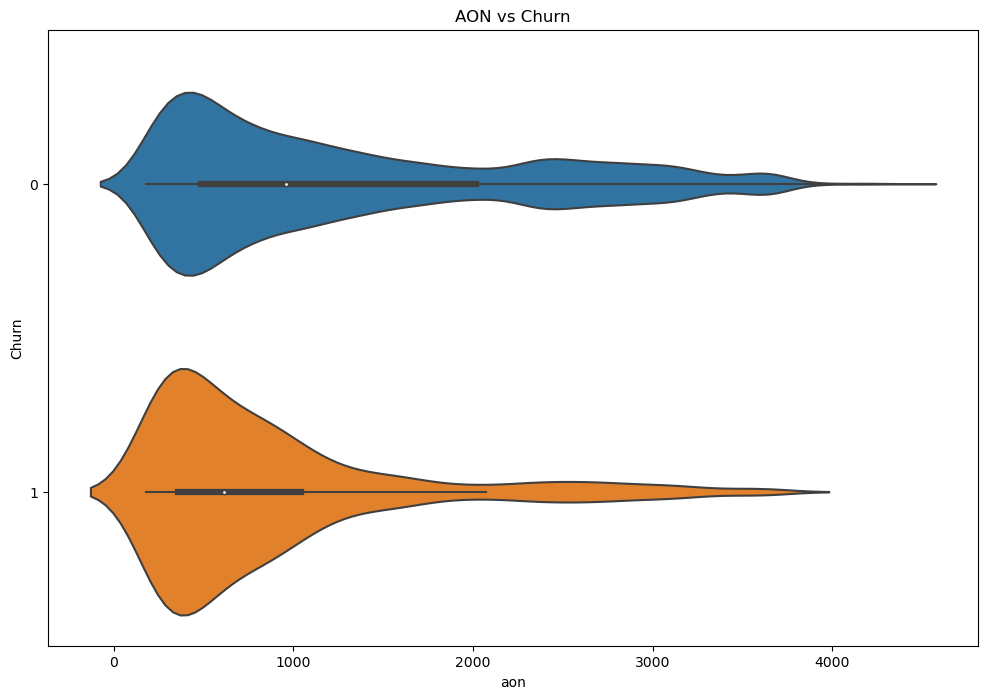

In [67]:
plt.figure(figsize=(12,8))
sns.violinplot(x ='aon', y ='Churn', data=data)
plt.title("AON vs Churn")
plt.show()

Customers with less 'age on network' is more likely to churn than compared to customers with higher 'age on network'

In [68]:
# Numerical variable univariate analysis
from tabulate import tabulate
def num_univariate_analysis(column_names, scale='linear'):
    
    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot(1,3,1)
    sns.violinplot(x='Churn', y = column_names[0], data = data, ax=ax1)
    title = ''.join(column_names[0]) + 'vs Churn'
    ax1.set(title=title)
    if scale == 'log':
        plt.yscale('log')
        ax1.set(ylabel= column_names[0] + '(Log Scale)')
        
    ax2 = fig.add_subplot(1,3,2)
    sns.violinplot(x='Churn', y = column_names[1], data = data, ax=ax2)
    title = ''.join(column_names[1]) + 'vs Churn'
    ax2.set(title=title)
    if scale == 'log':
        plt.yscale('log')
        ax2.set(ylabel= column_names[1] + '(Log Scale)')
        
    ax3 = fig.add_subplot(1,3,3)
    sns.violinplot(x='Churn', y = column_names[2], data = data, ax=ax3)
    title = ''.join(column_names[2]) + 'vs Churn'
    ax3.set(title=title)
    if scale == 'log':
        plt.yscale('log')
        ax3.set(ylabel= column_names[2] + '(Log Scale)')
     

In [69]:
# Summary
print('Customers who churned (Churn : 1)')
print(churned_customers[column_names].describe())

print('\nCustomers who did not churn (Churn : 0)')
print(non_churned_customers[column_names].describe(), '\n')

Customers who churned (Churn : 1)


NameError: name 'column_names' is not defined

In [ ]:
# Categorical variable univariate analysis
!pip install sidetable
import sidetable
def cat_univariate_analysis(column_names, figsize=(16,4)):
    
    fig = plt.figure(figsize=figsize)
    
    ax1 = fig.add_subplot(1,3,1)
    sns.countplot(x=column_names[0], hue = 'Churn', data = data, ax=ax1)
    title = column_names[0] + 'vs No of Churned Customers'
    ax1.set(title=title)
    ax1.legend(loc='upper right')
    
    ax2 = fig.add_subplot(1,3,2)
    sns.countplot(x=column_names[1], hue = 'Churn', data = data, ax=ax2)
    title = column_names[1] + 'vs No of Churned Customers'
    ax2.set(title=title)
    ax2.legend(loc='upper right')
    
    ax3 = fig.add_subplot(1,3,3)
    sns.countplot(x=column_names[2], hue = 'Churn', data = data, ax=ax3)
    title = column_names[2] + 'vs No of Churned Customers'
    ax3.set(title=title)
    ax3.legend(loc='upper right')
    
    
    print('Customers who churned (Churn : 1)')
    print(tabulate(pd.DataFrame(churned_customers.stb.freq([column_names[0]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(churned_customers.stb.freq([column_names[1]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(churned_customers.stb.freq([column_names[2]])), headers='keys', tablefmt='psql'),'\n')

    print('\nCustomers who did not churn (Churn : 0)')
    print(tabulate(pd.DataFrame(non_churned_customers.stb.freq([column_names[0]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(non_churned_customers.stb.freq([column_names[1]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(non_churned_customers.stb.freq([column_names[2]])), headers='keys', tablefmt='psql'),'\n')


In [ ]:
columns = ['arpu_6','arpu_7','arpu_8']
num_univariate_analysis(columns,'log')

Inference: 
    From above it can be noted that the revenue generated by customers who are about to churn are stable
    Customers whose average revenue per user is reduced in 7th month are more likely to churn

In [ ]:
columns = ['total_og_mou_6','total_og_mou_7','total_og_mou_8']
num_univariate_analysis(columns)

Inferences:
    Customer whose out going minutes of usage is less in 8th month compared to 6th and 7th month are more likely to  churn

In [ ]:
columns = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
num_univariate_analysis(columns)

Inferences:
    Customer whose incoming minutes of usage is less in 8th month compared to 6th and 7th month are more likely to  churn

In [ ]:
columns = ['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8']
num_univariate_analysis(columns,'log')

Inferences:
    Customers with reduced usage of 2g data in the month of Aug compared to june and july are more likely to churn

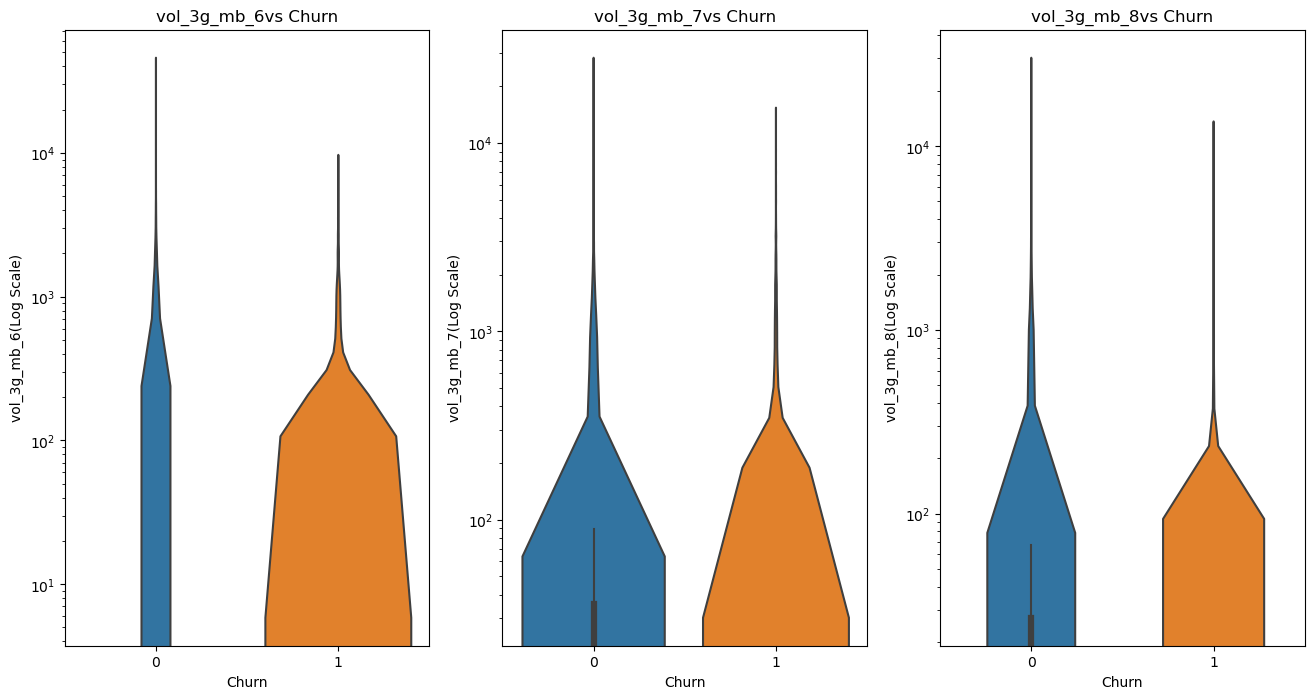

In [70]:
columns = ['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','monthly_3g_6']
num_univariate_analysis(columns,'log')

InferenceS:
    Customers with fall in usage of 3g data in the Aug month compared to june and july usage is more likely to churn

In [71]:
columns = ['monthly_2g_6','monthly_2g_7','monthly_2g_8']
cat_univariate_analysis(columns)

NameError: name 'cat_univariate_analysis' is not defined

In [ ]:
columns = ['monthly_3g_6','monthly_3g_7','monthly_3g_8']
cat_univariate_analysis(columns)

In [ ]:
columns = ['sachet_3g_6','sachet_3g_7','sachet_3g_8']
print(data[columns].dtypes)
cat_univariate_analysis(columns)

In [ ]:
columns = ['vbc_3g_6','vbc_3g_7','vbc_3g_8']
num_univariate_analysis(columns,'log')

### Bivariate Analysis

In [72]:
data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,Average_rech_amt_6n7,Churn
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1185.0,1
7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0
7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0
7000875565,430.975,299.869,187.894,50.51,74.01,7

<Axes: xlabel='total_og_mou_6', ylabel='total_og_mou_8'>

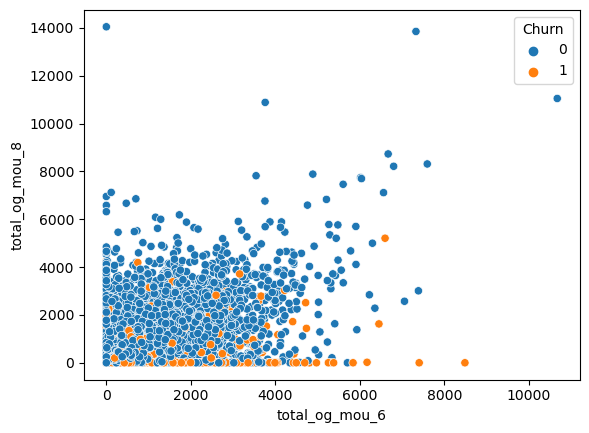

In [73]:
sns.scatterplot(x=data['total_og_mou_6'], y=data['total_og_mou_8'], hue=data['Churn'])

<Axes: xlabel='total_og_mou_7', ylabel='total_og_mou_8'>

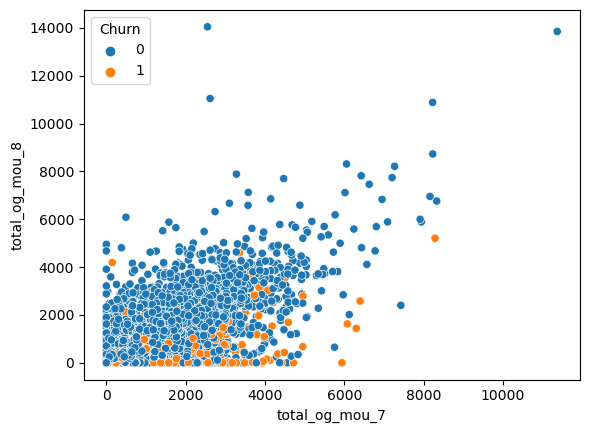

In [74]:
sns.scatterplot(x=data['total_og_mou_7'], y=data['total_og_mou_8'], hue=data['Churn'])

Inferences:
    Customers with lower out going minutes of user are more likely to churn than high og_mou

<Axes: xlabel='aon', ylabel='total_og_mou_8'>

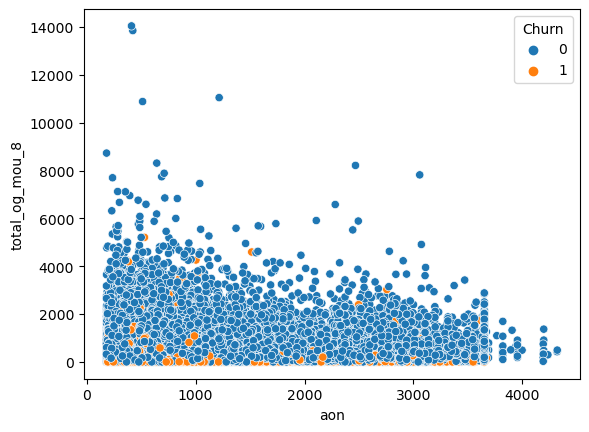

In [75]:
sns.scatterplot(x=data['aon'], y=data['total_og_mou_8'], hue=data['Churn'])

Inferences:
    Here, customers with lesser total_og_mou_8 and aon are more likely to churn

<Axes: xlabel='aon', ylabel='total_ic_mou_8'>

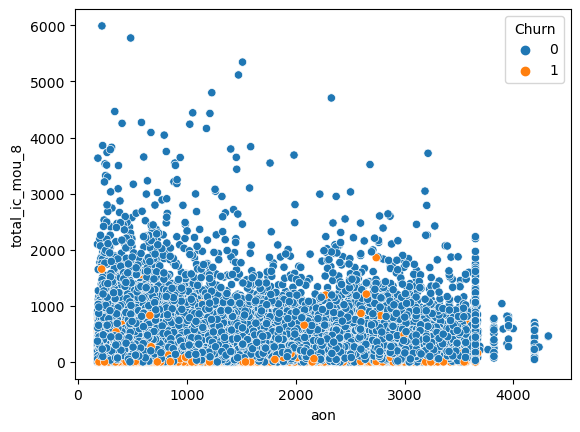

In [76]:
sns.scatterplot(x=data['aon'], y=data['total_ic_mou_8'], hue=data['Churn'])

Inferences:
    Here, customers with lesser total_ic_mou_8 are more likely to churn irrespective of aon.
    And customer <2000 total_ic_mou_8 are more likely to churn
    

# Correlation 

In [77]:
def correlation(dataframe):
    columnsForAnalysis = set(dataframe.columns.values)-{'Churn'}
    cor0=dataframe[columnsForAnalysis].corr()
    type(cor0)
    cor0.where(np.triu(np.ones(cor0.shape),k=1).astype(np.bool))
    cor0=cor0.unstack().reset_index()
    cor0.columns=['VAR1','VAR2','CORR']
    cor0.dropna(subset=['CORR'], inplace=True)
    cor0.CORR=round(cor0['CORR'],2)
    cor0.CORR=cor0.CORR.abs()
    cor0.sort_values(by=['CORR'],ascending=False)
    cor0=cor0[~(cor0['VAR1']==cor0['VAR2'])]
    
    cor0['pair'] = cor0[['VAR1','VAR2']].apply(lambda x: '{}-{}'.format(*sorted((x[0], x[1]))), axis=1)
    
    cor0 = cor0.drop_duplicates(subset=['pair'], keep='first')
    cor0 = cor0[['VAR1','VAR2','CORR']]
    return pd.DataFrame(cor0.sort_values(by=['CORR'],ascending=False))

In [78]:
cor_0 = correlation(non_churned_customers)

condition = cor_0['CORR'] > 0.4
cor_0 = cor_0[condition]
cor_0.style.background_gradient(cmap='GnBu').hide_index()

VAR1,VAR2,CORR
isd_og_mou_7,isd_og_mou_8,0.960000
isd_og_mou_6,isd_og_mou_8,0.950000
total_rech_amt_8,arpu_8,0.950000
isd_og_mou_7,isd_og_mou_6,0.950000
total_rech_amt_6,arpu_6,0.940000
total_rech_amt_7,arpu_7,0.940000
total_rech_amt_7,Average_rech_amt_6n7,0.910000
Average_rech_amt_6n7,arpu_7,0.910000
loc_ic_mou_6,total_ic_mou_6,0.900000
total_rech_amt_6,Average_rech_amt_6n7,0.900000


In [79]:
cor_1 = correlation(churned_customers)

condition = cor_1['CORR'] > 0.4
cor_1 = cor_1[condition]
cor_1.style.background_gradient(cmap='GnBu').hide_index()

VAR1,VAR2,CORR
og_others_8,og_others_7,1.000000
total_rech_amt_8,arpu_8,0.960000
total_rech_amt_7,arpu_7,0.950000
total_og_mou_8,std_og_mou_8,0.950000
total_rech_amt_6,arpu_6,0.950000
std_og_t2t_mou_7,onnet_mou_7,0.950000
total_og_mou_7,std_og_mou_7,0.940000
loc_og_t2f_mou_6,og_others_8,0.930000
loc_og_t2f_mou_6,loc_og_t2f_mou_7,0.930000
loc_og_t2f_mou_6,og_others_7,0.930000


# DATA Preparation

### Deriving New Variables

In [80]:
data['delta_vol_2g'] = data['vol_2g_mb_8'] - data['vol_2g_mb_6'].add(data['vol_2g_mb_7']).div(2)
data['delta_vol_3g'] = data['vol_3g_mb_8'] - data['vol_3g_mb_6'].add(data['vol_3g_mb_7']).div(2)
data['delta_total_og_mou'] = data['total_og_mou_8'] - data['total_og_mou_6'].add(data['total_og_mou_7']).div(2)
data['delta_total_ic_mou'] = data['total_ic_mou_8'] - data['total_ic_mou_6'].add(data['total_ic_mou_7']).div(2)
data['delta_vbc_3g'] = data['vbc_3g_8'] - data['vbc_3g_6'].add(data['vbc_3g_7']).div(2)


data['delta_arpu'] = data['arpu_8'] - data['arpu_6'].add(data['arpu_7']).div(2)
data['delta_total_rech_amt'] = data['total_rech_amt_8'] - data['total_rech_amt_6'].add(data['total_rech_amt_7']).div(2)

In [81]:
data.drop(columns=['vol_2g_mb_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 
                   'vol_3g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 
                   'total_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 
                   'total_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 
                   'vbc_3g_8', 'vbc_3g_6', 'vbc_3g_7',
                   'arpu_8', 'arpu_6', 'arpu_7', 
                   'total_rech_amt_8', 'total_rech_amt_6', 'total_rech_amt_7'], inplace= True)

## Treating Outliers

In [82]:
data.quantile(np.arange(0.9,1.01,0.01)).style.bar()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,Average_rech_amt_6n7,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt
0.900000,794.980000,824.380000,723.610000,915.580000,935.690000,853.790000,32.730000,18.360000,18.680000,64.480000,41.200000,37.110000,207.930000,207.840000,196.910000,435.160000,437.490000,416.660000,18.380000,18.660000,16.960000,4.040000,4.840000,4.450000,661.740000,657.380000,633.340000,630.530000,663.790000,567.340000,604.410000,645.880000,531.260000,2.200000,2.180000,1.730000,1140.930000,1177.180000,1057.290000,0.000000,0.000000,0.000000,15.930000,19.510000,18.040000,2.260000,0.000000,0.000000,154.880000,156.610000,148.140000,368.540000,364.540000,360.540000,39.230000,41.040000,37.190000,559.280000,558.990000,549.790000,34.730000,36.010000,32.140000,73.380000,75.280000,68.580000,4.360000,4.580000,3.940000,115.910000,118.660000,108.380000,0.280000,0.000000,0.000000,15.010000,18.300000,15.330000,1.160000,1.590000,1.230000,23.000000,23.000000,21.000000,297.000000,300.000000,252.000000,250.000000,250.000000,225.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2846.000000,1118.000000,29.835000,170.075000,345.070000,147.300000,69.830000,257.309500,319.000000
0.910000,848.967000,878.352000,783.488000,966.740000,984.020000,899.286000,39.692000,23.281000,23.392000,78.431000,50.012000,46.435000,225.963000,224.873000,213.831000,461.095000,461.812000,441.836000,20.281000,20.680000,18.840000,4.680000,5.512000,5.112000,703.112000,692.668000,669.633000,686.255000,722.843000,622.128000,658.472000,695.767000,583.424000,2.910000,2.800000,2.280000,1195.610000,1244.396000,1125.276000,0.000000,0.000000,0.000000,17.540000,21.283000,19.692000,2.540000,0.000000,0.000000,165.792000,168.033000,159.838000,390.636000,387.112000,382.199000,43.590000,45.392000,41.212000,593.133000,589.645000,580.535000,38.212000,39.912000,35.930000,80.412000,81.931000,75.542000,5.210000,5.491000,4.710000,125.981000,129.288000,118.240000,0.300000,0.000000,0.000000,18.341000,21.841000,18.831000,1.440000,1.940000,1.510000,24.000000,24.000000,22.000000,325.000000,330.000000,289.000000,250.000000,250.000000,250.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2910.100000,1156.000000,39.883000,227.151000,377.460500,161.801000,95.325000,278.900400,345.500000
0.920000,909.054000,941.990000,848.964000,1031.390000,1038.090000,953.354000,48.710000,29.680000,29.644000,93.598000,60.966000,57.594000,247.944000,244.780000,232.330000,490.630000,488.036000,468.830000,22.560000,23.144000,20.930000,5.450000,6.260000,5.864

In [83]:
data.quantile(np.arange(0.9,1.01,0.01)).pct_change().mul(100).style.bar()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,Average_rech_amt_6n7,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt
0.900000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
0.910000,6.790988,6.546981,8.274899,5.587715,5.165172,5.328711,21.271005,26.802832,25.224839,21.636166,21.388350,25.127998,8.672630,8.195246,8.593266,5.959877,5.559441,6.042337,10.342764,10.825295,11.084906,15.841584,13.884298,14.876404,6.252002,5.367976,5.730413,8.837803,8.896338,9.656996,8.944591,7.723881,9.818921,32.272727,28.440367,31.791908,4.792581,5.709917,6.430213,nan,nan,nan,10.106717,9.087647,9.157428,12.389381,nan,nan,7.045455,7.293915,7.896584,5.995550,6.191913,6.007378,11.113943,10.604288,10.814735,6.052961,5.483998,5.592135,10.025914,10.835879,11.792159,9.582993,8.835016,10.151648,19.495413,19.890830,19.543147,8.688638,8.956683,9.097619,7.142857,nan,nan,22.191872,19.349727,22.837573,24.137931,22.012579,22.764228,4.347826,4.347826,4.761905,9.427609,10.000000,14.682540,0.000000,0.000000,11.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.252284,3.398927,33.678565,33.559312,9.386646,9.844535,36.510096,8.391023,8.307210
0.920000,7.077660,7.245159,8.356988,6.687424,5.494807,6.012325,22.719944,27.485933,26.727086,19.338017,21.902743,24.031442,9.727699,8.852552,8.651225,6.405405,5.678501,6.109507,11.237118,11.914894,11.093418,16.452991,13.570392,14.710485,5.666807,6.211634,6.262684,9.334285,8.790706,9.318983,8.355405,9.372247,9.794249,28.522337,32.500000,32.017544,6.124071,5.680185,6.755143,inf,inf,nan,9.806157,9.918714,10.603291,12.598425,nan,nan,8.679550,8.010926,8.604963,6.464330,6.436897,6.219535,11.603579,11.614381,12.079006,6.154269,5.887441,5.841336,11.828745,11.700742,11.299750,9.767199,10.348952,10.460406,21.497121,20.378802,22.123142,9.794334,9.954520,10.412720,10.000000,nan,inf,23.123058,23.346001,25.197812,23.611111,22.680412,23.178808,4.166667,4.166667,4.545455,7.692308,6.060606,14.186851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.443215,3.979239,34.548555,27.360654,11.261178,9.607481,33.756098,8.823437,8.538350
0.930000,8.957224,7.872164,8.480572,6.144814,6.342032,6.712302,24.032026,25.61657

In [84]:
### Column with outliers

In [85]:
pct_change_99_1 = data.quantile(np.arange(0.9,1.01,0.01)).pct_change().mul(100).iloc[-1]
outlier_condition = pct_change_99_1 > 100
columns_with_outliers = pct_change_99_1[outlier_condition].index.values
print('Columns with Outliers :\n', columns_with_outliers)

Columns with Outliers :
 ['onnet_mou_6' 'onnet_mou_7' 'onnet_mou_8' 'offnet_mou_6' 'offnet_mou_7'
 'offnet_mou_8' 'roam_ic_mou_6' 'roam_ic_mou_7' 'roam_ic_mou_8'
 'roam_og_mou_6' 'roam_og_mou_7' 'roam_og_mou_8' 'loc_og_t2t_mou_6'
 'loc_og_t2t_mou_7' 'loc_og_t2t_mou_8' 'loc_og_t2m_mou_6'
 'loc_og_t2m_mou_7' 'loc_og_t2m_mou_8' 'loc_og_t2f_mou_6'
 'loc_og_t2f_mou_7' 'loc_og_t2f_mou_8' 'loc_og_t2c_mou_6'
 'loc_og_t2c_mou_7' 'loc_og_t2c_mou_8' 'loc_og_mou_6' 'loc_og_mou_7'
 'loc_og_mou_8' 'std_og_t2t_mou_6' 'std_og_t2t_mou_7' 'std_og_t2t_mou_8'
 'std_og_t2m_mou_6' 'std_og_t2m_mou_7' 'std_og_t2m_mou_8'
 'std_og_t2f_mou_6' 'std_og_t2f_mou_7' 'std_og_t2f_mou_8' 'std_og_mou_6'
 'std_og_mou_7' 'std_og_mou_8' 'isd_og_mou_6' 'isd_og_mou_7'
 'isd_og_mou_8' 'spl_og_mou_6' 'spl_og_mou_7' 'spl_og_mou_8' 'og_others_6'
 'og_others_7' 'og_others_8' 'loc_ic_t2t_mou_6' 'loc_ic_t2t_mou_7'
 'loc_ic_t2t_mou_8' 'loc_ic_t2m_mou_6' 'loc_ic_t2m_mou_7'
 'loc_ic_t2m_mou_8' 'loc_ic_t2f_mou_6' 'loc_ic_t2f_mou_7'
 'lo

In [86]:
outlier_treatment = pd.DataFrame(columns = ['Column', 'Outlier Threshold','Outliers replaced'])
for col in columns_with_outliers:
    outlier_threshold = data[col].quantile(0.99)
    condition = data[col] > outlier_threshold
    outlier_treatment = outlier_treatment.append({'Column' : col, 'Outlier Threshold' : outlier_threshold, 'Outliers replaced' : data.loc[condition,col].shape[0] }, ignore_index=True)
    data.loc[condition,col] = outlier_threshold
    
outlier_treatment    

,Column,Outlier Threshold,Outliers replaced
0,onnet_mou_6,2166.37000,301
1,onnet_mou_7,2220.36700,301
2,onnet_mou_8,2188.50400,301
3,offnet_mou_6,2326.29000,301
4,offnet_mou_7,2410.10400,301
5,offnet_mou_8,2211.64200,301
6,roam_ic_mou_6,349.35300,301
7,roam_ic_mou_7,292.54000,301
8,roam_ic_mou_8,288.48500,301
9,roam_og_mou_6,543.70900,301


In [87]:
categorical = data.dtypes == 'category'
categorical_vars = data.columns[categorical].to_list()
ind_categorical_vars = set(categorical_vars) - {'Churn'}
ind_categorical_vars

{'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8'}


### Grouping of less Contributors

In [88]:
for col in ind_categorical_vars :
    category_counts = 100*data[col].value_counts(normalize = True)
    print('\n',tabulate(pd.DataFrame(category_counts), headers='keys', tablefmt='psql'),'\n')
    low_count_categories = category_counts[category_counts <=1].index.to_list()
    print(f"Replaced {low_count_categories} in {col} with category : Others")
    data[col].replace(low_count_categories,'Others',inplace=True)


 +----+---------------+
|    |   sachet_3g_7 |
|----+---------------|
|  0 |   93.4757     |
|  1 |    4.10849    |
|  2 |    1.03962    |
|  3 |    0.383193   |
|  4 |    0.239912   |
|  5 |    0.219919   |
|  6 |    0.139949   |
|  7 |    0.059978   |
|  9 |    0.0533138  |
|  8 |    0.0466496  |
| 11 |    0.0433175  |
| 10 |    0.0333211  |
| 12 |    0.0333211  |
| 14 |    0.0166606  |
| 15 |    0.0166606  |
| 18 |    0.0133284  |
| 13 |    0.0133284  |
| 19 |    0.00999633 |
| 20 |    0.00999633 |
| 22 |    0.00999633 |
| 17 |    0.00666422 |
| 21 |    0.00666422 |
| 24 |    0.00666422 |
| 16 |    0.00333211 |
| 31 |    0.00333211 |
| 33 |    0.00333211 |
| 35 |    0.00333211 |
+----+---------------+ 

Replaced [3, 4, 5, 6, 7, 9, 8, 11, 10, 12, 14, 15, 18, 13, 19, 20, 22, 17, 21, 24, 16, 31, 33, 35] in sachet_3g_7 with category : Others

 +----+---------------+
|    |   sachet_3g_8 |
|----+---------------|
|  0 |   94.2388     |
|  1 |    3.52537    |
|  2 |    0.839692   |
|  3 |

# Create Dummy Variable

In [89]:
dummy_vars = pd.get_dummies(data[ind_categorical_vars], drop_first=False, prefix=ind_categorical_vars, prefix_sep='_')
dummy_vars.head()

,sachet_3g_7_0,sachet_3g_7_1,sachet_3g_7_2,sachet_3g_7_Others,sachet_3g_8_0,sachet_3g_8_1,sachet_3g_8_Others,sachet_2g_8_0,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5,sachet_2g_8_Others,sachet_2g_7_0,sachet_2g_7_1,sachet_2g_7_2,sachet_2g_7_3,sachet_2g_7_4,sachet_2g_7_5,sachet_2g_7_Others,sachet_2g_6_0,sachet_2g_6_1,sachet_2g_6_2,sachet_2g_6_3,sachet_2g_6_4,sachet_2g_6_Others,sachet_3g_6_0,sachet_3g_6_1,sachet_3g_6_2,sachet_3g_6_Others
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
7001524846,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
7002191713,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
7000875565,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
7000187447,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [90]:
reference_cols = dummy_vars.filter(regex='.*Others$').columns.to_list()
dummy_vars.drop(columns=reference_cols, inplace= True)
reference_cols

['sachet_3g_7_Others',
 'sachet_3g_8_Others',
 'sachet_2g_8_Others',
 'sachet_2g_7_Others',
 'sachet_2g_6_Others',
 'sachet_3g_6_Others']

Concatenate dummy variable with original data

In [91]:
data.drop(columns= ind_categorical_vars, inplace= True)
data = pd.concat([data, dummy_vars], axis=1)
data.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,Average_rech_amt_6n7,Churn,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt,sachet_3g_7_0,sachet_3g_7_1,sachet_3g_7_2,sachet_3g_8_0,sachet_3g_8_1,sachet_2g_8_0,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5,sachet_2g_7_0,sachet_2g_7_1,sachet_2g_7_2,sachet_2g_7_3,sachet_2g_7_4,sachet_2g_7_5,sachet_2g_6_0,sachet_2g_6_1,sachet_2g_6_2,sachet_2g_6_3,sachet_2g_6_4,sachet_3g_6_0,sachet_3g_6_1,sachet_3g_6_2
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.590,15.740,15.19,15.14,5,5,7,1000,790,951,0,0,619,0,0,0,0,0,0,802,1185.0,1,0.00,0.000,-198.225,-163.510,38.680,864.34085,1036.4,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
7001524846,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.000,0.000,0.00,0.00,19,21,14,90,154,30,50,0,10,0,1,0,0,0,0,315,519.0,0,-177.97,-363.535,-298.450,-49.635,-495.375,-298.11000,-399.0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
7002191713,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,0.45,0.0,0.0,239.60,62.11,249.888,20.708,16.24,21.44,6,4,11,110,110,130,110,50,0,0,0,0,0,0,0,2607,380.0,0,0.02,0.000,465.510,573.935,0.000,244.00150,337.0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
7000875565,50

In [92]:
dummy_cols = dummy_vars.columns.to_list()
data[dummy_cols] = data[dummy_cols].astype('category')

In [93]:
data.shape

(30011, 131)

# Train-Test Split

In [94]:
y = data.pop('Churn')
X = data

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state = 42)

# Class Imbalance

In [96]:
y.value_counts(normalize=True).to_frame()

,Churn
0,0.913598
1,0.086402


In [97]:
#Ratio of Churn cases:
class_0 = y[y == 0].count()
class_1 = y[y == 1].count()

print(f'Class Imbalance ratio: {round(class_1/class_0,3)}')

Class Imbalance ratio: 0.095


In [98]:
# SMOTE
#!pip install imblearn
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state =42, k_neighbors=5)


In [99]:
X_train_resampled, y_train_resampled = smt.fit_resample(X_train, y_train)
X_train_resampled.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,Average_rech_amt_6n7,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt,sachet_3g_7_0,sachet_3g_7_1,sachet_3g_7_2,sachet_3g_8_0,sachet_3g_8_1,sachet_2g_8_0,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5,sachet_2g_7_0,sachet_2g_7_1,sachet_2g_7_2,sachet_2g_7_3,sachet_2g_7_4,sachet_2g_7_5,sachet_2g_6_0,sachet_2g_6_1,sachet_2g_6_2,sachet_2g_6_3,sachet_2g_6_4,sachet_3g_6_0,sachet_3g_6_1,sachet_3g_6_2
0,53.01,52.64,37.48,316.01,195.74,68.36,0.0,0.0,0.0,0.0,0.0,0.0,53.01,52.64,37.48,282.38,171.64,44.51,31.59,17.38,19.43,0.0,0.0,0.00,366.99,241.68,101.43,0.00,0.00,0.00,0.00,2.11,0.00,2.03,4.59,4.41,2.03,6.71,4.41,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,18.41,40.79,11.79,292.99,191.98,85.89,6.26,1.21,10.39,317.68,233.99,108.09,0.00,0.00,0.00,0.66,0.00,0.00,5.61,1.53,2.76,6.28,1.53,2.76,0.00,0.0,0.00,0.00,0.00,9.55,0.00,0.00,0.00,6,5,4,198,198,198,110,130,130,1,1,1,0,0,0,1423,483.0,-791.7700,1077.750,-202.870,-159.335,71.085,-172.4995,-155.0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1,91.39,216.14,150.58,504.19,301.98,434.41,0.0,0.0,0.0,0.0,0.0,0.0,40.36,36.21,27.73,37.26,36.73,59.61,0.00,0.00,0.00,0.0,0.0,0.58,77.63,72.94,87.34,51.03,179.93,122.84,465.96,265.24,356.44,0.00,0.00,0.00,516.99,445.18,479.29,0.96,0.0,3.89,0.0,0.0,14.45,0.0,0.0,0.0,104.39,31.98,35.83,154.11,147.88,243.53,0.00,0.76,0.00,258.51,180.63,279.36,4.03,2.99,0.46,6.36,12.31,3.91,0.00,0.00,0.00,10.39,15.31,4.38,0.58,0.0,0.25,19.66,21.96,86.63,0.23,0.56,1.04,8,11,12,110,130,130,0,130,0,0,0,0,0,0,0,189,454.0,0.0000,0.000,28.130,117.745,0.000,48.6160,-94.0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
2,11.96,14.13,0.40,1.51,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,11.96,14.13,0.40,1.51,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,13.48,14.13,0.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,20.58,20.39,97.66,36.84,21.58,18.66,5.48,0.73,1.43,62.91,42.71,117.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5,3,4,252,252,252,252,0,252,0,0,0,2,1,2,2922,403.0,-44.6300,-5.525,-13.405,64.950,0.000,75.3940,151.0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
3,532.66,537.31,738.21,49.03,71.64,39.43,0.0,0.0,0.0,0.0,0.0,0.0,24.46,19.79,37.74,41.26,47.86,39.43,1.19,4.04,0.00,0.0,0.0,0.00,66.93,71.71,77.18,508.19,517.51,700.46,6.56,18.24,0.00,0.00,1.48,0.00,514.76,537.24,700.46,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,19.86,28.81,20.24,66.08,94.18,67.54,51.74,68.16,50.08,137.69,19

# Standardizing Columns

In [100]:
condition1 = data.dtypes == 'int'
condition2 = data.dtypes == 'float'
numerical_vars = data.columns[condition1 | condition2].to_list()

In [101]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_resampled[numerical_vars] = scaler.fit_transform(X_train_resampled[numerical_vars])

X_test[numerical_vars] = scaler.transform(X_test[numerical_vars])

In [102]:
round(X_train_resampled.describe(),2)

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,Average_rech_amt_6n7,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt
count,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.0,38374.0,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00
mean,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,12.66,11.42,7.67,159.44,156.00,119.18,95.03,86.67,62.18,0.07,0.08,0.06,0.12,0.11,0.10,1074.47,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,0.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,8.56,8.49,7.80,147.97,150.12,138.14,102.68,102.56,97.92,0.29,0.29,0.26,0.42,0.42,0.39,886.36,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.73,-0.68,-0.53,-0.94,-0.89,-0.70,-0.31,-0.32,-0.33,-0.33,-0.36,-0.36,-0.50,-0.49,-0.42,-0.75,-0.73,-0.59,-0.38,-0.38,-0.33,-0.37,-0.37,-0.31,-0.76,-0.74,-0.60,-0.57,-0.54,-0.40,-0.60,-0.57,-0.43,-0.22,-0.22,-0.19,-0.79,-0.74,-0.53,-0.20,-0.18,-0.15,-0.51,-0.53,-0.43,-0.44,0.0,0.0,-0.61,-0.57,-0.48,-0.77,-0.75,-0.61,-0.40,-0.39,-0.35,-0.80,-0.77,-

# Modelling

In [103]:
# Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
baseline_model = LogisticRegression(random_state=100, class_weight='balanced')
baseline_model = baseline_model.fit(X_train,y_train)

In [106]:
y_train_pred = baseline_model.predict_proba(X_train)[:,1]
y_test_pred = baseline_model.predict_proba(X_test)[:,1]

In [107]:
y_train_pred = pd.Series(y_train_pred,index = X_train.index, )
y_test_pred = pd.Series(y_test_pred,index = X_test.index)

In [108]:
# Confusion Matrix
import math
def model_metrics(matrix):
    TP = matrix[1][1] # true positives
    TN = matrix[0][0] # true negatives
    FP = matrix[0][1] # false positives
    FN = matrix[1][0] # false negatives
    accuracy = round((TP + TN )/float(TP+TN+FP+FN),2)
    print('Accuracy:' , accuracy)
    sensitivity = round(TP/float(FN + TP),2)
    print('Sensitivity:' , sensitivity)
    specificity = round(TN/float(TN + FP),2)
    print('Specificity:' , specificity)
    precision = round(TP/float(TP + FP),2)
    print('Precision:' , precision)
    print('F1-score:' , round(2*precision*sensitivity/(precision + sensitivity),2))

In [109]:
classification_threshold = 0.5
y_train_pred_classified = y_train_pred.map(lambda x : 1 if x > classification_threshold else 0)
y_test_pred_classified = y_test_pred.map(lambda x : 1 if x > classification_threshold else 0)

In [110]:
from sklearn.metrics import confusion_matrix
train_matrix = confusion_matrix(y_train, y_train_pred_classified)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_classified)
print('\nConfusion Matrix for test:\n', test_matrix)

Confusion Matrix for train:
 [[15992  3195]
 [  322  1498]]

Confusion Matrix for test:
 [[6786 1445]
 [ 305  468]]


In [111]:
print('Train Performance: \n')
model_metrics(train_matrix)

print('\n\nTest Performance: \n')
model_metrics(test_matrix)

Train Performance: 

Accuracy: 0.83
Sensitivity: 0.82
Specificity: 0.83
Precision: 0.32
F1-score: 0.46


Test Performance: 

Accuracy: 0.81
Sensitivity: 0.61
Specificity: 0.82
Precision: 0.24
F1-score: 0.34


# To find optimum Probability Cutoff

In [112]:
y_train_pred_thres = pd.DataFrame(index=X_train.index)
thresholds = [float(x)/10 for x in range(10)]

def thresholder(x, thresh):
    if x > thresh :
        return 1
    else :
        return 0
    
for i in thresholds:
    y_train_pred_thres[i] = y_train_pred.map(lambda x : thresholder(x,i))
y_train_pred_thres.head()    

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
mobile_number,,,,,,,,,,
7000166926,1,1,1,1,1,0,0,0,0,0
7001343085,1,1,1,0,0,0,0,0,0,0
7001863283,1,1,0,0,0,0,0,0,0,0
7002275981,1,1,1,0,0,0,0,0,0,0
7001086221,1,0,0,0,0,0,0,0,0,0


In [113]:
metrics_df = pd.DataFrame(columns=['sensitivity','specificity','accuracy'])

def model_metrics_thres(matrix):
    TP = matrix[1][1] # true positives
    TN = matrix[0][0] # true negatives
    FP = matrix[0][1] # false positives
    FN = matrix[1][0] # false negatives
    accuracy = round((TP + TN )/float(TP+TN+FP+FN),2)
    sensitivity = round(TP/float(FN + TP),2)
    specificity = round(TN/float(TN + FP),2)
    return sensitivity, specificity, accuracy

# Dataframe for each threshold metrics
for thres,column in zip(thresholds, y_train_pred_thres.columns.to_list()):
    confusion = confusion_matrix(y_train, y_train_pred_thres.loc[:,column])
    sensitivity,specificity,accuracy = model_metrics_thres(confusion)
    
    metrics_df = metrics_df.append({
        'sensitivity': sensitivity,
        'specificity': specificity,
        'accuracy': accuracy
    }, ignore_index = True)
    
metrics_df.index = thresholds
metrics_df 
    

,sensitivity,specificity,accuracy
0.0,1.00,0.00,0.09
0.1,0.97,0.34,0.40
0.2,0.95,0.52,0.56
0.3,0.91,0.66,0.68
0.4,0.87,0.76,0.77
0.5,0.82,0.83,0.83
0.6,0.77,0.88,0.87
0.7,0.67,0.92,0.90
0.8,0.49,0.95,0.91
0.9,0.23,0.98,0.92


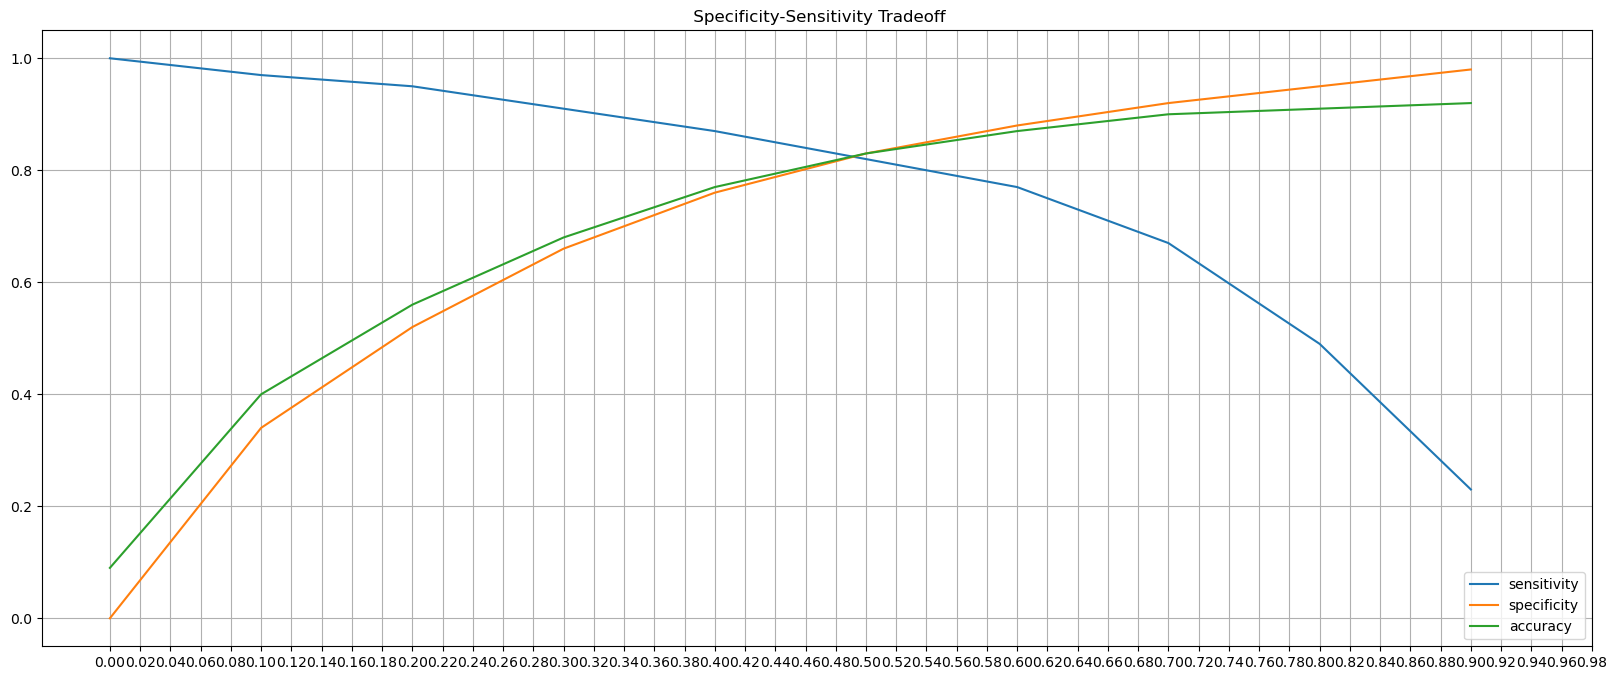

In [114]:
metrics_df.plot(kind='line', figsize=(20,8), grid=True,xticks=np.arange(0,1,0.02), title = ' Specificity-Sensitivity Tradeoff');

### Performance at optimal cut off

In [115]:
cutoff = 0.49
y_train_pred_final = y_train_pred.map(lambda x: 1 if x > cutoff else 0)
y_test_pred_final = y_test_pred.map(lambda x: 1 if x > cutoff else 0)

train_matrix = confusion_matrix(y_train, y_train_pred_final)
print('Confusion matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_final)
print('Confusion matrix for test:\n', test_matrix)

Confusion matrix for train:
 [[15878  3309]
 [  318  1502]]
Confusion matrix for test:
 [[6497 1734]
 [ 249  524]]


In [116]:
print('Train Performance: \n')
model_metrics(train_matrix)

print('\n\nTest Performance: \n')
model_metrics(test_matrix)

Train Performance: 

Accuracy: 0.83
Sensitivity: 0.83
Specificity: 0.83
Precision: 0.31
F1-score: 0.45


Test Performance: 

Accuracy: 0.78
Sensitivity: 0.68
Specificity: 0.79
Precision: 0.23
F1-score: 0.34


In [117]:
# ROC_AUC Score
from sklearn.metrics import roc_auc_score
print('ROC AUC score for Train:', round(roc_auc_score(y_train, y_train_pred),2), '\n')
print('ROC AUC score for Test:', round(roc_auc_score(y_test, y_test_pred),2) )


ROC AUC score for Train: 0.89 

ROC AUC score for Test: 0.78


## Feature selection using RFE

In [118]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=100, class_weight='balanced')
rfe = RFE(lr, step=15)
results = rfe.fit(X_train, y_train)
results.support_

array([False,  True,  True, False, False, False, False,  True,  True,
        True, False,  True, False,  True,  True, False, False,  True,
        True,  True, False,  True, False, False, False, False,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False, False, False,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False, False, False,  True, False, False,  True,  True, False,
        True, False,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False,

In [119]:
rfe_support = pd.DataFrame({'Column': X.columns.to_list(), 'Rank': rfe.ranking_, 'Support': rfe.support_}).sort_values(by='Rank', ascending=True)
rfe_support

,Column,Rank,Support
64,std_ic_t2m_mou_7,1,True
51,loc_ic_t2m_mou_6,1,True
50,loc_ic_t2t_mou_8,1,True
83,total_rech_num_8,1,True
48,loc_ic_t2t_mou_6,1,True
84,max_rech_amt_6,1,True
85,max_rech_amt_7,1,True
81,total_rech_num_6,1,True
87,last_day_rch_amt_6,1,True
43,spl_og_mou_7,1,True


In [120]:
rfe_selected_columns = rfe_support.loc[rfe_support['Rank'] == 1, 'Column'].to_list()
rfe_selected_columns

['std_ic_t2m_mou_7',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2t_mou_8',
 'total_rech_num_8',
 'loc_ic_t2t_mou_6',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'total_rech_num_6',
 'last_day_rch_amt_6',
 'spl_og_mou_7',
 'spl_og_mou_6',
 'isd_og_mou_8',
 'isd_og_mou_7',
 'isd_og_mou_6',
 'std_og_mou_8',
 'spl_og_mou_8',
 'last_day_rch_amt_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_7',
 'std_ic_mou_8',
 'std_ic_mou_7',
 'std_ic_t2f_mou_8',
 'std_ic_t2f_mou_7',
 'std_ic_t2f_mou_6',
 'std_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'ic_others_6',
 'std_ic_t2t_mou_8',
 'std_ic_t2t_mou_7',
 'ic_others_7',
 'loc_ic_mou_7',
 'loc_ic_mou_6',
 'loc_ic_t2f_mou_8',
 'std_ic_t2m_mou_6',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'isd_ic_mou_6',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'sachet_3g_8_0',
 'sachet_2g_7_0',
 'roam_og_mou_8',
 'sachet_2g_6_0',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'delta_total_rech_amt',
 'last_day_rch_amt_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'sachet_2g_8_0',
 'loc_

In [121]:
import statsmodels.api as sm

logr =sm.GLM(y_train,(sm.add_constant(X_train[rfe_selected_columns])), family = sm.families.Binomial())
logr_fit = logr.fit()
logr_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20941
Model Family:                Binomial   Df Model:                           65
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4010.0
Date:                Mon, 12 Jun 2023   Deviance:                       8020.1
Time:                        15:38:43   Pearson chi2:                 1.49e+06
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1875
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.8281      0.231     -7.904      0.000      -2.281      -1.375
std_ic_t2m_mou_7        -0.0049      0.002     -2.474      0.013      -0.009      -0.001
loc_ic_t2m_mou_6         0.0021      0.001      1.761      0.078      -0.000       0.004
loc_ic_t2t_mou_8        -0.0049      0.001     -4.885      0.000      -0.007      -0.003
total_rech_num_8        -0.0611      0.007     -8.353      0.000      -0.075      -0.047
loc_ic_t2t_mou_6         0.0014      0.001      1.134      0.257      -0.001       0.004
max_rech_amt_6           0.0003      0.000      1.195      0.232      -0.000       0.001
max_rech_amt_7        6.012e-05      0.000      0.246      0.805      -0.000       0.001
total_rech_num_6         0.0100      0.005      2.206      0.027       0.001       0.019
last_day_rch_amt_6      -0.0006      0.000     -1.766      0.077      -0.001    6.82e-05
spl_og_mou_7             0.0011      0.003      0.410      0.682      -0.004       0.006
spl_og_mou_6            -0.0048      0.003     -1.425      0.154      -0.012       0.002
isd_og_mou_8             0.0189      0.012      1.543      0.123      -0.005       0.043
isd_og_mou_7             0.0020      0.009      0.229      0.819      -0.015       0.019
isd_og_mou_6             0.0071      0.008      0.931      0.352      -0.008       0.022
std_og_mou_8             0.0036      0.000      7.184      0.000       0.003       0.005
spl_og_mou_8            -0.0072      0.004     -1.895      0.058      -0.015       0.000
last_day_rch_amt_7      -0.0009      0.000     -2.437      0.015      -0.002      -0.000
loc_ic_t2m_mou_8        -0.0082      0.001    -10.272      0.000      -0.010      -0.007
loc_ic_t2f_mou_7     -2.423e-05      0.003     -0.010      0.992      -0.005       0.005
std_ic_mou_8             0.0007      0.002      0.271      0.786      -0.004       0.005
std_ic_mou_7             0.0024      0.002      1.446      0.148      -0.001       0.006
std_ic_t2f_mou_8        -0.0293      0.011     -2.627      0.009      -0.051      -0.007
std_ic_t2f_mou_7         0.0107      0.007      1.465      0.143      -0.004       0.025
std_ic_t2f_mou_6         0.0063      0.007      0.954      0.340      -0.007       0.019
std_ic_t2m_mou_8        -0.0041      0.003     -1.419      0.156      -0.010       0.002
loc_ic_t2f_mou_6        -0.0006      0.003     -0.230      0.818      -0.006       0.004
ic_others_6              0.0034      0.012      0.275      0.783      -0.021       0.028
std_ic_t2t_mou_8        -0.0085      0.004     -2.305      0.021      -0.016      -0.001
std_ic_t2t_mou_7         0.0014      0.002      0.635      0.525      -0.003       0.006
ic_others_7             -0.0236      0.012     -1.978      0.048      -0.047      -0.000
loc_ic_mou_7             0.0020      0.000      6.186    

In [122]:
columns = X_train.columns[rfe.support_]
columns

Index(['onnet_mou_7', 'onnet_mou_8', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_8', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2c_mou_6', 'loc_og_mou_8',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_6', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_8', 'isd_og_mou_6',
       'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7',
       'spl_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6',
       'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6',
       'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_7', 'std_ic_mou_8',
       'isd_ic_mou_6', 'ic_others_6'

In [123]:
# Model 1

In [124]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train[columns])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20941
Model Family:                Binomial   Df Model:                           65
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4010.0
Date:                Mon, 12 Jun 2023   Deviance:                       8020.1
Time:                        15:39:15   Pearson chi2:                 1.49e+06
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1875
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.8281      0.231     -7.904      0.000      -2.281      -1.375
onnet_mou_7              0.0008      0.001      1.514      0.130      -0.000       0.002
onnet_mou_8             -0.0007      0.001     -0.874      0.382      -0.002       0.001
roam_ic_mou_7            0.0023      0.001      2.712      0.007       0.001       0.004
roam_ic_mou_8           -0.0016      0.001     -1.595      0.111      -0.004       0.000
roam_og_mou_6            0.0012      0.000      3.473      0.001       0.001       0.002
roam_og_mou_8            0.0030      0.001      4.411      0.000       0.002       0.004
loc_og_t2t_mou_7        -0.0013      0.001     -1.671      0.095      -0.003       0.000
loc_og_t2t_mou_8         0.0017      0.002      0.716      0.474      -0.003       0.006
loc_og_t2m_mou_8        -0.0012      0.002     -0.537      0.591      -0.005       0.003
loc_og_t2f_mou_6        -0.0018      0.004     -0.404      0.686      -0.011       0.007
loc_og_t2f_mou_7        -0.0070      0.005     -1.395      0.163      -0.017       0.003
loc_og_t2c_mou_6        -0.0023      0.009     -0.264      0.792      -0.020       0.015
loc_og_mou_8            -0.0014      0.002     -0.632      0.527      -0.006       0.003
std_og_t2t_mou_6         0.0007      0.000      1.740      0.082   -8.62e-05       0.001
std_og_t2t_mou_7        -0.0008      0.001     -1.502      0.133      -0.002       0.000
std_og_t2t_mou_8        -0.0030      0.001     -3.333      0.001      -0.005      -0.001
std_og_t2m_mou_6         0.0008      0.000      2.196      0.028    9.02e-05       0.002
std_og_t2m_mou_8        -0.0039      0.001     -6.921      0.000      -0.005      -0.003
std_og_t2f_mou_6        -0.0039      0.008     -0.501      0.616      -0.019       0.011
std_og_t2f_mou_8        -0.0138      0.012     -1.107      0.268      -0.038       0.011
std_og_mou_6            -0.0008      0.000     -2.185      0.029      -0.002    -8.6e-05
std_og_mou_8             0.0036      0.000      7.184      0.000       0.003       0.005
isd_og_mou_6             0.0071      0.008      0.931      0.352      -0.008       0.022
isd_og_mou_7             0.0020      0.009      0.229      0.819      -0.015       0.019
isd_og_mou_8             0.0189      0.012      1.543      0.123      -0.005       0.043
spl_og_mou_6            -0.0048      0.003     -1.425      0.154      -0.012       0.002
spl_og_mou_7             0.0011      0.003      0.410      0.682      -0.004       0.006
spl_og_mou_8            -0.0072      0.004     -1.895      0.058      -0.015       0.000
loc_ic_t2t_mou_6         0.0014      0.001      1.134      0.257      -0.001       0.004
loc_ic_t2t_mou_8        -0.0049      0.001     -4.885      0.000      -0.007      -0.003
loc_ic_t2m_mou_6         0.0021      0.001      1.761    

In [125]:
# Dropping the column 'loc_ic_t2f_mou_7'
col1 = columns.drop('loc_ic_t2f_mou_7')

In [126]:
# Model 2

In [127]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20942
Model Family:                Binomial   Df Model:                           64
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4010.0
Date:                Mon, 12 Jun 2023   Deviance:                       8020.1
Time:                        15:39:18   Pearson chi2:                 1.49e+06
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1875
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.8281      0.231     -7.905      0.000      -2.281      -1.375
onnet_mou_7              0.0008      0.001      1.514      0.130      -0.000       0.002
onnet_mou_8             -0.0007      0.001     -0.875      0.382      -0.002       0.001
roam_ic_mou_7            0.0023      0.001      2.713      0.007       0.001       0.004
roam_ic_mou_8           -0.0016      0.001     -1.595      0.111      -0.004       0.000
roam_og_mou_6            0.0012      0.000      3.474      0.001       0.001       0.002
roam_og_mou_8            0.0030      0.001      4.411      0.000       0.002       0.004
loc_og_t2t_mou_7        -0.0013      0.001     -1.672      0.095      -0.003       0.000
loc_og_t2t_mou_8         0.0017      0.002      0.716      0.474      -0.003       0.006
loc_og_t2m_mou_8        -0.0012      0.002     -0.537      0.591      -0.005       0.003
loc_og_t2f_mou_6        -0.0018      0.004     -0.404      0.686      -0.011       0.007
loc_og_t2f_mou_7        -0.0070      0.005     -1.411      0.158      -0.017       0.003
loc_og_t2c_mou_6        -0.0024      0.009     -0.264      0.792      -0.020       0.015
loc_og_mou_8            -0.0014      0.002     -0.632      0.527      -0.006       0.003
std_og_t2t_mou_6         0.0007      0.000      1.740      0.082   -8.62e-05       0.001
std_og_t2t_mou_7        -0.0008      0.001     -1.502      0.133      -0.002       0.000
std_og_t2t_mou_8        -0.0030      0.001     -3.333      0.001      -0.005      -0.001
std_og_t2m_mou_6         0.0008      0.000      2.196      0.028    9.02e-05       0.002
std_og_t2m_mou_8        -0.0039      0.001     -6.921      0.000      -0.005      -0.003
std_og_t2f_mou_6        -0.0039      0.008     -0.501      0.616      -0.019       0.011
std_og_t2f_mou_8        -0.0138      0.012     -1.107      0.268      -0.038       0.011
std_og_mou_6            -0.0008      0.000     -2.185      0.029      -0.002    -8.6e-05
std_og_mou_8             0.0036      0.000      7.185      0.000       0.003       0.005
isd_og_mou_6             0.0071      0.008      0.930      0.352      -0.008       0.022
isd_og_mou_7             0.0020      0.009      0.229      0.819      -0.015       0.019
isd_og_mou_8             0.0189      0.012      1.544      0.123      -0.005       0.043
spl_og_mou_6            -0.0048      0.003     -1.425      0.154      -0.012       0.002
spl_og_mou_7             0.0011      0.003      0.410      0.682      -0.004       0.006
spl_og_mou_8            -0.0072      0.004     -1.895      0.058      -0.015       0.000
loc_ic_t2t_mou_6         0.0014      0.001      1.134      0.257      -0.001       0.004
loc_ic_t2t_mou_8        -0.0049      0.001     -4.911      0.000      -0.007      -0.003
loc_ic_t2m_mou_6         0.0021      0.001      1.762    

In [128]:
# Dropping the column 'isd_og_mou_7'
col1 = col1.drop('isd_og_mou_7')

In [129]:
# Model 3

In [130]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20943
Model Family:                Binomial   Df Model:                           63
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4010.1
Date:                Mon, 12 Jun 2023   Deviance:                       8020.1
Time:                        15:39:20   Pearson chi2:                 1.50e+06
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1875
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.8291      0.231     -7.909      0.000      -2.282      -1.376
onnet_mou_7              0.0008      0.001      1.516      0.129      -0.000       0.002
onnet_mou_8             -0.0007      0.001     -0.874      0.382      -0.002       0.001
roam_ic_mou_7            0.0023      0.001      2.709      0.007       0.001       0.004
roam_ic_mou_8           -0.0016      0.001     -1.590      0.112      -0.004       0.000
roam_og_mou_6            0.0012      0.000      3.467      0.001       0.001       0.002
roam_og_mou_8            0.0030      0.001      4.410      0.000       0.002       0.004
loc_og_t2t_mou_7        -0.0013      0.001     -1.672      0.095      -0.003       0.000
loc_og_t2t_mou_8         0.0017      0.002      0.715      0.475      -0.003       0.006
loc_og_t2m_mou_8        -0.0012      0.002     -0.538      0.591      -0.005       0.003
loc_og_t2f_mou_6        -0.0018      0.004     -0.407      0.684      -0.011       0.007
loc_og_t2f_mou_7        -0.0070      0.005     -1.403      0.161      -0.017       0.003
loc_og_t2c_mou_6        -0.0023      0.009     -0.259      0.795      -0.020       0.015
loc_og_mou_8            -0.0014      0.002     -0.632      0.527      -0.006       0.003
std_og_t2t_mou_6         0.0007      0.000      1.739      0.082   -8.64e-05       0.001
std_og_t2t_mou_7        -0.0008      0.001     -1.505      0.132      -0.002       0.000
std_og_t2t_mou_8        -0.0030      0.001     -3.334      0.001      -0.005      -0.001
std_og_t2m_mou_6         0.0008      0.000      2.195      0.028    8.99e-05       0.002
std_og_t2m_mou_8        -0.0039      0.001     -6.923      0.000      -0.005      -0.003
std_og_t2f_mou_6        -0.0040      0.008     -0.511      0.609      -0.019       0.011
std_og_t2f_mou_8        -0.0139      0.012     -1.113      0.266      -0.038       0.011
std_og_mou_6            -0.0008      0.000     -2.185      0.029      -0.002    -8.6e-05
std_og_mou_8             0.0036      0.000      7.185      0.000       0.003       0.005
isd_og_mou_6             0.0079      0.007      1.169      0.242      -0.005       0.021
isd_og_mou_8             0.0201      0.011      1.844      0.065      -0.001       0.042
spl_og_mou_6            -0.0049      0.003     -1.431      0.152      -0.012       0.002
spl_og_mou_7             0.0011      0.003      0.413      0.680      -0.004       0.006
spl_og_mou_8            -0.0072      0.004     -1.899      0.058      -0.015       0.000
loc_ic_t2t_mou_6         0.0014      0.001      1.130      0.259      -0.001       0.004
loc_ic_t2t_mou_8        -0.0049      0.001     -4.908      0.000      -0.007      -0.003
loc_ic_t2m_mou_6         0.0021      0.001      1.760      0.078      -0.000       0.004
loc_ic_t2m_mou_8        -0.0082      0.001    -10.325    

In [131]:
# Dropping the column 'loc_ic_t2f_mou_6'
col1 = col1.drop('loc_ic_t2f_mou_6')

In [132]:
# Model 4

In [133]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm4.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20944
Model Family:                Binomial   Df Model:                           62
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4010.1
Date:                Mon, 12 Jun 2023   Deviance:                       8020.2
Time:                        15:39:21   Pearson chi2:                 1.49e+06
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1875
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.8301      0.231     -7.915      0.000      -2.283      -1.377
onnet_mou_7              0.0008      0.001      1.517      0.129      -0.000       0.002
onnet_mou_8             -0.0007      0.001     -0.877      0.381      -0.002       0.001
roam_ic_mou_7            0.0023      0.001      2.704      0.007       0.001       0.004
roam_ic_mou_8           -0.0016      0.001     -1.592      0.111      -0.004       0.000
roam_og_mou_6            0.0012      0.000      3.479      0.001       0.001       0.002
roam_og_mou_8            0.0030      0.001      4.410      0.000       0.002       0.004
loc_og_t2t_mou_7        -0.0013      0.001     -1.676      0.094      -0.003       0.000
loc_og_t2t_mou_8         0.0017      0.002      0.708      0.479      -0.003       0.006
loc_og_t2m_mou_8        -0.0012      0.002     -0.548      0.584      -0.005       0.003
loc_og_t2f_mou_6        -0.0020      0.004     -0.447      0.655      -0.011       0.007
loc_og_t2f_mou_7        -0.0070      0.005     -1.408      0.159      -0.017       0.003
loc_og_t2c_mou_6        -0.0023      0.009     -0.260      0.795      -0.020       0.015
loc_og_mou_8            -0.0013      0.002     -0.624      0.533      -0.006       0.003
std_og_t2t_mou_6         0.0007      0.000      1.742      0.082   -8.54e-05       0.001
std_og_t2t_mou_7        -0.0008      0.001     -1.505      0.132      -0.002       0.000
std_og_t2t_mou_8        -0.0030      0.001     -3.331      0.001      -0.005      -0.001
std_og_t2m_mou_6         0.0008      0.000      2.199      0.028    9.11e-05       0.002
std_og_t2m_mou_8        -0.0039      0.001     -6.922      0.000      -0.005      -0.003
std_og_t2f_mou_6        -0.0040      0.008     -0.504      0.614      -0.019       0.011
std_og_t2f_mou_8        -0.0139      0.012     -1.114      0.265      -0.038       0.011
std_og_mou_6            -0.0008      0.000     -2.189      0.029      -0.002   -8.76e-05
std_og_mou_8             0.0036      0.000      7.186      0.000       0.003       0.005
isd_og_mou_6             0.0079      0.007      1.174      0.240      -0.005       0.021
isd_og_mou_8             0.0201      0.011      1.842      0.065      -0.001       0.042
spl_og_mou_6            -0.0049      0.003     -1.434      0.152      -0.012       0.002
spl_og_mou_7             0.0011      0.003      0.406      0.685      -0.004       0.006
spl_og_mou_8            -0.0072      0.004     -1.893      0.058      -0.015       0.000
loc_ic_t2t_mou_6         0.0016      0.001      1.372      0.170      -0.001       0.004
loc_ic_t2t_mou_8        -0.0049      0.001     -4.907      0.000      -0.007      -0.003
loc_ic_t2m_mou_6         0.0022      0.001      2.090      0.037       0.000       0.004
loc_ic_t2m_mou_8        -0.0082      0.001    -10.321    

####  Check for VIF Values

In [134]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [135]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values,i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
20,std_og_mou_6,121.30
12,loc_og_mou_8,102.66
1,onnet_mou_8,93.91
15,std_og_t2t_mou_8,93.50
21,std_og_mou_8,92.88
0,onnet_mou_7,81.11
14,std_og_t2t_mou_7,59.11
8,loc_og_t2m_mou_8,51.17
32,loc_ic_mou_6,48.81
16,std_og_t2m_mou_6,47.15


In [136]:
# Dropping the column 'std_og_mou_6'
col1 = col1.drop('std_og_mou_6')

In [137]:
# Model 5

In [138]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm5.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20945
Model Family:                Binomial   Df Model:                           61
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4012.5
Date:                Mon, 12 Jun 2023   Deviance:                       8025.0
Time:                        15:39:39   Pearson chi2:                 1.39e+06
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1873
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.8093      0.231     -7.831      0.000      -2.262      -1.356
onnet_mou_7              0.0008      0.001      1.521      0.128      -0.000       0.002
onnet_mou_8             -0.0007      0.001     -0.865      0.387      -0.002       0.001
roam_ic_mou_7            0.0023      0.001      2.664      0.008       0.001       0.004
roam_ic_mou_8           -0.0016      0.001     -1.593      0.111      -0.004       0.000
roam_og_mou_6            0.0012      0.000      3.459      0.001       0.001       0.002
roam_og_mou_8            0.0030      0.001      4.442      0.000       0.002       0.004
loc_og_t2t_mou_7        -0.0011      0.001     -1.502      0.133      -0.003       0.000
loc_og_t2t_mou_8         0.0016      0.002      0.663      0.508      -0.003       0.006
loc_og_t2m_mou_8        -0.0012      0.002     -0.524      0.600      -0.005       0.003
loc_og_t2f_mou_6        -0.0018      0.004     -0.416      0.677      -0.011       0.007
loc_og_t2f_mou_7        -0.0071      0.005     -1.417      0.156      -0.017       0.003
loc_og_t2c_mou_6        -0.0025      0.009     -0.276      0.783      -0.020       0.015
loc_og_mou_8            -0.0014      0.002     -0.644      0.519      -0.006       0.003
std_og_t2t_mou_6        -0.0001      0.000     -1.192      0.233      -0.000    8.89e-05
std_og_t2t_mou_7        -0.0008      0.001     -1.415      0.157      -0.002       0.000
std_og_t2t_mou_8        -0.0029      0.001     -3.139      0.002      -0.005      -0.001
std_og_t2m_mou_6      5.046e-05      0.000      0.401      0.688      -0.000       0.000
std_og_t2m_mou_8        -0.0036      0.001     -6.600      0.000      -0.005      -0.003
std_og_t2f_mou_6        -0.0054      0.008     -0.685      0.493      -0.021       0.010
std_og_t2f_mou_8        -0.0135      0.012     -1.084      0.278      -0.038       0.011
std_og_mou_8             0.0033      0.000      6.776      0.000       0.002       0.004
isd_og_mou_6             0.0080      0.007      1.184      0.236      -0.005       0.021
isd_og_mou_8             0.0197      0.011      1.806      0.071      -0.002       0.041
spl_og_mou_6            -0.0049      0.003     -1.431      0.152      -0.012       0.002
spl_og_mou_7             0.0014      0.003      0.511      0.609      -0.004       0.007
spl_og_mou_8            -0.0072      0.004     -1.897      0.058      -0.015       0.000
loc_ic_t2t_mou_6         0.0016      0.001      1.394      0.163      -0.001       0.004
loc_ic_t2t_mou_8        -0.0050      0.001     -4.938      0.000      -0.007      -0.003
loc_ic_t2m_mou_6         0.0023      0.001      2.147      0.032       0.000       0.004
loc_ic_t2m_mou_8        -0.0083      0.001    -10.414      0.000      -0.010      -0.007
loc_ic_t2f_mou_8        -0.0109      0.003     -3.398    

In [139]:
# Dropping the column 'max_rech_amt_7'
col1 = col1.drop('max_rech_amt_7')

In [140]:
# Model 6

In [141]:
X_train_sm = sm.add_constant(X_train[col1])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm6.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20946
Model Family:                Binomial   Df Model:                           60
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4012.5
Date:                Mon, 12 Jun 2023   Deviance:                       8025.1
Time:                        15:39:41   Pearson chi2:                 1.39e+06
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1873
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.8039      0.230     -7.859      0.000      -2.254      -1.354
onnet_mou_7              0.0008      0.001      1.521      0.128      -0.000       0.002
onnet_mou_8             -0.0007      0.001     -0.870      0.385      -0.002       0.001
roam_ic_mou_7            0.0023      0.001      2.669      0.008       0.001       0.004
roam_ic_mou_8           -0.0016      0.001     -1.588      0.112      -0.004       0.000
roam_og_mou_6            0.0012      0.000      3.455      0.001       0.001       0.002
roam_og_mou_8            0.0030      0.001      4.468      0.000       0.002       0.004
loc_og_t2t_mou_7        -0.0011      0.001     -1.505      0.132      -0.003       0.000
loc_og_t2t_mou_8         0.0015      0.002      0.660      0.509      -0.003       0.006
loc_og_t2m_mou_8        -0.0012      0.002     -0.531      0.596      -0.005       0.003
loc_og_t2f_mou_6        -0.0018      0.004     -0.412      0.680      -0.011       0.007
loc_og_t2f_mou_7        -0.0070      0.005     -1.406      0.160      -0.017       0.003
loc_og_t2c_mou_6        -0.0025      0.009     -0.278      0.781      -0.020       0.015
loc_og_mou_8            -0.0014      0.002     -0.639      0.523      -0.006       0.003
std_og_t2t_mou_6        -0.0001      0.000     -1.194      0.232      -0.000    8.86e-05
std_og_t2t_mou_7        -0.0008      0.001     -1.417      0.157      -0.002       0.000
std_og_t2t_mou_8        -0.0028      0.001     -3.136      0.002      -0.005      -0.001
std_og_t2m_mou_6      5.026e-05      0.000      0.399      0.690      -0.000       0.000
std_og_t2m_mou_8        -0.0036      0.001     -6.603      0.000      -0.005      -0.003
std_og_t2f_mou_6        -0.0054      0.008     -0.691      0.490      -0.021       0.010
std_og_t2f_mou_8        -0.0133      0.012     -1.074      0.283      -0.038       0.011
std_og_mou_8             0.0033      0.000      6.783      0.000       0.002       0.004
isd_og_mou_6             0.0079      0.007      1.172      0.241      -0.005       0.021
isd_og_mou_8             0.0200      0.011      1.850      0.064      -0.001       0.041
spl_og_mou_6            -0.0049      0.003     -1.432      0.152      -0.012       0.002
spl_og_mou_7             0.0014      0.003      0.513      0.608      -0.004       0.007
spl_og_mou_8            -0.0072      0.004     -1.894      0.058      -0.015       0.000
loc_ic_t2t_mou_6         0.0016      0.001      1.392      0.164      -0.001       0.004
loc_ic_t2t_mou_8        -0.0050      0.001     -4.938      0.000      -0.007      -0.003
loc_ic_t2m_mou_6         0.0023      0.001      2.145      0.032       0.000       0.004
loc_ic_t2m_mou_8        -0.0083      0.001    -10.413      0.000      -0.010      -0.007
loc_ic_t2f_mou_8        -0.0110      0.003     -3.400    

In [142]:
# Dropping the column 'ic_others_6'
col1 = col1.drop('ic_others_6')

In [143]:
# Model 7

In [144]:
X_train_sm = sm.add_constant(X_train[col1])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm7.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20947
Model Family:                Binomial   Df Model:                           59
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4012.6
Date:                Mon, 12 Jun 2023   Deviance:                       8025.1
Time:                        15:39:42   Pearson chi2:                 1.39e+06
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1873
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.8034      0.230     -7.857      0.000      -2.253      -1.354
onnet_mou_7              0.0008      0.001      1.520      0.129      -0.000       0.002
onnet_mou_8             -0.0007      0.001     -0.871      0.384      -0.002       0.001
roam_ic_mou_7            0.0023      0.001      2.671      0.008       0.001       0.004
roam_ic_mou_8           -0.0016      0.001     -1.588      0.112      -0.004       0.000
roam_og_mou_6            0.0012      0.000      3.462      0.001       0.001       0.002
roam_og_mou_8            0.0030      0.001      4.466      0.000       0.002       0.004
loc_og_t2t_mou_7        -0.0011      0.001     -1.502      0.133      -0.003       0.000
loc_og_t2t_mou_8         0.0015      0.002      0.660      0.509      -0.003       0.006
loc_og_t2m_mou_8        -0.0012      0.002     -0.530      0.596      -0.005       0.003
loc_og_t2f_mou_6        -0.0018      0.004     -0.409      0.682      -0.011       0.007
loc_og_t2f_mou_7        -0.0070      0.005     -1.410      0.159      -0.017       0.003
loc_og_t2c_mou_6        -0.0025      0.009     -0.283      0.777      -0.020       0.015
loc_og_mou_8            -0.0014      0.002     -0.639      0.523      -0.006       0.003
std_og_t2t_mou_6        -0.0001      0.000     -1.186      0.236      -0.000    8.95e-05
std_og_t2t_mou_7        -0.0008      0.001     -1.416      0.157      -0.002       0.000
std_og_t2t_mou_8        -0.0028      0.001     -3.134      0.002      -0.005      -0.001
std_og_t2m_mou_6      5.117e-05      0.000      0.407      0.684      -0.000       0.000
std_og_t2m_mou_8        -0.0036      0.001     -6.605      0.000      -0.005      -0.003
std_og_t2f_mou_6        -0.0054      0.008     -0.693      0.488      -0.021       0.010
std_og_t2f_mou_8        -0.0133      0.012     -1.074      0.283      -0.038       0.011
std_og_mou_8             0.0033      0.000      6.782      0.000       0.002       0.004
isd_og_mou_6             0.0078      0.007      1.163      0.245      -0.005       0.021
isd_og_mou_8             0.0200      0.011      1.849      0.064      -0.001       0.041
spl_og_mou_6            -0.0048      0.003     -1.424      0.154      -0.011       0.002
spl_og_mou_7             0.0013      0.003      0.509      0.610      -0.004       0.007
spl_og_mou_8            -0.0071      0.004     -1.893      0.058      -0.015       0.000
loc_ic_t2t_mou_6         0.0016      0.001      1.398      0.162      -0.001       0.004
loc_ic_t2t_mou_8        -0.0050      0.001     -4.941      0.000      -0.007      -0.003
loc_ic_t2m_mou_6         0.0023      0.001      2.149      0.032       0.000       0.004
loc_ic_t2m_mou_8        -0.0083      0.001    -10.416      0.000      -0.010      -0.007
loc_ic_t2f_mou_8        -0.0110      0.003     -3.400    

In [145]:
# Dropping the column 'std_ic_mou_8'
col1 = col1.drop('std_ic_mou_8')

In [146]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values,i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
12,loc_og_mou_8,102.49
1,onnet_mou_8,93.89
15,std_og_t2t_mou_8,92.11
20,std_og_mou_8,85.90
0,onnet_mou_7,81.09
14,std_og_t2t_mou_7,59.08
8,loc_og_t2m_mou_8,51.13
31,loc_ic_mou_6,48.80
17,std_og_t2m_mou_8,35.05
28,loc_ic_t2m_mou_6,27.49


In [147]:
# Dropping the column 'loc_og_mou_8'
col1 = col1.drop('loc_og_mou_8')

In [148]:
# Model 8

In [149]:
X_train_sm = sm.add_constant(X_train[col1])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm8.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20949
Model Family:                Binomial   Df Model:                           57
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4012.8
Date:                Mon, 12 Jun 2023   Deviance:                       8025.7
Time:                        15:40:03   Pearson chi2:                 1.01e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1872
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.8056      0.229     -7.868      0.000      -2.255      -1.356
onnet_mou_7              0.0007      0.001      1.460      0.144      -0.000       0.002
onnet_mou_8             -0.0009      0.001     -1.251      0.211      -0.002       0.001
roam_ic_mou_7            0.0023      0.001      2.696      0.007       0.001       0.004
roam_ic_mou_8           -0.0016      0.001     -1.609      0.108      -0.004       0.000
roam_og_mou_6            0.0012      0.000      3.499      0.000       0.001       0.002
roam_og_mou_8            0.0032      0.001      4.819      0.000       0.002       0.004
loc_og_t2t_mou_7        -0.0011      0.001     -1.444      0.149      -0.003       0.000
loc_og_t2t_mou_8         0.0002      0.001      0.213      0.832      -0.002       0.002
loc_og_t2m_mou_8        -0.0025      0.001     -4.813      0.000      -0.004      -0.001
loc_og_t2f_mou_6        -0.0020      0.004     -0.454      0.650      -0.011       0.007
loc_og_t2f_mou_7        -0.0075      0.005     -1.522      0.128      -0.017       0.002
loc_og_t2c_mou_6        -0.0025      0.009     -0.285      0.776      -0.020       0.015
std_og_t2t_mou_6        -0.0001      0.000     -1.188      0.235      -0.000    8.93e-05
std_og_t2t_mou_7        -0.0007      0.001     -1.359      0.174      -0.002       0.000
std_og_t2t_mou_8        -0.0027      0.001     -3.096      0.002      -0.004      -0.001
std_og_t2m_mou_6      4.728e-05      0.000      0.376      0.707      -0.000       0.000
std_og_t2m_mou_8        -0.0037      0.001     -6.717      0.000      -0.005      -0.003
std_og_t2f_mou_6        -0.0055      0.008     -0.701      0.483      -0.021       0.010
std_og_t2f_mou_8        -0.0133      0.012     -1.074      0.283      -0.038       0.011
std_og_mou_8             0.0033      0.000      6.910      0.000       0.002       0.004
isd_og_mou_6             0.0079      0.007      1.174      0.240      -0.005       0.021
isd_og_mou_8             0.0198      0.011      1.833      0.067      -0.001       0.041
spl_og_mou_6            -0.0048      0.003     -1.423      0.155      -0.011       0.002
spl_og_mou_7             0.0013      0.003      0.498      0.619      -0.004       0.006
spl_og_mou_8            -0.0071      0.004     -1.889      0.059      -0.015       0.000
loc_ic_t2t_mou_6         0.0016      0.001      1.407      0.159      -0.001       0.004
loc_ic_t2t_mou_8        -0.0049      0.001     -4.920      0.000      -0.007      -0.003
loc_ic_t2m_mou_6         0.0023      0.001      2.161      0.031       0.000       0.004
loc_ic_t2m_mou_8        -0.0083      0.001    -10.427      0.000      -0.010      -0.007
loc_ic_t2f_mou_8        -0.0110      0.003     -3.431      0.001      -0.017      -0.005
loc_ic_mou_6            -0.0017      0.001     -1.735    

In [150]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values,i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
19,std_og_mou_8,85.30
0,onnet_mou_7,80.23
14,std_og_t2t_mou_8,79.44
1,onnet_mou_8,73.23
13,std_og_t2t_mou_7,58.67
30,loc_ic_mou_6,48.74
16,std_og_t2m_mou_8,34.96
27,loc_ic_t2m_mou_6,27.45
40,std_ic_mou_7,22.66
6,loc_og_t2t_mou_7,18.55


In [151]:
# Dropping the column 'std_og_mou_8'
col1 = col1.drop('std_og_mou_8')

In [152]:
# Model 9

In [153]:
X_train_sm = sm.add_constant(X_train[col1])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm9.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20950
Model Family:                Binomial   Df Model:                           56
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4030.4
Date:                Mon, 12 Jun 2023   Deviance:                       8060.7
Time:                        15:40:16   Pearson chi2:                 1.02e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1859
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.8459      0.229     -8.048      0.000      -2.295      -1.396
onnet_mou_7              0.0008      0.001      1.611      0.107      -0.000       0.002
onnet_mou_8             -0.0005      0.001     -0.712      0.476      -0.002       0.001
roam_ic_mou_7            0.0023      0.001      2.665      0.008       0.001       0.004
roam_ic_mou_8           -0.0016      0.001     -1.621      0.105      -0.004       0.000
roam_og_mou_6            0.0012      0.000      3.433      0.001       0.001       0.002
roam_og_mou_8            0.0030      0.001      4.608      0.000       0.002       0.004
loc_og_t2t_mou_7        -0.0011      0.001     -1.514      0.130      -0.003       0.000
loc_og_t2t_mou_8        -0.0003      0.001     -0.292      0.770      -0.003       0.002
loc_og_t2m_mou_8        -0.0025      0.001     -4.725      0.000      -0.004      -0.001
loc_og_t2f_mou_6        -0.0020      0.004     -0.452      0.651      -0.011       0.007
loc_og_t2f_mou_7        -0.0074      0.005     -1.509      0.131      -0.017       0.002
loc_og_t2c_mou_6        -0.0018      0.009     -0.200      0.841      -0.019       0.016
std_og_t2t_mou_6        -0.0001      0.000     -1.087      0.277      -0.000       0.000
std_og_t2t_mou_7        -0.0008      0.001     -1.513      0.130      -0.002       0.000
std_og_t2t_mou_8         0.0004      0.001      0.516      0.606      -0.001       0.002
std_og_t2m_mou_6      5.971e-05      0.000      0.466      0.641      -0.000       0.000
std_og_t2m_mou_8        -0.0002      0.000     -1.079      0.280      -0.001       0.000
std_og_t2f_mou_6        -0.0052      0.008     -0.668      0.504      -0.020       0.010
std_og_t2f_mou_8        -0.0068      0.012     -0.555      0.579      -0.031       0.017
isd_og_mou_6             0.0079      0.007      1.173      0.241      -0.005       0.021
isd_og_mou_8             0.0200      0.011      1.848      0.065      -0.001       0.041
spl_og_mou_6            -0.0052      0.003     -1.541      0.123      -0.012       0.001
spl_og_mou_7             0.0018      0.003      0.675      0.500      -0.003       0.007
spl_og_mou_8            -0.0068      0.004     -1.789      0.074      -0.014       0.001
loc_ic_t2t_mou_6         0.0017      0.001      1.461      0.144      -0.001       0.004
loc_ic_t2t_mou_8        -0.0050      0.001     -4.955      0.000      -0.007      -0.003
loc_ic_t2m_mou_6         0.0024      0.001      2.205      0.027       0.000       0.004
loc_ic_t2m_mou_8        -0.0084      0.001    -10.497      0.000      -0.010      -0.007
loc_ic_t2f_mou_8        -0.0109      0.003     -3.364      0.001      -0.017      -0.005
loc_ic_mou_6            -0.0017      0.001     -1.752      0.080      -0.004       0.000
loc_ic_mou_7             0.0020      0.000      6.607    

In [154]:
# Dropping the column 'loc_og_t2c_mou_6'
col1 = col1.drop('loc_og_t2c_mou_6')

In [155]:
# Model 10

In [156]:
X_train_sm = sm.add_constant(X_train[col1])
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm10.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20951
Model Family:                Binomial   Df Model:                           55
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4030.4
Date:                Mon, 12 Jun 2023   Deviance:                       8060.8
Time:                        15:40:17   Pearson chi2:                 1.02e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1859
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.8470      0.229     -8.055      0.000      -2.296      -1.398
onnet_mou_7              0.0008      0.001      1.614      0.107      -0.000       0.002
onnet_mou_8             -0.0005      0.001     -0.712      0.476      -0.002       0.001
roam_ic_mou_7            0.0023      0.001      2.660      0.008       0.001       0.004
roam_ic_mou_8           -0.0016      0.001     -1.626      0.104      -0.004       0.000
roam_og_mou_6            0.0012      0.000      3.431      0.001       0.001       0.002
roam_og_mou_8            0.0030      0.001      4.616      0.000       0.002       0.004
loc_og_t2t_mou_7        -0.0011      0.001     -1.514      0.130      -0.003       0.000
loc_og_t2t_mou_8        -0.0003      0.001     -0.293      0.769      -0.003       0.002
loc_og_t2m_mou_8        -0.0025      0.001     -4.724      0.000      -0.004      -0.001
loc_og_t2f_mou_6        -0.0020      0.004     -0.455      0.649      -0.011       0.007
loc_og_t2f_mou_7        -0.0074      0.005     -1.505      0.132      -0.017       0.002
std_og_t2t_mou_6        -0.0001      0.000     -1.080      0.280      -0.000       0.000
std_og_t2t_mou_7        -0.0008      0.001     -1.515      0.130      -0.002       0.000
std_og_t2t_mou_8         0.0004      0.001      0.515      0.607      -0.001       0.002
std_og_t2m_mou_6      6.101e-05      0.000      0.477      0.633      -0.000       0.000
std_og_t2m_mou_8        -0.0002      0.000     -1.087      0.277      -0.001       0.000
std_og_t2f_mou_6        -0.0052      0.008     -0.668      0.504      -0.020       0.010
std_og_t2f_mou_8        -0.0068      0.012     -0.555      0.579      -0.031       0.017
isd_og_mou_6             0.0079      0.007      1.174      0.241      -0.005       0.021
isd_og_mou_8             0.0200      0.011      1.847      0.065      -0.001       0.041
spl_og_mou_6            -0.0056      0.003     -1.964      0.050      -0.011    -1.1e-05
spl_og_mou_7             0.0018      0.003      0.684      0.494      -0.003       0.007
spl_og_mou_8            -0.0067      0.004     -1.787      0.074      -0.014       0.001
loc_ic_t2t_mou_6         0.0017      0.001      1.464      0.143      -0.001       0.004
loc_ic_t2t_mou_8        -0.0050      0.001     -4.956      0.000      -0.007      -0.003
loc_ic_t2m_mou_6         0.0024      0.001      2.207      0.027       0.000       0.004
loc_ic_t2m_mou_8        -0.0084      0.001    -10.498      0.000      -0.010      -0.007
loc_ic_t2f_mou_8        -0.0110      0.003     -3.366      0.001      -0.017      -0.005
loc_ic_mou_6            -0.0017      0.001     -1.754      0.079      -0.004       0.000
loc_ic_mou_7             0.0020      0.000      6.609      0.000       0.001       0.003
std_ic_t2t_mou_7         0.0009      0.002      0.465    

In [157]:
# Dropping the column 'loc_og_t2t_mou_8'
col1 = col1.drop('loc_og_t2t_mou_8')

In [158]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values,i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,onnet_mou_7,64.28
27,loc_ic_mou_6,48.72
11,std_og_t2t_mou_7,47.78
24,loc_ic_t2m_mou_6,27.41
1,onnet_mou_8,24.00
37,std_ic_mou_7,22.65
12,std_og_t2t_mou_8,17.82
32,std_ic_t2m_mou_7,15.34
6,loc_og_t2t_mou_7,12.02
50,sachet_3g_8_0,11.14


In [159]:
# Dropping the column 'onnet_mou_7'
col1 = col1.drop('onnet_mou_7')

In [160]:
# Model 11

In [161]:
X_train_sm = sm.add_constant(X_train[col1])
logm11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm11.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20953
Model Family:                Binomial   Df Model:                           53
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4032.0
Date:                Mon, 12 Jun 2023   Deviance:                       8064.0
Time:                        15:40:29   Pearson chi2:                 1.16e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1858
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.8536      0.230     -8.077      0.000      -2.303      -1.404
onnet_mou_8             -0.0003      0.000     -0.834      0.404      -0.001       0.000
roam_ic_mou_7            0.0028      0.001      3.484      0.000       0.001       0.004
roam_ic_mou_8           -0.0019      0.001     -1.869      0.062      -0.004    9.05e-05
roam_og_mou_6            0.0013      0.000      3.758      0.000       0.001       0.002
roam_og_mou_8            0.0031      0.001      5.121      0.000       0.002       0.004
loc_og_t2t_mou_7        -0.0004      0.000     -0.849      0.396      -0.001       0.000
loc_og_t2m_mou_8        -0.0026      0.001     -4.936      0.000      -0.004      -0.002
loc_og_t2f_mou_6        -0.0021      0.004     -0.472      0.637      -0.011       0.007
loc_og_t2f_mou_7        -0.0074      0.005     -1.510      0.131      -0.017       0.002
std_og_t2t_mou_6        -0.0001      0.000     -1.186      0.236      -0.000    8.97e-05
std_og_t2t_mou_7      1.282e-05      0.000      0.087      0.931      -0.000       0.000
std_og_t2t_mou_8         0.0003      0.000      0.602      0.547      -0.001       0.001
std_og_t2m_mou_6      3.186e-05      0.000      0.252      0.801      -0.000       0.000
std_og_t2m_mou_8        -0.0002      0.000     -0.961      0.337      -0.001       0.000
std_og_t2f_mou_6        -0.0052      0.008     -0.672      0.502      -0.021       0.010
std_og_t2f_mou_8        -0.0069      0.012     -0.559      0.576      -0.031       0.017
isd_og_mou_6             0.0079      0.007      1.172      0.241      -0.005       0.021
isd_og_mou_8             0.0201      0.011      1.852      0.064      -0.001       0.041
spl_og_mou_6            -0.0055      0.003     -1.953      0.051      -0.011     2.1e-05
spl_og_mou_7             0.0017      0.003      0.660      0.509      -0.003       0.007
spl_og_mou_8            -0.0067      0.004     -1.779      0.075      -0.014       0.001
loc_ic_t2t_mou_6         0.0017      0.001      1.444      0.149      -0.001       0.004
loc_ic_t2t_mou_8        -0.0052      0.001     -5.252      0.000      -0.007      -0.003
loc_ic_t2m_mou_6         0.0024      0.001      2.186      0.029       0.000       0.004
loc_ic_t2m_mou_8        -0.0083      0.001    -10.468      0.000      -0.010      -0.007
loc_ic_t2f_mou_8        -0.0110      0.003     -3.376      0.001      -0.017      -0.005
loc_ic_mou_6            -0.0017      0.001     -1.750      0.080      -0.004       0.000
loc_ic_mou_7             0.0020      0.000      6.691      0.000       0.001       0.003
std_ic_t2t_mou_7         0.0009      0.002      0.429      0.668      -0.003       0.005
std_ic_t2t_mou_8        -0.0077      0.002     -3.786      0.000      -0.012      -0.004
std_ic_t2m_mou_6         0.0021      0.001      2.856    

In [162]:
# Dropping the column 'std_og_t2t_mou_7'
col1 = col1.drop('std_og_t2t_mou_7')

In [163]:
# Model 12

In [164]:
X_train_sm = sm.add_constant(X_train[col1])
logm12 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm12.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20954
Model Family:                Binomial   Df Model:                           52
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4032.0
Date:                Mon, 12 Jun 2023   Deviance:                       8064.0
Time:                        15:42:27   Pearson chi2:                 1.17e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1858
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.8530      0.229     -8.078      0.000      -2.303      -1.403
onnet_mou_8             -0.0003      0.000     -0.829      0.407      -0.001       0.000
roam_ic_mou_7            0.0028      0.001      3.485      0.000       0.001       0.004
roam_ic_mou_8           -0.0019      0.001     -1.869      0.062      -0.004    9.04e-05
roam_og_mou_6            0.0013      0.000      3.759      0.000       0.001       0.002
roam_og_mou_8            0.0031      0.001      5.120      0.000       0.002       0.004
loc_og_t2t_mou_7        -0.0004      0.000     -0.876      0.381      -0.001       0.000
loc_og_t2m_mou_8        -0.0026      0.001     -4.937      0.000      -0.004      -0.002
loc_og_t2f_mou_6        -0.0021      0.004     -0.476      0.634      -0.011       0.007
loc_og_t2f_mou_7        -0.0074      0.005     -1.510      0.131      -0.017       0.002
std_og_t2t_mou_6        -0.0001      0.000     -1.186      0.236      -0.000    8.87e-05
std_og_t2t_mou_8         0.0003      0.000      0.633      0.526      -0.001       0.001
std_og_t2m_mou_6      2.742e-05      0.000      0.237      0.813      -0.000       0.000
std_og_t2m_mou_8        -0.0002      0.000     -0.966      0.334      -0.000       0.000
std_og_t2f_mou_6        -0.0052      0.008     -0.673      0.501      -0.021       0.010
std_og_t2f_mou_8        -0.0069      0.012     -0.558      0.577      -0.031       0.017
isd_og_mou_6             0.0079      0.007      1.172      0.241      -0.005       0.021
isd_og_mou_8             0.0201      0.011      1.852      0.064      -0.001       0.041
spl_og_mou_6            -0.0056      0.003     -1.959      0.050      -0.011    1.74e-06
spl_og_mou_7             0.0018      0.003      0.669      0.504      -0.003       0.007
spl_og_mou_8            -0.0067      0.004     -1.779      0.075      -0.014       0.001
loc_ic_t2t_mou_6         0.0017      0.001      1.443      0.149      -0.001       0.004
loc_ic_t2t_mou_8        -0.0052      0.001     -5.252      0.000      -0.007      -0.003
loc_ic_t2m_mou_6         0.0023      0.001      2.184      0.029       0.000       0.004
loc_ic_t2m_mou_8        -0.0083      0.001    -10.468      0.000      -0.010      -0.007
loc_ic_t2f_mou_8        -0.0110      0.003     -3.377      0.001      -0.017      -0.005
loc_ic_mou_6            -0.0017      0.001     -1.749      0.080      -0.004       0.000
loc_ic_mou_7             0.0020      0.000      6.695      0.000       0.001       0.003
std_ic_t2t_mou_7         0.0009      0.002      0.438      0.661      -0.003       0.005
std_ic_t2t_mou_8        -0.0077      0.002     -3.792      0.000      -0.012      -0.004
std_ic_t2m_mou_6         0.0021      0.001      2.856      0.004       0.001       0.004
std_ic_t2m_mou_7        -0.0054      0.002     -3.053    

In [165]:
# Dropping the column 'std_og_t2m_mou_6'
col1 = col1.drop('std_og_t2m_mou_6')

In [166]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values,i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
24,loc_ic_mou_6,48.67
21,loc_ic_t2m_mou_6,27.25
34,std_ic_mou_7,22.64
0,onnet_mou_8,17.92
29,std_ic_t2m_mou_7,15.32
10,std_og_t2t_mou_8,13.86
47,sachet_3g_8_0,11.11
25,loc_ic_mou_7,10.10
19,loc_ic_t2t_mou_6,9.44
49,sachet_2g_7_0,9.39


In [167]:
# Dropping the column 'loc_ic_mou_6'
col1 = col1.drop('loc_ic_mou_6')

In [168]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values,i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
33,std_ic_mou_7,22.64
0,onnet_mou_8,17.92
28,std_ic_t2m_mou_7,15.31
10,std_og_t2t_mou_8,13.85
46,sachet_3g_8_0,11.10
48,sachet_2g_7_0,9.39
49,sachet_2g_6_0,9.29
24,loc_ic_mou_7,9.20
47,sachet_2g_8_0,7.66
36,total_rech_num_6,6.75


In [169]:
# Dropping the column 'std_ic_mou_7'
col1 = col1.drop('std_ic_mou_7')

In [170]:
# Model no 13

In [171]:
X_train_sm = sm.add_constant(X_train[col1])
logm13 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm13.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20957
Model Family:                Binomial   Df Model:                           49
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4035.6
Date:                Mon, 12 Jun 2023   Deviance:                       8071.2
Time:                        15:42:46   Pearson chi2:                 1.07e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1855
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.8511      0.229     -8.088      0.000      -2.300      -1.403
onnet_mou_8             -0.0003      0.000     -0.791      0.429      -0.001       0.000
roam_ic_mou_7            0.0027      0.001      3.476      0.001       0.001       0.004
roam_ic_mou_8           -0.0018      0.001     -1.785      0.074      -0.004       0.000
roam_og_mou_6            0.0013      0.000      3.688      0.000       0.001       0.002
roam_og_mou_8            0.0031      0.001      5.076      0.000       0.002       0.004
loc_og_t2t_mou_7        -0.0004      0.000     -0.932      0.352      -0.001       0.000
loc_og_t2m_mou_8        -0.0025      0.001     -4.865      0.000      -0.004      -0.002
loc_og_t2f_mou_6        -0.0029      0.004     -0.664      0.507      -0.012       0.006
loc_og_t2f_mou_7        -0.0072      0.005     -1.451      0.147      -0.017       0.003
std_og_t2t_mou_6        -0.0001   9.71e-05     -1.528      0.127      -0.000     4.2e-05
std_og_t2t_mou_8         0.0003      0.000      0.586      0.558      -0.001       0.001
std_og_t2m_mou_8        -0.0001      0.000     -1.086      0.278      -0.000       0.000
std_og_t2f_mou_6        -0.0051      0.008     -0.657      0.511      -0.020       0.010
std_og_t2f_mou_8        -0.0073      0.012     -0.591      0.554      -0.031       0.017
isd_og_mou_6             0.0082      0.007      1.211      0.226      -0.005       0.021
isd_og_mou_8             0.0201      0.011      1.858      0.063      -0.001       0.041
spl_og_mou_6            -0.0056      0.003     -1.965      0.049      -0.011   -1.48e-05
spl_og_mou_7             0.0016      0.003      0.611      0.541      -0.004       0.007
spl_og_mou_8            -0.0065      0.004     -1.727      0.084      -0.014       0.001
loc_ic_t2t_mou_6        -0.0001      0.001     -0.275      0.783      -0.001       0.001
loc_ic_t2t_mou_8        -0.0052      0.001     -5.364      0.000      -0.007      -0.003
loc_ic_t2m_mou_6         0.0005      0.000      1.744      0.081   -6.74e-05       0.001
loc_ic_t2m_mou_8        -0.0082      0.001    -10.403      0.000      -0.010      -0.007
loc_ic_t2f_mou_8        -0.0126      0.003     -4.029      0.000      -0.019      -0.006
loc_ic_mou_7             0.0019      0.000      6.508      0.000       0.001       0.003
std_ic_t2t_mou_7         0.0041      0.001      3.351      0.001       0.002       0.006
std_ic_t2t_mou_8        -0.0067      0.002     -3.470      0.001      -0.011      -0.003
std_ic_t2m_mou_6         0.0022      0.001      3.017      0.003       0.001       0.004
std_ic_t2m_mou_7        -0.0023      0.001     -2.612      0.009      -0.004      -0.001
std_ic_t2m_mou_8        -0.0039      0.001     -3.064      0.002      -0.006      -0.001
std_ic_t2f_mou_6         0.0069      0.007      1.049    

In [172]:
# Dropping the column 'loc_ic_t2t_mou_6'
col1 = col1.drop('loc_ic_t2t_mou_6')

In [173]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values,i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,onnet_mou_8,17.83
10,std_og_t2t_mou_8,13.81
44,sachet_3g_8_0,11.08
46,sachet_2g_7_0,9.39
47,sachet_2g_6_0,9.29
23,loc_ic_mou_7,8.61
45,sachet_2g_8_0,7.66
34,total_rech_num_6,6.71
21,loc_ic_t2m_mou_8,6.27
35,total_rech_num_8,6.10


In [174]:
# Dropping the column 'onnet_mou_8'
col1 = col1.drop('onnet_mou_8')

In [175]:
# Model 14

In [176]:
X_train_sm = sm.add_constant(X_train[col1])
logm14 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm14.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20959
Model Family:                Binomial   Df Model:                           47
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4036.0
Date:                Mon, 12 Jun 2023   Deviance:                       8071.9
Time:                        15:42:55   Pearson chi2:                 1.10e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1855
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.8519      0.229     -8.092      0.000      -2.300      -1.403
roam_ic_mou_7            0.0027      0.001      3.490      0.000       0.001       0.004
roam_ic_mou_8           -0.0018      0.001     -1.766      0.077      -0.004       0.000
roam_og_mou_6            0.0013      0.000      3.663      0.000       0.001       0.002
roam_og_mou_8            0.0029      0.001      5.090      0.000       0.002       0.004
loc_og_t2t_mou_7        -0.0006      0.000     -1.853      0.064      -0.001    3.36e-05
loc_og_t2m_mou_8        -0.0025      0.001     -4.900      0.000      -0.004      -0.002
loc_og_t2f_mou_6        -0.0030      0.004     -0.679      0.497      -0.012       0.006
loc_og_t2f_mou_7        -0.0070      0.005     -1.425      0.154      -0.017       0.003
std_og_t2t_mou_6        -0.0002   9.65e-05     -1.630      0.103      -0.000    3.18e-05
std_og_t2t_mou_8     -6.552e-05      0.000     -0.430      0.667      -0.000       0.000
std_og_t2m_mou_8        -0.0001      0.000     -1.053      0.293      -0.000       0.000
std_og_t2f_mou_6        -0.0050      0.008     -0.639      0.523      -0.020       0.010
std_og_t2f_mou_8        -0.0074      0.012     -0.599      0.549      -0.032       0.017
isd_og_mou_6             0.0081      0.007      1.206      0.228      -0.005       0.021
isd_og_mou_8             0.0202      0.011      1.863      0.062      -0.001       0.041
spl_og_mou_6            -0.0056      0.003     -1.981      0.048      -0.011   -6.09e-05
spl_og_mou_7             0.0016      0.003      0.631      0.528      -0.003       0.007
spl_og_mou_8            -0.0065      0.004     -1.727      0.084      -0.014       0.001
loc_ic_t2t_mou_8        -0.0054      0.001     -6.064      0.000      -0.007      -0.004
loc_ic_t2m_mou_6         0.0005      0.000      1.684      0.092    -8.5e-05       0.001
loc_ic_t2m_mou_8        -0.0081      0.001    -10.480      0.000      -0.010      -0.007
loc_ic_t2f_mou_8        -0.0127      0.003     -4.058      0.000      -0.019      -0.007
loc_ic_mou_7             0.0020      0.000      6.772      0.000       0.001       0.003
std_ic_t2t_mou_7         0.0040      0.001      3.345      0.001       0.002       0.006
std_ic_t2t_mou_8        -0.0067      0.002     -3.474      0.001      -0.011      -0.003
std_ic_t2m_mou_6         0.0022      0.001      2.990      0.003       0.001       0.004
std_ic_t2m_mou_7        -0.0022      0.001     -2.594      0.009      -0.004      -0.001
std_ic_t2m_mou_8        -0.0038      0.001     -3.056      0.002      -0.006      -0.001
std_ic_t2f_mou_6         0.0068      0.007      1.045      0.296      -0.006       0.020
std_ic_t2f_mou_7         0.0142      0.007      2.095      0.036       0.001       0.028
std_ic_t2f_mou_8        -0.0283      0.011     -2.659    

In [177]:
# Dropping the column 'std_og_t2t_mou_8'
col1 = col1.drop('std_og_t2t_mou_8')

In [178]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values,i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
42,sachet_3g_8_0,11.05
44,sachet_2g_7_0,9.39
45,sachet_2g_6_0,9.28
21,loc_ic_mou_7,8.50
43,sachet_2g_8_0,7.66
32,total_rech_num_6,6.69
19,loc_ic_t2m_mou_8,6.25
33,total_rech_num_8,5.93
18,loc_ic_t2m_mou_6,5.31
34,max_rech_amt_6,4.01


In [179]:
# Dropping the column 'sachet_3g_8_0'
col1 = col1.drop('sachet_3g_8_0')

In [180]:
# Model 15

In [181]:
X_train_sm = sm.add_constant(X_train[col1])
logm15 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm15.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20961
Model Family:                Binomial   Df Model:                           45
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4039.6
Date:                Mon, 12 Jun 2023   Deviance:                       8079.2
Time:                        15:43:05   Pearson chi2:                 7.68e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1852
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.4018      0.141     -9.962      0.000      -1.678      -1.126
roam_ic_mou_7            0.0027      0.001      3.503      0.000       0.001       0.004
roam_ic_mou_8           -0.0017      0.001     -1.739      0.082      -0.004       0.000
roam_og_mou_6            0.0013      0.000      3.699      0.000       0.001       0.002
roam_og_mou_8            0.0030      0.001      5.146      0.000       0.002       0.004
loc_og_t2t_mou_7        -0.0006      0.000     -1.781      0.075      -0.001    5.61e-05
loc_og_t2m_mou_8        -0.0025      0.001     -4.823      0.000      -0.003      -0.001
loc_og_t2f_mou_6        -0.0030      0.004     -0.670      0.503      -0.012       0.006
loc_og_t2f_mou_7        -0.0070      0.005     -1.427      0.154      -0.017       0.003
std_og_t2t_mou_6        -0.0002   8.16e-05     -2.054      0.040      -0.000   -7.71e-06
std_og_t2m_mou_8        -0.0001      0.000     -0.875      0.382      -0.000       0.000
std_og_t2f_mou_6        -0.0051      0.008     -0.658      0.511      -0.020       0.010
std_og_t2f_mou_8        -0.0078      0.012     -0.631      0.528      -0.032       0.016
isd_og_mou_6             0.0084      0.007      1.242      0.214      -0.005       0.022
isd_og_mou_8             0.0209      0.011      1.929      0.054      -0.000       0.042
spl_og_mou_6            -0.0057      0.003     -2.028      0.043      -0.011      -0.000
spl_og_mou_7             0.0015      0.003      0.590      0.555      -0.004       0.007
spl_og_mou_8            -0.0068      0.004     -1.813      0.070      -0.014       0.001
loc_ic_t2t_mou_8        -0.0054      0.001     -6.056      0.000      -0.007      -0.004
loc_ic_t2m_mou_6         0.0005      0.000      1.716      0.086   -7.52e-05       0.001
loc_ic_t2m_mou_8        -0.0081      0.001    -10.479      0.000      -0.010      -0.007
loc_ic_t2f_mou_8        -0.0128      0.003     -4.103      0.000      -0.019      -0.007
loc_ic_mou_7             0.0019      0.000      6.730      0.000       0.001       0.003
std_ic_t2t_mou_7         0.0041      0.001      3.368      0.001       0.002       0.006
std_ic_t2t_mou_8        -0.0068      0.002     -3.541      0.000      -0.011      -0.003
std_ic_t2m_mou_6         0.0022      0.001      3.016      0.003       0.001       0.004
std_ic_t2m_mou_7        -0.0022      0.001     -2.588      0.010      -0.004      -0.001
std_ic_t2m_mou_8        -0.0039      0.001     -3.085      0.002      -0.006      -0.001
std_ic_t2f_mou_6         0.0070      0.007      1.065      0.287      -0.006       0.020
std_ic_t2f_mou_7         0.0142      0.007      2.087      0.037       0.001       0.028
std_ic_t2f_mou_8        -0.0282      0.011     -2.642      0.008      -0.049      -0.007
isd_ic_mou_6             0.0020      0.001      1.978    

In [182]:
# Dropping the column 'spl_og_mou_7'
col1 = col1.drop('spl_og_mou_7')

In [183]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values,i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
42,sachet_2g_7_0,9.16
43,sachet_2g_6_0,8.85
20,loc_ic_mou_7,8.49
41,sachet_2g_8_0,6.91
31,total_rech_num_6,6.51
18,loc_ic_t2m_mou_8,6.25
32,total_rech_num_8,5.82
17,loc_ic_t2m_mou_6,5.30
33,max_rech_amt_6,3.96
24,std_ic_t2m_mou_7,3.86


In [184]:
# Dropping the column 'sachet_2g_7_0'
col1 = col1.drop('sachet_2g_7_0')

In [185]:
# Model 16

In [186]:
X_train_sm = sm.add_constant(X_train[col1])
logm16 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm16.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20963
Model Family:                Binomial   Df Model:                           43
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4040.4
Date:                Mon, 12 Jun 2023   Deviance:                       8080.7
Time:                        15:43:20   Pearson chi2:                 7.67e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1851
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3705      0.138     -9.939      0.000      -1.641      -1.100
roam_ic_mou_7            0.0027      0.001      3.479      0.001       0.001       0.004
roam_ic_mou_8           -0.0017      0.001     -1.726      0.084      -0.004       0.000
roam_og_mou_6            0.0013      0.000      3.724      0.000       0.001       0.002
roam_og_mou_8            0.0030      0.001      5.134      0.000       0.002       0.004
loc_og_t2t_mou_7        -0.0006      0.000     -1.844      0.065      -0.001    3.64e-05
loc_og_t2m_mou_8        -0.0025      0.001     -4.818      0.000      -0.003      -0.001
loc_og_t2f_mou_6        -0.0029      0.004     -0.664      0.507      -0.012       0.006
loc_og_t2f_mou_7        -0.0071      0.005     -1.434      0.152      -0.017       0.003
std_og_t2t_mou_6        -0.0002   8.15e-05     -2.043      0.041      -0.000   -6.78e-06
std_og_t2m_mou_8        -0.0001      0.000     -0.853      0.393      -0.000       0.000
std_og_t2f_mou_6        -0.0051      0.008     -0.655      0.512      -0.020       0.010
std_og_t2f_mou_8        -0.0079      0.012     -0.639      0.523      -0.032       0.016
isd_og_mou_6             0.0083      0.007      1.237      0.216      -0.005       0.022
isd_og_mou_8             0.0209      0.011      1.936      0.053      -0.000       0.042
spl_og_mou_6            -0.0052      0.003     -1.962      0.050      -0.010   -4.38e-06
spl_og_mou_8            -0.0062      0.004     -1.733      0.083      -0.013       0.001
loc_ic_t2t_mou_8        -0.0054      0.001     -6.058      0.000      -0.007      -0.004
loc_ic_t2m_mou_6         0.0005      0.000      1.695      0.090   -8.16e-05       0.001
loc_ic_t2m_mou_8        -0.0081      0.001    -10.483      0.000      -0.010      -0.007
loc_ic_t2f_mou_8        -0.0128      0.003     -4.096      0.000      -0.019      -0.007
loc_ic_mou_7             0.0019      0.000      6.751      0.000       0.001       0.003
std_ic_t2t_mou_7         0.0041      0.001      3.383      0.001       0.002       0.006
std_ic_t2t_mou_8        -0.0069      0.002     -3.561      0.000      -0.011      -0.003
std_ic_t2m_mou_6         0.0022      0.001      3.002      0.003       0.001       0.004
std_ic_t2m_mou_7        -0.0022      0.001     -2.575      0.010      -0.004      -0.001
std_ic_t2m_mou_8        -0.0039      0.001     -3.085      0.002      -0.006      -0.001
std_ic_t2f_mou_6         0.0070      0.007      1.074      0.283      -0.006       0.020
std_ic_t2f_mou_7         0.0142      0.007      2.092      0.036       0.001       0.028
std_ic_t2f_mou_8        -0.0282      0.011     -2.641      0.008      -0.049      -0.007
isd_ic_mou_6             0.0020      0.001      2.000      0.046    4.06e-05       0.004
ic_others_7             -0.0233      0.011     -2.043    

In [187]:
# Dropping the column 'sachet_2g_6_0'
col1 = col1.drop('sachet_2g_6_0')

In [188]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values,i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
20,loc_ic_mou_7,8.49
31,total_rech_num_6,6.47
18,loc_ic_t2m_mou_8,6.25
32,total_rech_num_8,5.64
17,loc_ic_t2m_mou_6,5.29
33,max_rech_amt_6,3.94
24,std_ic_t2m_mou_7,3.86
41,sachet_2g_8_0,3.40
7,loc_og_t2f_mou_7,3.36
1,roam_ic_mou_8,3.33


In [189]:
# Dropping the column ' loc_ic_mou_7'
col1 = col1.drop('loc_ic_mou_7')

In [190]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values,i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
30,total_rech_num_6,6.46
31,total_rech_num_8,5.63
18,loc_ic_t2m_mou_8,5.25
17,loc_ic_t2m_mou_6,4.32
32,max_rech_amt_6,3.94
23,std_ic_t2m_mou_7,3.83
40,sachet_2g_8_0,3.39
7,loc_og_t2f_mou_7,3.35
1,roam_ic_mou_8,3.32
6,loc_og_t2f_mou_6,3.29


In [191]:
# Model 17

In [192]:
X_train_sm = sm.add_constant(X_train[col1])
logm17 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm17.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20965
Model Family:                Binomial   Df Model:                           41
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4062.9
Date:                Mon, 12 Jun 2023   Deviance:                       8125.8
Time:                        15:44:00   Pearson chi2:                 6.95e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1834
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3537      0.130    -10.430      0.000      -1.608      -1.099
roam_ic_mou_7            0.0023      0.001      2.899      0.004       0.001       0.004
roam_ic_mou_8           -0.0014      0.001     -1.435      0.151      -0.003       0.001
roam_og_mou_6            0.0013      0.000      3.770      0.000       0.001       0.002
roam_og_mou_8            0.0030      0.001      5.255      0.000       0.002       0.004
loc_og_t2t_mou_7        -0.0002      0.000     -0.725      0.469      -0.001       0.000
loc_og_t2m_mou_8        -0.0027      0.001     -5.219      0.000      -0.004      -0.002
loc_og_t2f_mou_6        -0.0041      0.004     -0.921      0.357      -0.013       0.005
loc_og_t2f_mou_7        -0.0035      0.005     -0.734      0.463      -0.013       0.006
std_og_t2t_mou_6        -0.0002   8.13e-05     -2.506      0.012      -0.000   -4.44e-05
std_og_t2m_mou_8        -0.0001      0.000     -0.958      0.338      -0.000       0.000
std_og_t2f_mou_6        -0.0054      0.008     -0.698      0.485      -0.021       0.010
std_og_t2f_mou_8        -0.0095      0.012     -0.770      0.441      -0.034       0.015
isd_og_mou_6             0.0080      0.007      1.190      0.234      -0.005       0.021
isd_og_mou_8             0.0202      0.011      1.858      0.063      -0.001       0.041
spl_og_mou_6            -0.0049      0.003     -1.857      0.063      -0.010       0.000
spl_og_mou_8            -0.0066      0.004     -1.839      0.066      -0.014       0.000
loc_ic_t2t_mou_8        -0.0033      0.001     -3.892      0.000      -0.005      -0.002
loc_ic_t2m_mou_6         0.0016      0.000      5.961      0.000       0.001       0.002
loc_ic_t2m_mou_8        -0.0070      0.001     -9.295      0.000      -0.008      -0.006
loc_ic_t2f_mou_8        -0.0107      0.003     -3.406      0.001      -0.017      -0.005
std_ic_t2t_mou_7         0.0045      0.001      3.802      0.000       0.002       0.007
std_ic_t2t_mou_8        -0.0072      0.002     -3.756      0.000      -0.011      -0.003
std_ic_t2m_mou_6         0.0019      0.001      2.616      0.009       0.000       0.003
std_ic_t2m_mou_7        -0.0014      0.001     -1.658      0.097      -0.003       0.000
std_ic_t2m_mou_8        -0.0044      0.001     -3.443      0.001      -0.007      -0.002
std_ic_t2f_mou_6         0.0070      0.007      1.075      0.282      -0.006       0.020
std_ic_t2f_mou_7         0.0169      0.007      2.519      0.012       0.004       0.030
std_ic_t2f_mou_8        -0.0306      0.011     -2.852      0.004      -0.052      -0.010
isd_ic_mou_6             0.0020      0.001      1.979      0.048    1.96e-05       0.004
ic_others_7             -0.0208      0.011     -1.845      0.065      -0.043       0.001
total_rech_num_6         0.0087      0.004      2.032    

In [193]:
# Dropping the column 'std_og_t2f_mou_6'
col1 = col1.drop('std_og_t2f_mou_6')

In [194]:
# Model 18

In [195]:
X_train_sm = sm.add_constant(X_train[col1])
logm18 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm18.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20966
Model Family:                Binomial   Df Model:                           40
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4063.1
Date:                Mon, 12 Jun 2023   Deviance:                       8126.3
Time:                        15:44:21   Pearson chi2:                 6.94e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1833
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3538      0.130    -10.429      0.000      -1.608      -1.099
roam_ic_mou_7            0.0022      0.001      2.889      0.004       0.001       0.004
roam_ic_mou_8           -0.0014      0.001     -1.428      0.153      -0.003       0.001
roam_og_mou_6            0.0013      0.000      3.769      0.000       0.001       0.002
roam_og_mou_8            0.0030      0.001      5.248      0.000       0.002       0.004
loc_og_t2t_mou_7        -0.0002      0.000     -0.720      0.472      -0.001       0.000
loc_og_t2m_mou_8        -0.0027      0.001     -5.219      0.000      -0.004      -0.002
loc_og_t2f_mou_6        -0.0045      0.004     -1.033      0.302      -0.013       0.004
loc_og_t2f_mou_7        -0.0035      0.005     -0.721      0.471      -0.013       0.006
std_og_t2t_mou_6        -0.0002   8.13e-05     -2.493      0.013      -0.000   -4.33e-05
std_og_t2m_mou_8        -0.0001      0.000     -0.968      0.333      -0.000       0.000
std_og_t2f_mou_8        -0.0129      0.011     -1.127      0.260      -0.035       0.010
isd_og_mou_6             0.0079      0.007      1.167      0.243      -0.005       0.021
isd_og_mou_8             0.0203      0.011      1.872      0.061      -0.001       0.042
spl_og_mou_6            -0.0049      0.003     -1.860      0.063      -0.010       0.000
spl_og_mou_8            -0.0065      0.004     -1.837      0.066      -0.014       0.000
loc_ic_t2t_mou_8        -0.0033      0.001     -3.888      0.000      -0.005      -0.002
loc_ic_t2m_mou_6         0.0016      0.000      5.970      0.000       0.001       0.002
loc_ic_t2m_mou_8        -0.0070      0.001     -9.290      0.000      -0.008      -0.006
loc_ic_t2f_mou_8        -0.0106      0.003     -3.390      0.001      -0.017      -0.004
std_ic_t2t_mou_7         0.0045      0.001      3.782      0.000       0.002       0.007
std_ic_t2t_mou_8        -0.0072      0.002     -3.739      0.000      -0.011      -0.003
std_ic_t2m_mou_6         0.0019      0.001      2.585      0.010       0.000       0.003
std_ic_t2m_mou_7        -0.0014      0.001     -1.656      0.098      -0.003       0.000
std_ic_t2m_mou_8        -0.0043      0.001     -3.442      0.001      -0.007      -0.002
std_ic_t2f_mou_6         0.0059      0.006      0.935      0.350      -0.007       0.018
std_ic_t2f_mou_7         0.0168      0.007      2.512      0.012       0.004       0.030
std_ic_t2f_mou_8        -0.0303      0.011     -2.833      0.005      -0.051      -0.009
isd_ic_mou_6             0.0020      0.001      1.986      0.047    2.65e-05       0.004
ic_others_7             -0.0208      0.011     -1.839      0.066      -0.043       0.001
total_rech_num_6         0.0087      0.004      2.029      0.043       0.000       0.017
total_rech_num_8        -0.0631      0.007     -9.034    

In [196]:
# Dropping the column 'loc_og_t2t_mou_7'
col1 = col1.drop('loc_og_t2t_mou_7')

In [197]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values,i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
28,total_rech_num_6,6.46
29,total_rech_num_8,5.61
16,loc_ic_t2m_mou_8,5.23
15,loc_ic_t2m_mou_6,4.32
30,max_rech_amt_6,3.94
21,std_ic_t2m_mou_7,3.83
38,sachet_2g_8_0,3.39
6,loc_og_t2f_mou_7,3.34
1,roam_ic_mou_8,3.32
5,loc_og_t2f_mou_6,3.26


In [198]:
# Model 19

In [199]:
# Dropping the column 'total_rech_num_6'
col1 = col1.drop('total_rech_num_6')

In [200]:
X_train_sm = sm.add_constant(X_train[col1])
logm19 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm19.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20968
Model Family:                Binomial   Df Model:                           38
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4065.5
Date:                Mon, 12 Jun 2023   Deviance:                       8131.0
Time:                        15:45:01   Pearson chi2:                 6.60e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1832
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3008      0.127    -10.282      0.000      -1.549      -1.053
roam_ic_mou_7            0.0022      0.001      2.866      0.004       0.001       0.004
roam_ic_mou_8           -0.0014      0.001     -1.415      0.157      -0.003       0.001
roam_og_mou_6            0.0013      0.000      3.895      0.000       0.001       0.002
roam_og_mou_8            0.0030      0.001      5.169      0.000       0.002       0.004
loc_og_t2m_mou_8        -0.0028      0.001     -5.328      0.000      -0.004      -0.002
loc_og_t2f_mou_6        -0.0045      0.004     -1.037      0.300      -0.013       0.004
loc_og_t2f_mou_7        -0.0040      0.005     -0.825      0.409      -0.013       0.005
std_og_t2t_mou_6        -0.0002   8.04e-05     -2.297      0.022      -0.000   -2.71e-05
std_og_t2m_mou_8        -0.0001      0.000     -1.005      0.315      -0.000       0.000
std_og_t2f_mou_8        -0.0125      0.011     -1.094      0.274      -0.035       0.010
isd_og_mou_6             0.0080      0.007      1.187      0.235      -0.005       0.021
isd_og_mou_8             0.0204      0.011      1.878      0.060      -0.001       0.042
spl_og_mou_6            -0.0039      0.003     -1.498      0.134      -0.009       0.001
spl_og_mou_8            -0.0068      0.004     -1.899      0.058      -0.014       0.000
loc_ic_t2t_mou_8        -0.0035      0.001     -4.268      0.000      -0.005      -0.002
loc_ic_t2m_mou_6         0.0016      0.000      6.285      0.000       0.001       0.002
loc_ic_t2m_mou_8        -0.0070      0.001     -9.349      0.000      -0.009      -0.006
loc_ic_t2f_mou_8        -0.0106      0.003     -3.384      0.001      -0.017      -0.004
std_ic_t2t_mou_7         0.0045      0.001      3.725      0.000       0.002       0.007
std_ic_t2t_mou_8        -0.0071      0.002     -3.727      0.000      -0.011      -0.003
std_ic_t2m_mou_6         0.0020      0.001      2.762      0.006       0.001       0.003
std_ic_t2m_mou_7        -0.0015      0.001     -1.821      0.069      -0.003       0.000
std_ic_t2m_mou_8        -0.0043      0.001     -3.398      0.001      -0.007      -0.002
std_ic_t2f_mou_6         0.0059      0.006      0.934      0.350      -0.007       0.018
std_ic_t2f_mou_7         0.0166      0.007      2.483      0.013       0.004       0.030
std_ic_t2f_mou_8        -0.0305      0.011     -2.845      0.004      -0.052      -0.010
isd_ic_mou_6             0.0020      0.001      1.997      0.046    3.79e-05       0.004
ic_others_7             -0.0208      0.011     -1.840      0.066      -0.043       0.001
total_rech_num_8        -0.0575      0.006     -9.057      0.000      -0.070      -0.045
max_rech_amt_6           0.0001      0.000      0.519      0.604      -0.000       0.001
last_day_rch_amt_6      -0.0007      0.000     -2.088    

In [201]:
# Dropping the column 'max_rech_amt_6'
col1 = col1.drop('max_rech_amt_6')

In [202]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values,i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
16,loc_ic_t2m_mou_8,5.21
15,loc_ic_t2m_mou_6,4.23
21,std_ic_t2m_mou_7,3.82
6,loc_og_t2f_mou_7,3.34
1,roam_ic_mou_8,3.32
5,loc_og_t2f_mou_6,3.25
22,std_ic_t2m_mou_8,3.23
36,sachet_2g_8_0,3.19
3,roam_og_mou_8,3.16
4,loc_og_t2m_mou_8,2.83


In [203]:
# Dropping the column 'loc_ic_t2m_mou_8'
col1 = col1.drop('loc_ic_t2m_mou_8')

In [204]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values,i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
20,std_ic_t2m_mou_7,3.82
6,loc_og_t2f_mou_7,3.34
1,roam_ic_mou_8,3.31
5,loc_og_t2f_mou_6,3.24
21,std_ic_t2m_mou_8,3.22
35,sachet_2g_8_0,3.19
3,roam_og_mou_8,3.15
19,std_ic_t2m_mou_6,2.81
27,total_rech_num_8,2.72
18,std_ic_t2t_mou_8,2.55


In [205]:
# Model 20

In [206]:
X_train_sm = sm.add_constant(X_train[col1])
logm20 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm20.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20970
Model Family:                Binomial   Df Model:                           36
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4124.0
Date:                Mon, 12 Jun 2023   Deviance:                       8248.0
Time:                        15:45:14   Pearson chi2:                 4.30e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1786
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3129      0.124    -10.629      0.000      -1.555      -1.071
roam_ic_mou_7            0.0023      0.001      2.967      0.003       0.001       0.004
roam_ic_mou_8           -0.0012      0.001     -1.247      0.212      -0.003       0.001
roam_og_mou_6            0.0012      0.000      3.426      0.001       0.001       0.002
roam_og_mou_8            0.0034      0.001      5.898      0.000       0.002       0.005
loc_og_t2m_mou_8        -0.0056      0.001    -11.053      0.000      -0.007      -0.005
loc_og_t2f_mou_6        -0.0026      0.004     -0.610      0.542      -0.011       0.006
loc_og_t2f_mou_7        -0.0040      0.005     -0.856      0.392      -0.013       0.005
std_og_t2t_mou_6        -0.0002   8.03e-05     -2.289      0.022      -0.000   -2.64e-05
std_og_t2m_mou_8        -0.0001      0.000     -0.867      0.386      -0.000       0.000
std_og_t2f_mou_8        -0.0097      0.011     -0.849      0.396      -0.032       0.013
isd_og_mou_6             0.0091      0.007      1.349      0.177      -0.004       0.022
isd_og_mou_8             0.0184      0.011      1.676      0.094      -0.003       0.040
spl_og_mou_6            -0.0032      0.003     -1.236      0.217      -0.008       0.002
spl_og_mou_8            -0.0083      0.004     -2.289      0.022      -0.015      -0.001
loc_ic_t2t_mou_8        -0.0054      0.001     -6.118      0.000      -0.007      -0.004
loc_ic_t2m_mou_6         0.0004      0.000      1.985      0.047    5.45e-06       0.001
loc_ic_t2f_mou_8        -0.0169      0.003     -5.018      0.000      -0.023      -0.010
std_ic_t2t_mou_7         0.0044      0.001      3.717      0.000       0.002       0.007
std_ic_t2t_mou_8        -0.0076      0.002     -3.937      0.000      -0.011      -0.004
std_ic_t2m_mou_6         0.0023      0.001      3.210      0.001       0.001       0.004
std_ic_t2m_mou_7        -0.0015      0.001     -1.734      0.083      -0.003       0.000
std_ic_t2m_mou_8        -0.0055      0.001     -4.276      0.000      -0.008      -0.003
std_ic_t2f_mou_6         0.0062      0.006      0.997      0.319      -0.006       0.018
std_ic_t2f_mou_7         0.0145      0.007      2.208      0.027       0.002       0.027
std_ic_t2f_mou_8        -0.0338      0.011     -3.139      0.002      -0.055      -0.013
isd_ic_mou_6             0.0020      0.001      2.005      0.045    4.52e-05       0.004
ic_others_7             -0.0194      0.011     -1.748      0.080      -0.041       0.002
total_rech_num_8        -0.0634      0.006     -9.992      0.000      -0.076      -0.051
last_day_rch_amt_6      -0.0007      0.000     -2.243      0.025      -0.001   -8.63e-05
last_day_rch_amt_7      -0.0011      0.000     -3.377      0.001      -0.002      -0.000
last_day_rch_amt_8      -0.0062      0.001    -12.039    

In [207]:
# Dropping the column 'loc_og_t2f_mou_6'
col1 = col1.drop('loc_og_t2f_mou_6')

In [208]:
# Model 21

In [209]:
X_train_sm = sm.add_constant(X_train[col1])
logm21 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm21.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20971
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4124.2
Date:                Mon, 12 Jun 2023   Deviance:                       8248.4
Time:                        15:45:15   Pearson chi2:                 4.32e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1786
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3135      0.123    -10.636      0.000      -1.556      -1.071
roam_ic_mou_7            0.0023      0.001      2.954      0.003       0.001       0.004
roam_ic_mou_8           -0.0012      0.001     -1.245      0.213      -0.003       0.001
roam_og_mou_6            0.0012      0.000      3.454      0.001       0.001       0.002
roam_og_mou_8            0.0034      0.001      5.890      0.000       0.002       0.005
loc_og_t2m_mou_8        -0.0056      0.001    -11.062      0.000      -0.007      -0.005
loc_og_t2f_mou_7        -0.0058      0.004     -1.551      0.121      -0.013       0.002
std_og_t2t_mou_6        -0.0002   8.03e-05     -2.280      0.023      -0.000   -2.57e-05
std_og_t2m_mou_8        -0.0001      0.000     -0.864      0.387      -0.000       0.000
std_og_t2f_mou_8        -0.0097      0.011     -0.852      0.394      -0.032       0.013
isd_og_mou_6             0.0089      0.007      1.324      0.186      -0.004       0.022
isd_og_mou_8             0.0185      0.011      1.690      0.091      -0.003       0.040
spl_og_mou_6            -0.0032      0.003     -1.230      0.219      -0.008       0.002
spl_og_mou_8            -0.0083      0.004     -2.295      0.022      -0.015      -0.001
loc_ic_t2t_mou_8        -0.0054      0.001     -6.110      0.000      -0.007      -0.004
loc_ic_t2m_mou_6         0.0004      0.000      1.950      0.051   -2.13e-06       0.001
loc_ic_t2f_mou_8        -0.0170      0.003     -5.058      0.000      -0.024      -0.010
std_ic_t2t_mou_7         0.0044      0.001      3.720      0.000       0.002       0.007
std_ic_t2t_mou_8        -0.0076      0.002     -3.935      0.000      -0.011      -0.004
std_ic_t2m_mou_6         0.0023      0.001      3.177      0.001       0.001       0.004
std_ic_t2m_mou_7        -0.0014      0.001     -1.710      0.087      -0.003       0.000
std_ic_t2m_mou_8        -0.0055      0.001     -4.273      0.000      -0.008      -0.003
std_ic_t2f_mou_6         0.0060      0.006      0.962      0.336      -0.006       0.018
std_ic_t2f_mou_7         0.0146      0.007      2.231      0.026       0.002       0.027
std_ic_t2f_mou_8        -0.0340      0.011     -3.148      0.002      -0.055      -0.013
isd_ic_mou_6             0.0020      0.001      1.973      0.049    1.27e-05       0.004
ic_others_7             -0.0192      0.011     -1.736      0.083      -0.041       0.002
total_rech_num_8        -0.0633      0.006     -9.982      0.000      -0.076      -0.051
last_day_rch_amt_6      -0.0007      0.000     -2.278      0.023      -0.001   -9.67e-05
last_day_rch_amt_7      -0.0011      0.000     -3.382      0.001      -0.002      -0.000
last_day_rch_amt_8      -0.0062      0.001    -12.043      0.000      -0.007      -0.005
monthly_2g_7            -0.2817      0.122     -2.313    

In [210]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values,i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
19,std_ic_t2m_mou_7,3.81
1,roam_ic_mou_8,3.31
20,std_ic_t2m_mou_8,3.22
34,sachet_2g_8_0,3.19
3,roam_og_mou_8,3.15
18,std_ic_t2m_mou_6,2.81
26,total_rech_num_8,2.72
17,std_ic_t2t_mou_8,2.55
16,std_ic_t2t_mou_7,2.52
14,loc_ic_t2m_mou_6,2.50


In [211]:
# Dropping the column ' std_ic_t2m_mou_7'
col1 = col1.drop('std_ic_t2m_mou_7')

In [212]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values,i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
1,roam_ic_mou_8,3.30
33,sachet_2g_8_0,3.19
3,roam_og_mou_8,3.15
25,total_rech_num_8,2.72
17,std_ic_t2t_mou_8,2.54
14,loc_ic_t2m_mou_6,2.50
16,std_ic_t2t_mou_7,2.49
4,loc_og_t2m_mou_8,2.48
28,last_day_rch_amt_8,2.46
19,std_ic_t2m_mou_8,2.38


In [213]:
# Model 22

In [214]:
X_train_sm = sm.add_constant(X_train[col1])
logm22 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm22.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20972
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4125.7
Date:                Mon, 12 Jun 2023   Deviance:                       8251.3
Time:                        15:45:23   Pearson chi2:                 4.23e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1785
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3139      0.124    -10.635      0.000      -1.556      -1.072
roam_ic_mou_7            0.0023      0.001      3.002      0.003       0.001       0.004
roam_ic_mou_8           -0.0013      0.001     -1.348      0.178      -0.003       0.001
roam_og_mou_6            0.0012      0.000      3.398      0.001       0.000       0.002
roam_og_mou_8            0.0034      0.001      5.945      0.000       0.002       0.005
loc_og_t2m_mou_8        -0.0056      0.001    -11.041      0.000      -0.007      -0.005
loc_og_t2f_mou_7        -0.0060      0.004     -1.585      0.113      -0.013       0.001
std_og_t2t_mou_6        -0.0002   7.98e-05     -2.135      0.033      -0.000   -1.39e-05
std_og_t2m_mou_8        -0.0001      0.000     -0.911      0.362      -0.000       0.000
std_og_t2f_mou_8        -0.0093      0.011     -0.813      0.416      -0.032       0.013
isd_og_mou_6             0.0094      0.007      1.397      0.163      -0.004       0.023
isd_og_mou_8             0.0183      0.011      1.671      0.095      -0.003       0.040
spl_og_mou_6            -0.0031      0.003     -1.198      0.231      -0.008       0.002
spl_og_mou_8            -0.0083      0.004     -2.306      0.021      -0.015      -0.001
loc_ic_t2t_mou_8        -0.0054      0.001     -6.101      0.000      -0.007      -0.004
loc_ic_t2m_mou_6         0.0004      0.000      2.005      0.045     9.7e-06       0.001
loc_ic_t2f_mou_8        -0.0170      0.003     -5.056      0.000      -0.024      -0.010
std_ic_t2t_mou_7         0.0041      0.001      3.483      0.000       0.002       0.006
std_ic_t2t_mou_8        -0.0074      0.002     -3.824      0.000      -0.011      -0.004
std_ic_t2m_mou_6         0.0017      0.001      2.691      0.007       0.000       0.003
std_ic_t2m_mou_8        -0.0063      0.001     -5.159      0.000      -0.009      -0.004
std_ic_t2f_mou_6         0.0064      0.006      1.027      0.304      -0.006       0.019
std_ic_t2f_mou_7         0.0138      0.007      2.113      0.035       0.001       0.027
std_ic_t2f_mou_8        -0.0338      0.011     -3.132      0.002      -0.055      -0.013
isd_ic_mou_6             0.0019      0.001      1.937      0.053   -2.33e-05       0.004
ic_others_7             -0.0202      0.011     -1.820      0.069      -0.042       0.002
total_rech_num_8        -0.0634      0.006    -10.005      0.000      -0.076      -0.051
last_day_rch_amt_6      -0.0007      0.000     -2.308      0.021      -0.001      -0.000
last_day_rch_amt_7      -0.0011      0.000     -3.453      0.001      -0.002      -0.000
last_day_rch_amt_8      -0.0062      0.001    -12.015      0.000      -0.007      -0.005
monthly_2g_7            -0.2823      0.122     -2.318      0.020      -0.521      -0.044
monthly_2g_8            -1.3755      0.221     -6.222    

In [215]:
# Model 23

In [216]:
# Dropping the column ' std_og_t2f_mou_8'
col1 = col1.drop('std_og_t2f_mou_8')

In [217]:
X_train_sm = sm.add_constant(X_train[col1])
logm23 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm23.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20973
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4126.0
Date:                Mon, 12 Jun 2023   Deviance:                       8252.0
Time:                        15:45:24   Pearson chi2:                 4.34e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1784
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3151      0.124    -10.648      0.000      -1.557      -1.073
roam_ic_mou_7            0.0023      0.001      2.994      0.003       0.001       0.004
roam_ic_mou_8           -0.0013      0.001     -1.345      0.179      -0.003       0.001
roam_og_mou_6            0.0012      0.000      3.401      0.001       0.000       0.002
roam_og_mou_8            0.0034      0.001      5.937      0.000       0.002       0.005
loc_og_t2m_mou_8        -0.0056      0.001    -11.119      0.000      -0.007      -0.005
loc_og_t2f_mou_7        -0.0063      0.004     -1.688      0.091      -0.014       0.001
std_og_t2t_mou_6        -0.0002   7.98e-05     -2.134      0.033      -0.000   -1.39e-05
std_og_t2m_mou_8        -0.0001      0.000     -0.904      0.366      -0.000       0.000
isd_og_mou_6             0.0095      0.007      1.412      0.158      -0.004       0.023
isd_og_mou_8             0.0180      0.011      1.649      0.099      -0.003       0.039
spl_og_mou_6            -0.0031      0.003     -1.198      0.231      -0.008       0.002
spl_og_mou_8            -0.0084      0.004     -2.322      0.020      -0.015      -0.001
loc_ic_t2t_mou_8        -0.0054      0.001     -6.097      0.000      -0.007      -0.004
loc_ic_t2m_mou_6         0.0004      0.000      2.035      0.042    1.62e-05       0.001
loc_ic_t2f_mou_8        -0.0170      0.003     -5.049      0.000      -0.024      -0.010
std_ic_t2t_mou_7         0.0041      0.001      3.487      0.000       0.002       0.006
std_ic_t2t_mou_8        -0.0074      0.002     -3.833      0.000      -0.011      -0.004
std_ic_t2m_mou_6         0.0017      0.001      2.698      0.007       0.000       0.003
std_ic_t2m_mou_8        -0.0063      0.001     -5.212      0.000      -0.009      -0.004
std_ic_t2f_mou_6         0.0062      0.006      0.995      0.320      -0.006       0.018
std_ic_t2f_mou_7         0.0134      0.007      2.059      0.039       0.001       0.026
std_ic_t2f_mou_8        -0.0352      0.011     -3.301      0.001      -0.056      -0.014
isd_ic_mou_6             0.0019      0.001      1.944      0.052   -1.59e-05       0.004
ic_others_7             -0.0202      0.011     -1.820      0.069      -0.042       0.002
total_rech_num_8        -0.0632      0.006     -9.988      0.000      -0.076      -0.051
last_day_rch_amt_6      -0.0007      0.000     -2.326      0.020      -0.001      -0.000
last_day_rch_amt_7      -0.0011      0.000     -3.477      0.001      -0.002      -0.000
last_day_rch_amt_8      -0.0062      0.001    -12.032      0.000      -0.007      -0.005
monthly_2g_7            -0.2821      0.122     -2.317      0.021      -0.521      -0.043
monthly_2g_8            -1.3757      0.221     -6.221      0.000      -1.809      -0.942
delta_total_og_mou      -0.0006   8.24e-05     -6.972    

In [218]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values,i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
1,roam_ic_mou_8,3.30
32,sachet_2g_8_0,3.19
3,roam_og_mou_8,3.15
24,total_rech_num_8,2.72
16,std_ic_t2t_mou_8,2.54
13,loc_ic_t2m_mou_6,2.50
15,std_ic_t2t_mou_7,2.49
4,loc_og_t2m_mou_8,2.48
27,last_day_rch_amt_8,2.45
26,last_day_rch_amt_7,2.37


In [219]:
# Dropping the column ' roam_ic_mou_8'
col1 = col1.drop('roam_ic_mou_8')

In [220]:
# Model 24

In [221]:
X_train_sm = sm.add_constant(X_train[col1])
logm24 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm24.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20974
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4126.9
Date:                Mon, 12 Jun 2023   Deviance:                       8253.9
Time:                        15:45:32   Pearson chi2:                 4.28e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1784
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3157      0.124    -10.653      0.000      -1.558      -1.074
roam_ic_mou_7            0.0018      0.001      2.671      0.008       0.000       0.003
roam_og_mou_6            0.0012      0.000      3.546      0.000       0.001       0.002
roam_og_mou_8            0.0029      0.000      6.658      0.000       0.002       0.004
loc_og_t2m_mou_8        -0.0056      0.001    -11.094      0.000      -0.007      -0.005
loc_og_t2f_mou_7        -0.0064      0.004     -1.717      0.086      -0.014       0.001
std_og_t2t_mou_6        -0.0002   7.98e-05     -2.099      0.036      -0.000   -1.11e-05
std_og_t2m_mou_8        -0.0001      0.000     -0.851      0.395      -0.000       0.000
isd_og_mou_6             0.0094      0.007      1.397      0.162      -0.004       0.023
isd_og_mou_8             0.0181      0.011      1.656      0.098      -0.003       0.040
spl_og_mou_6            -0.0031      0.003     -1.203      0.229      -0.008       0.002
spl_og_mou_8            -0.0083      0.004     -2.311      0.021      -0.015      -0.001
loc_ic_t2t_mou_8        -0.0054      0.001     -6.096      0.000      -0.007      -0.004
loc_ic_t2m_mou_6         0.0004      0.000      1.971      0.049     2.5e-06       0.001
loc_ic_t2f_mou_8        -0.0170      0.003     -5.042      0.000      -0.024      -0.010
std_ic_t2t_mou_7         0.0040      0.001      3.425      0.001       0.002       0.006
std_ic_t2t_mou_8        -0.0073      0.002     -3.813      0.000      -0.011      -0.004
std_ic_t2m_mou_6         0.0016      0.001      2.647      0.008       0.000       0.003
std_ic_t2m_mou_8        -0.0063      0.001     -5.206      0.000      -0.009      -0.004
std_ic_t2f_mou_6         0.0061      0.006      0.982      0.326      -0.006       0.018
std_ic_t2f_mou_7         0.0133      0.007      2.046      0.041       0.001       0.026
std_ic_t2f_mou_8        -0.0352      0.011     -3.296      0.001      -0.056      -0.014
isd_ic_mou_6             0.0019      0.001      1.939      0.053   -2.12e-05       0.004
ic_others_7             -0.0205      0.011     -1.846      0.065      -0.042       0.001
total_rech_num_8        -0.0633      0.006     -9.999      0.000      -0.076      -0.051
last_day_rch_amt_6      -0.0007      0.000     -2.343      0.019      -0.001      -0.000
last_day_rch_amt_7      -0.0011      0.000     -3.478      0.001      -0.002      -0.000
last_day_rch_amt_8      -0.0063      0.001    -12.090      0.000      -0.007      -0.005
monthly_2g_7            -0.2849      0.122     -2.339      0.019      -0.524      -0.046
monthly_2g_8            -1.3783      0.221     -6.227      0.000      -1.812      -0.944
delta_total_og_mou      -0.0006   8.23e-05     -6.904      0.000      -0.001      -0.000
delta_total_rech_amt    -0.0007      0.000     -6.270    

In [222]:
# Dropping the column ' std_og_t2m_mou_8'
col1 = col1.drop('std_og_t2m_mou_8')

In [223]:
# Model 25

In [224]:
X_train_sm = sm.add_constant(X_train[col1])
logm25 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm25.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20975
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4127.3
Date:                Mon, 12 Jun 2023   Deviance:                       8254.6
Time:                        15:45:33   Pearson chi2:                 4.52e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1783
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3137      0.124    -10.636      0.000      -1.556      -1.072
roam_ic_mou_7            0.0019      0.001      2.724      0.006       0.001       0.003
roam_og_mou_6            0.0012      0.000      3.541      0.000       0.001       0.002
roam_og_mou_8            0.0029      0.000      6.737      0.000       0.002       0.004
loc_og_t2m_mou_8        -0.0056      0.001    -11.066      0.000      -0.007      -0.005
loc_og_t2f_mou_7        -0.0064      0.004     -1.704      0.088      -0.014       0.001
std_og_t2t_mou_6        -0.0002   7.95e-05     -2.043      0.041      -0.000   -6.61e-06
isd_og_mou_6             0.0095      0.007      1.408      0.159      -0.004       0.023
isd_og_mou_8             0.0186      0.011      1.695      0.090      -0.003       0.040
spl_og_mou_6            -0.0031      0.003     -1.201      0.230      -0.008       0.002
spl_og_mou_8            -0.0085      0.004     -2.352      0.019      -0.016      -0.001
loc_ic_t2t_mou_8        -0.0054      0.001     -6.076      0.000      -0.007      -0.004
loc_ic_t2m_mou_6         0.0004      0.000      2.042      0.041    1.77e-05       0.001
loc_ic_t2f_mou_8        -0.0169      0.003     -5.025      0.000      -0.023      -0.010
std_ic_t2t_mou_7         0.0040      0.001      3.457      0.001       0.002       0.006
std_ic_t2t_mou_8        -0.0073      0.002     -3.797      0.000      -0.011      -0.004
std_ic_t2m_mou_6         0.0016      0.001      2.626      0.009       0.000       0.003
std_ic_t2m_mou_8        -0.0065      0.001     -5.430      0.000      -0.009      -0.004
std_ic_t2f_mou_6         0.0062      0.006      1.004      0.316      -0.006       0.018
std_ic_t2f_mou_7         0.0133      0.007      2.052      0.040       0.001       0.026
std_ic_t2f_mou_8        -0.0352      0.011     -3.300      0.001      -0.056      -0.014
isd_ic_mou_6             0.0019      0.001      1.949      0.051   -1.06e-05       0.004
ic_others_7             -0.0207      0.011     -1.869      0.062      -0.042       0.001
total_rech_num_8        -0.0649      0.006    -10.738      0.000      -0.077      -0.053
last_day_rch_amt_6      -0.0007      0.000     -2.373      0.018      -0.001      -0.000
last_day_rch_amt_7      -0.0011      0.000     -3.559      0.000      -0.002      -0.001
last_day_rch_amt_8      -0.0063      0.001    -12.211      0.000      -0.007      -0.005
monthly_2g_7            -0.2831      0.122     -2.323      0.020      -0.522      -0.044
monthly_2g_8            -1.3731      0.221     -6.203      0.000      -1.807      -0.939
delta_total_og_mou      -0.0006   8.21e-05     -6.889      0.000      -0.001      -0.000
delta_total_rech_amt    -0.0007      0.000     -6.301      0.000      -0.001      -0.001
sachet_2g_8_0            0.5412      0.095      5.673    

In [225]:
# Dropping the column ' std_ic_t2f_mou_6'
col1 = col1.drop('std_ic_t2f_mou_6')

In [226]:
# Model 26

In [227]:
X_train_sm = sm.add_constant(X_train[col1])
logm26 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm26.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20976
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4127.8
Date:                Mon, 12 Jun 2023   Deviance:                       8255.6
Time:                        15:45:34   Pearson chi2:                 4.42e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1783
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3115      0.123    -10.621      0.000      -1.554      -1.069
roam_ic_mou_7            0.0019      0.001      2.761      0.006       0.001       0.003
roam_og_mou_6            0.0012      0.000      3.529      0.000       0.001       0.002
roam_og_mou_8            0.0029      0.000      6.722      0.000       0.002       0.004
loc_og_t2m_mou_8        -0.0056      0.001    -11.075      0.000      -0.007      -0.005
loc_og_t2f_mou_7        -0.0062      0.004     -1.655      0.098      -0.013       0.001
std_og_t2t_mou_6        -0.0002   7.95e-05     -2.042      0.041      -0.000   -6.54e-06
isd_og_mou_6             0.0095      0.007      1.405      0.160      -0.004       0.023
isd_og_mou_8             0.0184      0.011      1.683      0.092      -0.003       0.040
spl_og_mou_6            -0.0030      0.003     -1.183      0.237      -0.008       0.002
spl_og_mou_8            -0.0085      0.004     -2.361      0.018      -0.016      -0.001
loc_ic_t2t_mou_8        -0.0054      0.001     -6.078      0.000      -0.007      -0.004
loc_ic_t2m_mou_6         0.0004      0.000      2.067      0.039    2.32e-05       0.001
loc_ic_t2f_mou_8        -0.0168      0.003     -5.020      0.000      -0.023      -0.010
std_ic_t2t_mou_7         0.0040      0.001      3.460      0.001       0.002       0.006
std_ic_t2t_mou_8        -0.0073      0.002     -3.798      0.000      -0.011      -0.004
std_ic_t2m_mou_6         0.0017      0.001      2.729      0.006       0.000       0.003
std_ic_t2m_mou_8        -0.0066      0.001     -5.463      0.000      -0.009      -0.004
std_ic_t2f_mou_7         0.0162      0.006      2.799      0.005       0.005       0.028
std_ic_t2f_mou_8        -0.0334      0.010     -3.182      0.001      -0.054      -0.013
isd_ic_mou_6             0.0020      0.001      2.020      0.043    5.91e-05       0.004
ic_others_7             -0.0211      0.011     -1.900      0.057      -0.043       0.001
total_rech_num_8        -0.0651      0.006    -10.757      0.000      -0.077      -0.053
last_day_rch_amt_6      -0.0007      0.000     -2.354      0.019      -0.001      -0.000
last_day_rch_amt_7      -0.0011      0.000     -3.567      0.000      -0.002      -0.001
last_day_rch_amt_8      -0.0063      0.001    -12.211      0.000      -0.007      -0.005
monthly_2g_7            -0.2837      0.122     -2.328      0.020      -0.522      -0.045
monthly_2g_8            -1.3716      0.221     -6.197      0.000      -1.805      -0.938
delta_total_og_mou      -0.0006   8.21e-05     -6.869      0.000      -0.001      -0.000
delta_total_rech_amt    -0.0007      0.000     -6.294      0.000      -0.001      -0.001
sachet_2g_8_0            0.5410      0.095      5.672      0.000       0.354       0.728
=========================================================

In [228]:
# Dropping the column 'spl_og_mou_6'
col1 = col1.drop('spl_og_mou_6')

In [229]:
# Model 27

In [230]:
X_train_sm = sm.add_constant(X_train[col1])
logm27 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm27.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20977
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4128.5
Date:                Mon, 12 Jun 2023   Deviance:                       8257.0
Time:                        15:45:36   Pearson chi2:                 4.39e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1782
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3241      0.123    -10.762      0.000      -1.565      -1.083
roam_ic_mou_7            0.0019      0.001      2.755      0.006       0.001       0.003
roam_og_mou_6            0.0012      0.000      3.587      0.000       0.001       0.002
roam_og_mou_8            0.0029      0.000      6.705      0.000       0.002       0.004
loc_og_t2m_mou_8        -0.0056      0.001    -11.051      0.000      -0.007      -0.005
loc_og_t2f_mou_7        -0.0062      0.004     -1.655      0.098      -0.013       0.001
std_og_t2t_mou_6        -0.0002   7.95e-05     -2.058      0.040      -0.000    -7.8e-06
isd_og_mou_6             0.0095      0.007      1.408      0.159      -0.004       0.023
isd_og_mou_8             0.0185      0.011      1.688      0.091      -0.003       0.040
spl_og_mou_8            -0.0097      0.003     -2.803      0.005      -0.017      -0.003
loc_ic_t2t_mou_8        -0.0054      0.001     -6.064      0.000      -0.007      -0.004
loc_ic_t2m_mou_6         0.0004      0.000      2.045      0.041    1.83e-05       0.001
loc_ic_t2f_mou_8        -0.0169      0.003     -5.043      0.000      -0.023      -0.010
std_ic_t2t_mou_7         0.0041      0.001      3.472      0.001       0.002       0.006
std_ic_t2t_mou_8        -0.0073      0.002     -3.781      0.000      -0.011      -0.004
std_ic_t2m_mou_6         0.0017      0.001      2.695      0.007       0.000       0.003
std_ic_t2m_mou_8        -0.0066      0.001     -5.449      0.000      -0.009      -0.004
std_ic_t2f_mou_7         0.0161      0.006      2.789      0.005       0.005       0.027
std_ic_t2f_mou_8        -0.0333      0.010     -3.169      0.002      -0.054      -0.013
isd_ic_mou_6             0.0020      0.001      2.013      0.044    5.28e-05       0.004
ic_others_7             -0.0211      0.011     -1.904      0.057      -0.043       0.001
total_rech_num_8        -0.0652      0.006    -10.768      0.000      -0.077      -0.053
last_day_rch_amt_6      -0.0007      0.000     -2.320      0.020      -0.001      -0.000
last_day_rch_amt_7      -0.0011      0.000     -3.532      0.000      -0.002      -0.001
last_day_rch_amt_8      -0.0063      0.001    -12.207      0.000      -0.007      -0.005
monthly_2g_7            -0.2847      0.122     -2.337      0.019      -0.523      -0.046
monthly_2g_8            -1.3704      0.221     -6.192      0.000      -1.804      -0.937
delta_total_og_mou      -0.0006   8.17e-05     -6.798      0.000      -0.001      -0.000
delta_total_rech_amt    -0.0007      0.000     -6.242      0.000      -0.001      -0.000
sachet_2g_8_0            0.5450      0.095      5.717      0.000       0.358       0.732
========================================================================================
"""

In [231]:
# Dropping the column 'loc_og_t2f_mou_7'
col1 = col1.drop('loc_og_t2f_mou_7')

In [232]:
# Model 28

In [233]:
X_train_sm = sm.add_constant(X_train[col1])
logm28 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm28.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20978
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4129.9
Date:                Mon, 12 Jun 2023   Deviance:                       8259.9
Time:                        15:45:38   Pearson chi2:                 4.91e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1781
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3246      0.123    -10.771      0.000      -1.566      -1.084
roam_ic_mou_7            0.0019      0.001      2.808      0.005       0.001       0.003
roam_og_mou_6            0.0012      0.000      3.646      0.000       0.001       0.002
roam_og_mou_8            0.0029      0.000      6.624      0.000       0.002       0.004
loc_og_t2m_mou_8        -0.0057      0.001    -11.334      0.000      -0.007      -0.005
std_og_t2t_mou_6        -0.0002   7.94e-05     -1.979      0.048      -0.000   -1.51e-06
isd_og_mou_6             0.0093      0.007      1.380      0.167      -0.004       0.022
isd_og_mou_8             0.0182      0.011      1.664      0.096      -0.003       0.040
spl_og_mou_8            -0.0098      0.003     -2.821      0.005      -0.017      -0.003
loc_ic_t2t_mou_8        -0.0054      0.001     -6.059      0.000      -0.007      -0.004
loc_ic_t2m_mou_6         0.0004      0.000      1.983      0.047    4.91e-06       0.001
loc_ic_t2f_mou_8        -0.0181      0.003     -5.419      0.000      -0.025      -0.012
std_ic_t2t_mou_7         0.0040      0.001      3.393      0.001       0.002       0.006
std_ic_t2t_mou_8        -0.0073      0.002     -3.771      0.000      -0.011      -0.003
std_ic_t2m_mou_6         0.0017      0.001      2.698      0.007       0.000       0.003
std_ic_t2m_mou_8        -0.0066      0.001     -5.451      0.000      -0.009      -0.004
std_ic_t2f_mou_7         0.0152      0.006      2.625      0.009       0.004       0.026
std_ic_t2f_mou_8        -0.0333      0.011     -3.155      0.002      -0.054      -0.013
isd_ic_mou_6             0.0019      0.001      1.940      0.052   -1.97e-05       0.004
ic_others_7             -0.0214      0.011     -1.930      0.054      -0.043       0.000
total_rech_num_8        -0.0646      0.006    -10.709      0.000      -0.076      -0.053
last_day_rch_amt_6      -0.0007      0.000     -2.386      0.017      -0.001      -0.000
last_day_rch_amt_7      -0.0012      0.000     -3.646      0.000      -0.002      -0.001
last_day_rch_amt_8      -0.0063      0.001    -12.230      0.000      -0.007      -0.005
monthly_2g_7            -0.2854      0.122     -2.340      0.019      -0.524      -0.046
monthly_2g_8            -1.3683      0.221     -6.186      0.000      -1.802      -0.935
delta_total_og_mou      -0.0006   8.17e-05     -6.872      0.000      -0.001      -0.000
delta_total_rech_amt    -0.0007      0.000     -6.121      0.000      -0.001      -0.000
sachet_2g_8_0            0.5451      0.095      5.719      0.000       0.358       0.732
========================================================================================
"""

In [234]:
# Dropping the column 'isd_og_mou_6'
col1 = col1.drop('isd_og_mou_6')

In [235]:
# Model 29

In [236]:
X_train_sm = sm.add_constant(X_train[col1])
logm29 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm29.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20979
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4130.9
Date:                Mon, 12 Jun 2023   Deviance:                       8261.8
Time:                        15:45:40   Pearson chi2:                 5.01e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1781
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3291      0.123    -10.809      0.000      -1.570      -1.088
roam_ic_mou_7            0.0019      0.001      2.741      0.006       0.001       0.003
roam_og_mou_6            0.0012      0.000      3.580      0.000       0.001       0.002
roam_og_mou_8            0.0029      0.000      6.703      0.000       0.002       0.004
loc_og_t2m_mou_8        -0.0057      0.001    -11.363      0.000      -0.007      -0.005
std_og_t2t_mou_6        -0.0002   7.94e-05     -2.015      0.044      -0.000   -4.39e-06
isd_og_mou_8             0.0267      0.009      2.989      0.003       0.009       0.044
spl_og_mou_8            -0.0098      0.003     -2.830      0.005      -0.017      -0.003
loc_ic_t2t_mou_8        -0.0054      0.001     -6.069      0.000      -0.007      -0.004
loc_ic_t2m_mou_6         0.0004      0.000      1.947      0.052    -2.9e-06       0.001
loc_ic_t2f_mou_8        -0.0181      0.003     -5.417      0.000      -0.025      -0.012
std_ic_t2t_mou_7         0.0040      0.001      3.392      0.001       0.002       0.006
std_ic_t2t_mou_8        -0.0073      0.002     -3.783      0.000      -0.011      -0.004
std_ic_t2m_mou_6         0.0017      0.001      2.727      0.006       0.000       0.003
std_ic_t2m_mou_8        -0.0066      0.001     -5.490      0.000      -0.009      -0.004
std_ic_t2f_mou_7         0.0151      0.006      2.623      0.009       0.004       0.026
std_ic_t2f_mou_8        -0.0335      0.011     -3.173      0.002      -0.054      -0.013
isd_ic_mou_6             0.0023      0.001      2.403      0.016       0.000       0.004
ic_others_7             -0.0215      0.011     -1.941      0.052      -0.043       0.000
total_rech_num_8        -0.0644      0.006    -10.681      0.000      -0.076      -0.053
last_day_rch_amt_6      -0.0007      0.000     -2.220      0.026      -0.001    -7.8e-05
last_day_rch_amt_7      -0.0012      0.000     -3.750      0.000      -0.002      -0.001
last_day_rch_amt_8      -0.0063      0.001    -12.223      0.000      -0.007      -0.005
monthly_2g_7            -0.2863      0.122     -2.349      0.019      -0.525      -0.047
monthly_2g_8            -1.3670      0.221     -6.180      0.000      -1.801      -0.933
delta_total_og_mou      -0.0005   8.09e-05     -6.747      0.000      -0.001      -0.000
delta_total_rech_amt    -0.0007      0.000     -6.486      0.000      -0.001      -0.001
sachet_2g_8_0            0.5470      0.095      5.739      0.000       0.360       0.734
========================================================================================
"""

In [237]:
# Dropping the column 'loc_ic_t2m_mou_6'
col1 = col1.drop('loc_ic_t2m_mou_6')

In [238]:
# Model 30

In [239]:
X_train_sm = sm.add_constant(X_train[col1])
logm30 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm30.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20980
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4132.7
Date:                Mon, 12 Jun 2023   Deviance:                       8265.5
Time:                        15:45:42   Pearson chi2:                 4.41e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1779
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3001      0.122    -10.650      0.000      -1.539      -1.061
roam_ic_mou_7            0.0019      0.001      2.802      0.005       0.001       0.003
roam_og_mou_6            0.0011      0.000      3.373      0.001       0.000       0.002
roam_og_mou_8            0.0030      0.000      6.799      0.000       0.002       0.004
loc_og_t2m_mou_8        -0.0055      0.000    -11.290      0.000      -0.006      -0.005
std_og_t2t_mou_6        -0.0002    7.9e-05     -2.235      0.025      -0.000   -2.17e-05
isd_og_mou_8             0.0262      0.009      2.927      0.003       0.009       0.044
spl_og_mou_8            -0.0098      0.003     -2.838      0.005      -0.017      -0.003
loc_ic_t2t_mou_8        -0.0052      0.001     -5.956      0.000      -0.007      -0.004
loc_ic_t2f_mou_8        -0.0174      0.003     -5.273      0.000      -0.024      -0.011
std_ic_t2t_mou_7         0.0040      0.001      3.387      0.001       0.002       0.006
std_ic_t2t_mou_8        -0.0073      0.002     -3.787      0.000      -0.011      -0.004
std_ic_t2m_mou_6         0.0018      0.001      2.922      0.003       0.001       0.003
std_ic_t2m_mou_8        -0.0068      0.001     -5.594      0.000      -0.009      -0.004
std_ic_t2f_mou_7         0.0153      0.006      2.645      0.008       0.004       0.027
std_ic_t2f_mou_8        -0.0334      0.011     -3.160      0.002      -0.054      -0.013
isd_ic_mou_6             0.0023      0.001      2.471      0.013       0.000       0.004
ic_others_7             -0.0203      0.011     -1.847      0.065      -0.042       0.001
total_rech_num_8        -0.0648      0.006    -10.744      0.000      -0.077      -0.053
last_day_rch_amt_6      -0.0007      0.000     -2.275      0.023      -0.001   -9.43e-05
last_day_rch_amt_7      -0.0012      0.000     -3.901      0.000      -0.002      -0.001
last_day_rch_amt_8      -0.0063      0.001    -12.258      0.000      -0.007      -0.005
monthly_2g_7            -0.2836      0.122     -2.330      0.020      -0.522      -0.045
monthly_2g_8            -1.3635      0.221     -6.161      0.000      -1.797      -0.930
delta_total_og_mou      -0.0006   8.08e-05     -6.863      0.000      -0.001      -0.000
delta_total_rech_amt    -0.0008      0.000     -6.706      0.000      -0.001      -0.001
sachet_2g_8_0            0.5450      0.095      5.717      0.000       0.358       0.732
========================================================================================
"""

In [240]:
# Dropping the column 'ic_others_7'
col1 = col1.drop('ic_others_7')

In [241]:
# Model 31

In [242]:
X_train_sm = sm.add_constant(X_train[col1])
logm31 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm31.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20981
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4134.6
Date:                Mon, 12 Jun 2023   Deviance:                       8269.1
Time:                        15:45:44   Pearson chi2:                 4.50e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1778
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3062      0.122    -10.703      0.000      -1.545      -1.067
roam_ic_mou_7            0.0019      0.001      2.818      0.005       0.001       0.003
roam_og_mou_6            0.0011      0.000      3.413      0.001       0.000       0.002
roam_og_mou_8            0.0029      0.000      6.773      0.000       0.002       0.004
loc_og_t2m_mou_8        -0.0055      0.000    -11.345      0.000      -0.006      -0.005
std_og_t2t_mou_6        -0.0002   7.89e-05     -2.232      0.026      -0.000   -2.15e-05
isd_og_mou_8             0.0264      0.009      2.952      0.003       0.009       0.044
spl_og_mou_8            -0.0099      0.003     -2.854      0.004      -0.017      -0.003
loc_ic_t2t_mou_8        -0.0052      0.001     -5.961      0.000      -0.007      -0.004
loc_ic_t2f_mou_8        -0.0175      0.003     -5.291      0.000      -0.024      -0.011
std_ic_t2t_mou_7         0.0039      0.001      3.338      0.001       0.002       0.006
std_ic_t2t_mou_8        -0.0072      0.002     -3.757      0.000      -0.011      -0.003
std_ic_t2m_mou_6         0.0018      0.001      2.958      0.003       0.001       0.003
std_ic_t2m_mou_8        -0.0068      0.001     -5.657      0.000      -0.009      -0.004
std_ic_t2f_mou_7         0.0144      0.006      2.500      0.012       0.003       0.026
std_ic_t2f_mou_8        -0.0327      0.011     -3.095      0.002      -0.053      -0.012
isd_ic_mou_6             0.0020      0.001      2.154      0.031       0.000       0.004
total_rech_num_8        -0.0649      0.006    -10.758      0.000      -0.077      -0.053
last_day_rch_amt_6      -0.0007      0.000     -2.285      0.022      -0.001   -9.73e-05
last_day_rch_amt_7      -0.0012      0.000     -3.914      0.000      -0.002      -0.001
last_day_rch_amt_8      -0.0063      0.001    -12.247      0.000      -0.007      -0.005
monthly_2g_7            -0.2909      0.122     -2.389      0.017      -0.530      -0.052
monthly_2g_8            -1.3576      0.221     -6.137      0.000      -1.791      -0.924
delta_total_og_mou      -0.0006   8.07e-05     -6.813      0.000      -0.001      -0.000
delta_total_rech_amt    -0.0008      0.000     -6.703      0.000      -0.001      -0.001
sachet_2g_8_0            0.5477      0.095      5.746      0.000       0.361       0.735
========================================================================================
"""

In [243]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values,i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
24,sachet_2g_8_0,3.14
10,std_ic_t2t_mou_8,2.53
9,std_ic_t2t_mou_7,2.48
19,last_day_rch_amt_8,2.42
16,total_rech_num_8,2.40
18,last_day_rch_amt_7,2.34
12,std_ic_t2m_mou_8,2.30
17,last_day_rch_amt_6,2.27
23,delta_total_rech_amt,2.26
22,delta_total_og_mou,2.16


### Model 31 is the final model as all P-Value is less than 0.05 and VIF less than 5

In [244]:
col1

Index(['roam_ic_mou_7', 'roam_og_mou_6', 'roam_og_mou_8', 'loc_og_t2m_mou_8',
       'std_og_t2t_mou_6', 'isd_og_mou_8', 'spl_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_6', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_7',
       'std_ic_t2f_mou_8', 'isd_ic_mou_6', 'total_rech_num_8',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'monthly_2g_7', 'monthly_2g_8', 'delta_total_og_mou',
       'delta_total_rech_amt', 'sachet_2g_8_0'],
      dtype='object')

In [245]:
y_train_pred_lr = result.predict(sm.add_constant(X_train[col1]))
y_train_pred_lr.head()

mobile_number
7000166926    0.017195
7001343085    0.102015
7001863283    0.031671
7002275981    0.034908
7001086221    0.000607
dtype: float64

In [246]:
y_test_pred_lr = result.predict(sm.add_constant(X_test[col1]))
y_test_pred_lr.head()

mobile_number
7002242818    0.012406
7000517161    0.268063
7002162382    0.016333
7002152271    0.194907
7002058655    0.098606
dtype: float64

### Performance
Finding optimum probability Cutoff

In [247]:
y_train_pred_thres = pd.DataFrame(index=X_train.index)
thresholds = [float(x)/10 for x in range(10)]

def thresholder(x, thresh):
    if x > thresh :
        return 1
    else :
        return 0
    
for i in thresholds:
    y_train_pred_thres[i] = y_train_pred_lr.map(lambda x : thresholder(x,i))
y_train_pred_thres.head()

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
mobile_number,,,,,,,,,,
7000166926,1,0,0,0,0,0,0,0,0,0
7001343085,1,1,0,0,0,0,0,0,0,0
7001863283,1,0,0,0,0,0,0,0,0,0
7002275981,1,0,0,0,0,0,0,0,0,0
7001086221,1,0,0,0,0,0,0,0,0,0


In [248]:
logr_metrics_df = pd.DataFrame(columns=['sensitivity','specificity','accuracy'])

for thres,column in zip(thresholds, y_train_pred_thres.columns.to_list()):
    confusion = confusion_matrix(y_train, y_train_pred_thres.loc[:,column])
    sensitivity,specificity,accuracy = model_metrics_thres(confusion)
    
    logr_metrics_df = logr_metrics_df.append({
        'sensitivity': sensitivity,
        'specificity': specificity,
        'accuracy': accuracy
    }, ignore_index = True)
    
logr_metrics_df.index = thresholds
logr_metrics_df
    

,sensitivity,specificity,accuracy
0.0,1.00,0.00,0.09
0.1,0.80,0.83,0.83
0.2,0.70,0.92,0.90
0.3,0.61,0.95,0.92
0.4,0.47,0.97,0.93
0.5,0.24,0.99,0.92
0.6,0.12,0.99,0.92
0.7,0.05,1.00,0.92
0.8,0.03,1.00,0.91
0.9,0.01,1.00,0.91


Optimum probability cut off is 0.49

In [251]:
optimum_cutoff = 0.49
y_train_pred_lr_final = y_train_pred_lr.map(lambda x : 1 if x > optimum_cutoff else 0)
y_test_pred_lr_final = y_test_pred_lr.map(lambda x : 1 if x > optimum_cutoff else 0)

train_matrix = confusion_matrix(y_train, y_train_pred_lr_final)
print('Confusion matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_final)
print('Confusion matrix for test:\n', test_matrix)

Confusion matrix for train:
 [[18929   258]
 [ 1357   463]]
Confusion matrix for test:
 [[8231    0]
 [ 773    0]]


In [252]:
print('Train Performance: \n')
model_metrics(train_matrix)

print('\n\nTest Performance: \n')
model_metrics(test_matrix)

Train Performance: 

Accuracy: 0.92
Sensitivity: 0.25
Specificity: 0.99
Precision: 0.64
F1-score: 0.36


Test Performance: 

Accuracy: 0.91
Sensitivity: 0.0
Specificity: 1.0
Precision: nan
F1-score: nan


In [253]:
# ROC_AUC Score
from sklearn.metrics import roc_auc_score
print('ROC AUC score for Train:', round(roc_auc_score(y_train, y_train_pred_lr),3), '\n')
print('ROC AUC score for Test:', round(roc_auc_score(y_test, y_test_pred_lr),3) )


ROC AUC score for Train: 0.887 

ROC AUC score for Test: 0.827


# Logistic Regression interpretable model

In [254]:
lr_summary_html = result.summary().tables[1].as_html()
lr_results = pd.read_html(lr_summary_html, header = 0, index_col = 0)[0]
coef_column = lr_results.columns[0]
print('Most important predictors of churn, in order of importance and their  coefficients are as follows : \n')
lr_results.sort_values(by=coef_column, key=lambda x : abs(x), ascending = False)['coef']

Most important predictors of churn, in order of importance and their  coefficients are as follows : 



monthly_2g_8           -1.3576
const                  -1.3062
sachet_2g_8_0           0.5477
monthly_2g_7           -0.2909
total_rech_num_8       -0.0649
std_ic_t2f_mou_8       -0.0327
isd_og_mou_8            0.0264
loc_ic_t2f_mou_8       -0.0175
std_ic_t2f_mou_7        0.0144
spl_og_mou_8           -0.0099
std_ic_t2t_mou_8       -0.0072
std_ic_t2m_mou_8       -0.0068
last_day_rch_amt_8     -0.0063
loc_og_t2m_mou_8       -0.0055
loc_ic_t2t_mou_8       -0.0052
std_ic_t2t_mou_7        0.0039
roam_og_mou_8           0.0029
isd_ic_mou_6            0.0020
roam_ic_mou_7           0.0019
std_ic_t2m_mou_6        0.0018
last_day_rch_amt_7     -0.0012
roam_og_mou_6           0.0011
delta_total_rech_amt   -0.0008
last_day_rch_amt_6     -0.0007
delta_total_og_mou     -0.0006
std_og_t2t_mou_6       -0.0002
Name: coef, dtype: float64

# PCA

In [255]:
from sklearn.decomposition import PCA

In [256]:
pca = PCA(random_state = 42)
pca.fit(X_train)
pca.components_

array([[ 1.64887430e-01,  1.93987506e-01,  1.67239206e-01, ...,
         1.32994526e-05, -8.82788661e-06, -3.01396996e-06],
       [ 6.48591957e-02,  9.55966678e-02,  1.20775173e-01, ...,
         1.86626740e-05, -7.62887043e-06, -3.93042130e-06],
       [ 2.38415388e-01,  2.73645506e-01,  2.38436262e-01, ...,
         9.63716158e-07,  9.59152774e-07, -7.37049866e-07],
       ...,
       [ 7.43406600e-06,  1.44339812e-06, -7.88249744e-06, ...,
        -3.93576531e-01, -3.94667786e-01, -4.31904444e-01],
       [ 0.00000000e+00,  1.24352032e-16, -6.08113828e-17, ...,
         7.56303452e-16,  6.10650873e-16,  2.48030414e-16],
       [ 0.00000000e+00, -2.44415797e-17,  1.10217904e-16, ...,
         2.13114452e-15,  1.81388542e-15, -3.26947321e-16]])

In [257]:
pca.explained_variance_ratio_

array([2.72067612e-01, 1.62438240e-01, 1.20827535e-01, 1.06070063e-01,
       9.11349435e-02, 4.77504437e-02, 2.63978655e-02, 2.56843981e-02,
       1.91789383e-02, 1.68045938e-02, 1.55523475e-02, 1.31676635e-02,
       1.04552137e-02, 7.72970450e-03, 7.22746873e-03, 6.14494842e-03,
       5.62073097e-03, 5.44579288e-03, 4.59009989e-03, 4.38488181e-03,
       3.46703628e-03, 3.27941492e-03, 2.78099340e-03, 2.13444272e-03,
       2.07542046e-03, 1.89794721e-03, 1.41383942e-03, 1.30240763e-03,
       1.15369573e-03, 1.05262500e-03, 9.64293423e-04, 9.16685978e-04,
       8.84067043e-04, 7.62966091e-04, 6.61794765e-04, 5.69667259e-04,
       5.12585479e-04, 5.04441285e-04, 4.82396699e-04, 4.46889514e-04,
       4.36441332e-04, 4.10389494e-04, 3.51844819e-04, 3.12626210e-04,
       2.51673025e-04, 2.34723893e-04, 1.96950085e-04, 1.71296756e-04,
       1.59882689e-04, 1.48330399e-04, 1.45919482e-04, 1.08583739e-04,
       1.04038516e-04, 8.90621837e-05, 8.53009236e-05, 7.60704124e-05,
      

# Scree plot

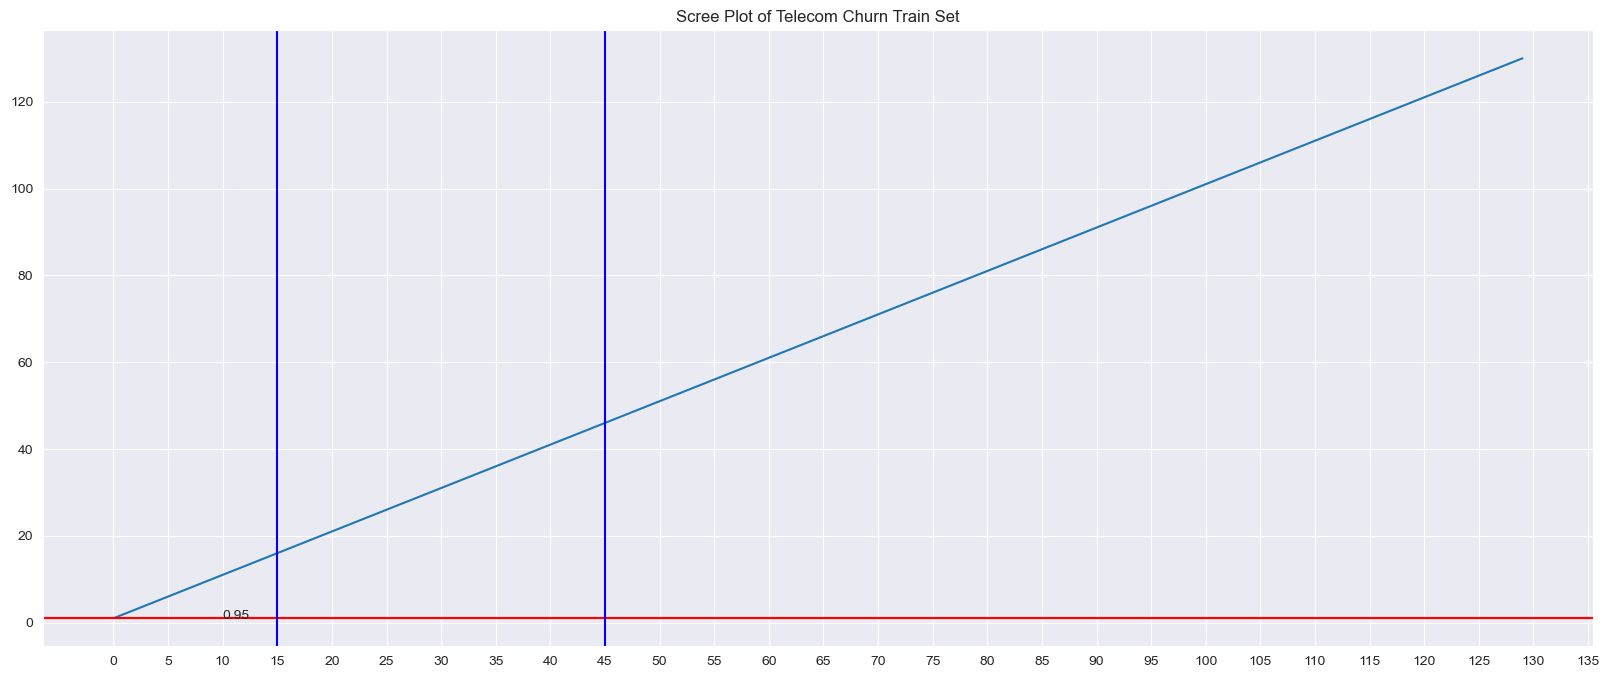

In [258]:
var_cum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(20,8))
sns.set_style('darkgrid')
sns.lineplot(np.arange(1,len(var_cum) + 1))
plt.xticks(np.arange(0,140,5))
plt.axhline(0.95,color='r')
plt.axhline(1.0,color='r')
plt.axvline(15,color='b')
plt.axvline(45,color='b')
plt.text(10,0.96,'0.95')

plt.title('Scree Plot of Telecom Churn Train Set');

### It can be seen that 95% of variance in the train set can be explained by first 15 components and 100% variance can be explained by first 45 components

In [259]:
# Performing PCA using first 45 components
pca_final = PCA(n_components=45, random_state=42)
transformed_data = pca_final.fit_transform(X_train)
X_train_pca = pd.DataFrame(transformed_data, columns=["PC_"+str(x) for x in range(1,46)], index = X_train.index)
data_train_pca = pd.concat([X_train_pca, y_train], axis=1)

data_train_pca.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,Churn
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000166926,-907.572128,-342.923663,13.094462,58.813530,-95.616187,-1050.535175,254.648959,-31.445082,305.140035,-216.814522,95.824752,231.408611,-111.002614,-2.007300,444.977306,31.541622,573.831382,-278.540353,30.768596,-36.915193,-0.293920,-83.574479,-13.960165,-60.930776,-53.208639,56.049624,-17.776992,-12.624422,14.149196,-30.558377,26.066032,-1.081149,-19.815025,-3.295323,-2.722995,7.468967,22.699103,28.714755,-14.296724,4.964793,-8.695055,2.462127,17.154542,-21.827527,-8.179081,0
7001343085,573.898042,-902.385764,-424.839211,-331.153504,-148.987012,-36.955735,-134.445157,265.325392,-92.071072,-164.203537,25.105258,-36.980564,164.785961,-222.908955,-12.573889,-50.569393,-44.767938,-62.984818,-18.100722,-86.239473,-115.399133,-45.776512,16.345458,-21.497136,-10.541278,-71.754124,29.230864,-20.880232,-0.690205,3.220377,-21.223809,65.500943,-39.719753,50.426386,10.586984,43.052832,0.199112,-66.120515,13.571635,25.808471,52.076292,-3.269015,8.412861,19.394641,-38.756312,0
7001863283,-1538.198471,514.032534,846.865454,57.032275,-1126.228639,-84.209378,-44.422436,-88.158902,-58.410837,50.519298,3.053277,-229.101452,-109.215876,-3.253798,7.045434,-85.645562,54.536547,-52.292247,20.978974,-90.806488,96.348829,24.280206,-52.426373,42.430306,-40.627363,-12.715820,-4.331924,-4.092586,50.339505,-0.778549,-35.147966,-121.579575,98.868761,-34.065336,-8.934845,22.922658,1.651670,52.626989,-8.561148,9.074390,-18.353439,3.686314,25.989333,27.241010,19.702026,0
7002275981,486.830735,-224.929813,1130.460500,-496.189077,6.009184,81.106735,-148.667429,170.280852,-7.374805,-99.556647,-159.658867,-14.187086,-98.682448,213.233751,-34.920516,-17.212527,29.644922,4.942726,2.799771,-49.580803,-88.567893,16.809370,-9.471871,4.383731,29.532314,38.211684,32.465251,-5.316754,-60.149511,12.593162,20.988076,80.709965,-50.975075,-3.711589,65.003326,-57.836771,-8.319153,-5.934744,-5.056997,-5.676140,-12.088540,-14.687785,-32.245173,12.503005,-20.167386,0
7001086221,-1420.949388,794.071749,99.221324,155.118474,145.349490,784.723325,-10.947304,609.724278,-172.481885,-42.796011,59.174520,-162.913358,-112.219450,-55.108437,17.303321,-152.111167,-611.929507,181.578204,-211.358016,-77.180544,116.282046,83.488638,-26.255002,128.489946,-69.085152,4.854521,-128.278609,44.328780,-6.470635,-28.781729,14.619248,-31.359950,27.331779,-25.951189,8.938604,-34.839543,-21.921527,17.956523,-0.849552,-19.400553,-5.373696,6.300646,-11.312977,41.975928,-8.378824,0


In [260]:
# Plotting Principle components

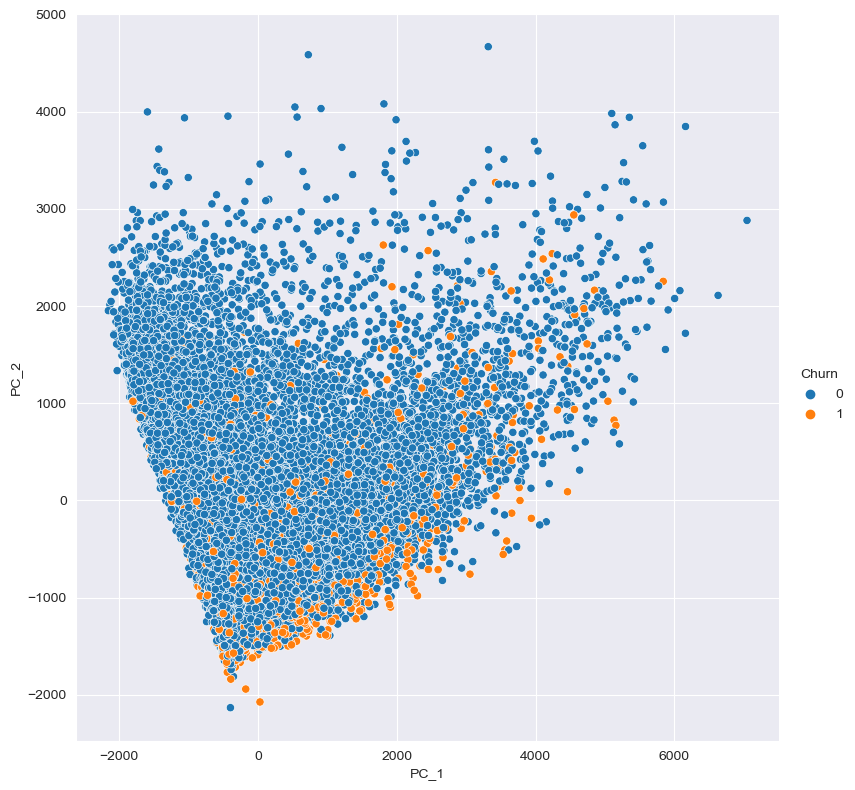

In [261]:
sns.pairplot(data=data_train_pca, x_vars=["PC_1"], y_vars=["PC_2"], hue = "Churn", size=8);

# PCA + Logistic Regression Model

In [262]:
# X,y Split
y_train_pca = data_train_pca.pop('Churn')
X_train_pca = data_train_pca

In [263]:
X_test_pca = pca_final.transform(X_test)

In [264]:
lr_pca = LogisticRegression(random_state = 100, class_weight='balanced')
lr_pca.fit(X_train_pca,y_train_pca)

LogisticRegression(class_weight='balanced', random_state=100)

In [265]:
# y_train Predictions
y_train_pred_lr_pca = lr_pca.predict(X_train_pca)
y_train_pred_lr_pca[:5]

array([1, 1, 0, 0, 0], dtype=int64)

In [266]:
X_test_pca = pca_final.transform(X_test)
y_test_pred_lr_pca = lr_pca.predict(X_test_pca)
y_test_pred_lr_pca[:5]

array([1, 1, 0, 1, 1], dtype=int64)

In [267]:
train_matrix = confusion_matrix(y_train, y_train_pred_lr_pca)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_pca)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy: 0.67
Sensitivity: 0.89
Specificity: 0.65
Precision: 0.19
F1-score: 0.31

Test Performance :

Accuracy: 0.27
Sensitivity: 0.96
Specificity: 0.21
Precision: 0.1
F1-score: 0.18


### Hyper Parameter Tuning

In [268]:
from sklearn.pipeline import Pipeline
lr_pca = LogisticRegression(random_state=100, class_weight='balanced')

In [269]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold
params = {
    'penalty' : ['l1','l2','none'],
    'C' : [0,1,2,3,4,5,10,50]
}
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=100)

search = GridSearchCV(cv=folds, estimator = lr_pca, param_grid=params,scoring='roc_auc', verbose=True, n_jobs=-1)
search.fit(X_train_pca, y_train_pca)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=100, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=100),
             n_jobs=-1,
             param_grid={'C': [0, 1, 2, 3, 4, 5, 10, 50],
                         'penalty': ['l1', 'l2', 'none']},
             scoring='roc_auc', verbose=True)

In [270]:
# Optimum Hyperparameters
print('Best ROC-AUC score:', search.best_score_)
print('Best Parameters:', search.best_params_)

Best ROC-AUC score: 0.8759089145511852
Best Parameters: {'C': 4, 'penalty': 'l2'}


In [271]:
# Modelling using teh best LR-PCA estimator
lr_pca_best = search.best_estimator_
lr_pca_best_fit = lr_pca_best.fit(X_train_pca, y_train_pca)

# Prediction on Train set
y_train_pred_lr_pca_best = lr_pca_best_fit.predict(X_train_pca)
y_train_pred_lr_pca_best[:5]


array([1, 1, 0, 0, 0], dtype=int64)

In [272]:
# Prediction on Test set
y_test_pred_lr_pca_best = lr_pca_best_fit.predict(X_test_pca)
y_test_pred_lr_pca_best[:5]

array([1, 1, 0, 1, 1], dtype=int64)

In [273]:
# Model Performance after hyperparameter tunning

train_matrix = confusion_matrix(y_train, y_train_pred_lr_pca_best)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_pca_best)

In [274]:
print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy: 0.64
Sensitivity: 0.91
Specificity: 0.62
Precision: 0.18
F1-score: 0.3

Test Performance :

Accuracy: 0.17
Sensitivity: 0.98
Specificity: 0.1
Precision: 0.09
F1-score: 0.16


# PCA + Random Forest

In [275]:
from sklearn.ensemble import RandomForestClassifier

pca_rf = RandomForestClassifier(random_state = 42, class_weight = {0: class_1/(class_0 + class_1) , 1: class_0/(class_0 + class_1)}, oob_score=True, n_jobs=-1, verbose=1)

In [276]:
# Hyper parameter Tuning
params = {
    'n_estimators' :[30,40,50,100],
    'max_depth' : [3,4,5,6,7],
    'min_samples_leaf': [15,20,25,30]
}
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
pca_rf_model_search = GridSearchCV(estimator=pca_rf, param_grid=params, cv=folds, scoring='roc_auc', verbose=True, n_jobs=-1)

pca_rf_model_search.fit(X_train_pca, y_train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.08640165272733331,
                                                            1: 0.9135983472726666},
                                              n_jobs=-1, oob_score=True,
                                              random_state=42, verbose=1),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [15, 20, 25, 30],
                         'n_estimators': [30, 40, 50, 100]},
             scoring='roc_auc', verbose=True)

In [277]:
# Optimum Hyperparameters
print('Best ROC-AUC score:', pca_rf_model_search.best_score_)
print('Best Parameters :', pca_rf_model_search.best_params_)

Best ROC-AUC score: 0.8863026987174965
Best Parameters : {'max_depth': 7, 'min_samples_leaf': 20, 'n_estimators': 100}


In [278]:

# Modelling using the best PCA-RandomForest Estimator
pca_rf_best = pca_rf_model_search.best_estimator_
pca_rf_best_fit = pca_rf_best.fit(X_train_pca, y_train)

# Prediction on Train set
y_train_pred_pca_rf_best = pca_rf_best_fit.predict(X_train_pca)
y_train_pred_pca_rf_best[:5]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


array([0, 0, 0, 0, 0], dtype=int64)

In [279]:
# Prediction on test set
y_test_pred_pca_rf_best = pca_rf_best_fit.predict(X_test_pca)
y_test_pred_pca_rf_best[:5]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


array([0, 0, 0, 0, 0], dtype=int64)

In [280]:
# PCA - RandomForest Model Performacne - Hyper Parameter Tuned

train_matrix = confusion_matrix(y_train, y_train_pred_pca_rf_best)
test_matrix = confusion_matrix(y_test, y_test_pred_pca_rf_best)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy: 0.88
Sensitivity: 0.82
Specificity: 0.89
Precision: 0.41
F1-score: 0.55

Test Performance :

Accuracy: 0.91
Sensitivity: 0.0
Specificity: 1.0
Precision: 0.43
F1-score: 0.0


In [281]:
# Out of Bag error
pca_rf_best_fit.oob_score_

0.8668063026610178

# PCA + XGBoost

In [282]:
!pip install xgboost
!pip install plotly
import xgboost as xgb
pca_xgb = xgb.XGBClassifier(random_state=42, scale_pos_weight=class_0/class_1, tree_method='hist', objective='binary:logistic',   
                           
                           )
pca_xgb.fit(X_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [283]:
print('Baseline Train AUC Score')
roc_auc_score(y_train, pca_xgb.predict_proba(X_train_pca)[:, 1])

Baseline Train AUC Score


0.999995160413673

In [284]:
print('Baseline Test AUC Score')
roc_auc_score(y_test, pca_xgb.predict_proba(X_test_pca)[:, 1])

Baseline Test AUC Score


0.6866289575443105

In [285]:
# Hyper parameter Tuning
parameters = {
    'learning_rate': [0.1, 0.2, 0.3],
    'gamma' : [10,20,50],
    'max_depth': [2,3,4],
    'min_child_weight': [25,50],
    'n_estimators': [150,200,500]}
pca_xgb_search = GridSearchCV(estimator=pca_xgb, param_grid=parameters,scoring='roc_auc', cv=folds, n_jobs=-1, verbose=1)
pca_xgb_search.fit(X_train_pca, y_train)

Fitting 4 folds for each of 162 candidates, totalling 648 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_typ...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'gamma': [10, 20, 50],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4], 'min_child_weight': [25, 50],
                         'n_estimators': [150, 200, 500]},
             scoring='roc_auc', verbose=1)

In [286]:
# Optimum Hyperparameters
print('Best ROC-AUC score:', pca_xgb_search.best_score_)
print('Best Parameters:', pca_xgb_search.best_params_)

Best ROC-AUC score: 0.8949498992323923
Best Parameters: {'gamma': 10, 'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 50, 'n_estimators': 500}


In [287]:
# Modelling using the best PCA-XGBoost Estimator
pca_xgb_best = pca_xgb_search.best_estimator_
pca_xgb_best_fit = pca_xgb_best.fit(X_train_pca, y_train)

# Prediction on Train set
y_train_pred_pca_xgb_best = pca_xgb_best_fit.predict(X_train_pca)
y_train_pred_pca_xgb_best[:5]

array([0, 0, 0, 0, 0])

In [288]:
X_train_pca.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000166926,-907.572128,-342.923663,13.094462,58.813530,-95.616187,-1050.535175,254.648959,-31.445082,305.140035,-216.814522,95.824752,231.408611,-111.002614,-2.007300,444.977306,31.541622,573.831382,-278.540353,30.768596,-36.915193,-0.293920,-83.574479,-13.960165,-60.930776,-53.208639,56.049624,-17.776992,-12.624422,14.149196,-30.558377,26.066032,-1.081149,-19.815025,-3.295323,-2.722995,7.468967,22.699103,28.714755,-14.296724,4.964793,-8.695055,2.462127,17.154542,-21.827527,-8.179081
7001343085,573.898042,-902.385764,-424.839211,-331.153504,-148.987012,-36.955735,-134.445157,265.325392,-92.071072,-164.203537,25.105258,-36.980564,164.785961,-222.908955,-12.573889,-50.569393,-44.767938,-62.984818,-18.100722,-86.239473,-115.399133,-45.776512,16.345458,-21.497136,-10.541278,-71.754124,29.230864,-20.880232,-0.690205,3.220377,-21.223809,65.500943,-39.719753,50.426386,10.586984,43.052832,0.199112,-66.120515,13.571635,25.808471,52.076292,-3.269015,8.412861,19.394641,-38.756312
7001863283,-1538.198471,514.032534,846.865454,57.032275,-1126.228639,-84.209378,-44.422436,-88.158902,-58.410837,50.519298,3.053277,-229.101452,-109.215876,-3.253798,7.045434,-85.645562,54.536547,-52.292247,20.978974,-90.806488,96.348829,24.280206,-52.426373,42.430306,-40.627363,-12.715820,-4.331924,-4.092586,50.339505,-0.778549,-35.147966,-121.579575,98.868761,-34.065336,-8.934845,22.922658,1.651670,52.626989,-8.561148,9.074390,-18.353439,3.686314,25.989333,27.241010,19.702026
7002275981,486.830735,-224.929813,1130.460500,-496.189077,6.009184,81.106735,-148.667429,170.280852,-7.374805,-99.556647,-159.658867,-14.187086,-98.682448,213.233751,-34.920516,-17.212527,29.644922,4.942726,2.799771,-49.580803,-88.567893,16.809370,-9.471871,4.383731,29.532314,38.211684,32.465251,-5.316754,-60.149511,12.593162,20.988076,80.709965,-50.975075,-3.711589,65.003326,-57.836771,-8.319153,-5.934744,-5.056997,-5.676140,-12.088540,-14.687785,-32.245173,12.503005,-20.167386
7001086221,-1420.949388,794.071749,99.221324,155.118474,145.349490,784.723325,-10.947304,609.724278,-172.481885,-42.796011,59.174520,-162.913358,-112.219450,-55.108437,17.303321,-152.111167,-611.929507,181.578204,-211.358016,-77.180544,116.282046,83.488638,-26.255002,128.489946,-69.085152,4.854521,-128.278609,44.328780,-6.470635,-28.781729,14.619248,-31.359950,27.331779,-25.951189,8.938604,-34.839543,-21.921527,17.956523,-0.849552,-19.400553,-5.373696,6.300646,-11.312977,41.975928,-8.378824


In [289]:
# Prediction on test set
X_test_pca = pca_final.transform(X_test)
X_test_pca = pd.DataFrame(X_test_pca, index=X_test.index, columns = X_train_pca.columns)
y_test_pred_pca_xgb_best = pca_xgb_best_fit.predict(X_test_pca)
y_test_pred_pca_xgb_best[:5]

array([1, 1, 0, 1, 0])

In [290]:
## PCA - XGBOOST[Hyper parameter tuned]Model Performance

train_matrix = confusion_matrix(y_train, y_train_pred_pca_xgb_best)
test_matrix = confusion_matrix(y_test, y_test_pred_pca_xgb_best)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy: 0.87
Sensitivity: 0.88
Specificity: 0.87
Precision: 0.38
F1-score: 0.53

Test Performance :

Accuracy: 0.76
Sensitivity: 0.55
Specificity: 0.78
Precision: 0.19
F1-score: 0.28


In [291]:
## PCA - XGBOOST [Hyper parameter tuned]Model Performance
print('Train AUC Score')
print(roc_auc_score(y_train, pca_xgb_best.predict_proba(X_train_pca)[:, 1]))
print('Test AUC Score')
print(roc_auc_score(y_test, pca_xgb_best.predict_proba(X_test_pca)[:, 1]))

Train AUC Score
0.9385145161816868
Test AUC Score
0.7244500368797921


# Recommendations

In [292]:
print('Most important Predictors of churn, in the order of importance are : ')
lr_results.sort_values(by=coef_column, key=lambda x : abs(x), ascending=False)['coef']

Most important Predictors of churn, in the order of importance are : 


monthly_2g_8           -1.3576
const                  -1.3062
sachet_2g_8_0           0.5477
monthly_2g_7           -0.2909
total_rech_num_8       -0.0649
std_ic_t2f_mou_8       -0.0327
isd_og_mou_8            0.0264
loc_ic_t2f_mou_8       -0.0175
std_ic_t2f_mou_7        0.0144
spl_og_mou_8           -0.0099
std_ic_t2t_mou_8       -0.0072
std_ic_t2m_mou_8       -0.0068
last_day_rch_amt_8     -0.0063
loc_og_t2m_mou_8       -0.0055
loc_ic_t2t_mou_8       -0.0052
std_ic_t2t_mou_7        0.0039
roam_og_mou_8           0.0029
isd_ic_mou_6            0.0020
roam_ic_mou_7           0.0019
std_ic_t2m_mou_6        0.0018
last_day_rch_amt_7     -0.0012
roam_og_mou_6           0.0011
delta_total_rech_amt   -0.0008
last_day_rch_amt_6     -0.0007
delta_total_og_mou     -0.0006
std_og_t2t_mou_6       -0.0002
Name: coef, dtype: float64

From the above , following are the strongest indicators of 'Churn'

* Customers who churn are more likely to be users of 'monthly 2g package-0 in action period when all other factors are held constant. This is the strongest indicator of shurn.

* Customers who churn show lower number of recharges done in action period , When all other factors are held constant. This is the stronges indicator of churn

* Customers who churn show lower average monthly std incomingcalls compared to others.

* Customers who churn show lower average monthly isd outgoing compared to others.

Based on the above indicators the recommendations to the telecom company are:

    * Concentrate on users who users of less than 1.3 standard deviation of 'monthly 2g 'package. They are most likely to churn
    
    * Concentrate on users who recharge less  number of times.
    
    * Models with high sensitivity are best for predicting churn . Use the PCA + Logistic Regression model to predict churn. It has an ROC score of 0.87, sensitivity of 97% 